In [1]:
# 설치 버전 확인
import os
import pandas as pd
import geopandas as gpd
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
from unicodedata import normalize
import os

print(os.getcwd())

# 맥북에서 문자열 음절단위 분리 방지
def change_nfc_all_dir(dirname):
    filenames = os.listdir(dirname)
    for filename in filenames:
        before_filename = os.path.join(dirname, filename)
        after_filename = normalize('NFC', before_filename)
        os.rename(before_filename, after_filename)
        
        if os.path.isdir(before_filename):    
            change_nfc_all_dir(before_filename)
            
change_nfc_all_dir(r'/Users/jeonjunhwi/문서/Projects') # <- 현재 Desktop 하위 폴더에 대해 모두 적용

import matplotlib.pyplot as plt
def matplotlib_plot_font():

    # plot에서 한글 폰트 깨지는 현상 해결!
    from matplotlib import font_manager, rc
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family = font)
    
matplotlib_plot_font()

/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/행정구역별_위경도


In [3]:
folders = glob('**/**.shp', recursive=True)
metro = glob('*경기/**.shp') + glob('*서울/**.shp') + glob('*인천/**shp')
nonmetro_1 = glob('*경남/**.shp') + glob('*부산/**.shp') + glob('*경북/**.shp') + glob('*울산/**.shp') + glob('*대구/**.shp')
nonmetro_2 = glob('*전남/**.shp') + glob('*전북/**.shp') + glob('*광주/**.shp')
nonmetro_3 = glob('*세종/**.shp') + glob('*대전/**.shp') + glob('*충남/**.shp') + glob('*충북/**.shp')
nonmetro_4 = glob('*강원/**.shp')
nonmetro_5 = glob('*제주/**.shp')

tmp_df = pd.DataFrame(columns=['centroid', 'SGG_NM'])
diff_df = gpd.GeoDataFrame({})

# for i, files in enumerate(folders):
for i, files in enumerate(metro + nonmetro_1 + nonmetro_2 + nonmetro_3 + nonmetro_4 + nonmetro_5):
# for i, files in enumerate(nonmetro_3):

    # 지리 데이터 로드
    gg = gpd.read_file(files, encoding='cp949')
    gg = gg[['SGG_NM', 'geometry']]
    # 경기 구리시, 서울 중구 등으로 바꿈
    gg['SGG_NM'] = [files[18:20] + ' ' + y for y in gg['SGG_NM']]
    
    
    # if files[18:20] == '경남':
    #     print(gg[23])
    #     gg.drop(23, inplace=True)
    
    # 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
    lon_lat_gg = gg.to_crs(4326)
    
    if i == 0:
        lon_lat_gg_1 = lon_lat_gg
        lon_lat_gg_1['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg_1['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg_1['centroid'] = lon_lat_gg.centroid
        
    else:
        lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg['centroid'] = lon_lat_gg.centroid

        lon_lat_gg_1 = lon_lat_gg_1.merge(lon_lat_gg, how='outer')

# 인덱스 숫자 -> 지역으로 변경
# lon_lat_gg_1 = lon_lat_gg_1.set_index('SGG_NM')

In [4]:
for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인']:
    for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
        if i == 0:
            tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            
            if '수지' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
            elif '일산' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
            else:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
                
        else:
            tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            tmp = tmp.union(tmp2)
            
            # 합친후 해당 행 제거
            lon_lat_gg_1.drop(idx, inplace=True)
    # union 한 centroid를 할당
    lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

# 서울 서울시성북구 -> 서울 성북구 로 전처리
lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')

In [ ]:
# 경기도에 위 지역에 대해서 전처리 필요. 시 단위로 구분하기 위함
# 성남시 분당구 -> 경기 성남시, 수원시 영통구 -> 경기 수원시


for _ in [수도권, 경상도, 전라도, 충청도]:
    
    ######################
    ### 서울 인천 경기 ###
    ######################
    for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '수지' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
                elif '일산' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
                else:   
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

    # 서울 서울시성북구 -> 서울 성북구 로 전처리
    lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')
    
    #######################
    ####### 경상도 ########
    #######################
    for region in ['창원시', '포항시']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '창원시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 창원시' 
                elif '포항시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 포항시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid
        
        

    #######################
    ####### 충청도 ########
    #######################
    for region in ['천안시', '세종']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '천안시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충북 천안시' 
                elif '세종' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '세종 세종시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid
        
        
    #######################
    ####### 전라도 ########
    #######################
    for region in ['전주시']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '전주시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '전북 전주시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

In [4]:

# 행정구역 명 통일

######################
# for region in ['상당|청원|서원|흥덕']:
for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인', '창원시', '포항시', '천안시', '세종', '전주시', '상당|청원|흥덕', '서원']:
    for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
        # print(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)])
        if i == 0:
            tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            ######################
            ### 서울 인천 경기 ###
            ######################
            if '수지' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
            elif '일산' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
            elif '성남' in region:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안산' in region:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '수원' in region:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안양' in region:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            
            #######################
            ####### 경상도 ########
            #######################
            elif '창원시' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 창원시' 
            elif '포항시' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경북 포항시'
                
            #######################
            ####### 충청도 ########
            #######################
            elif '천안시' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충남 천안시' 
            elif '세종' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '세종 세종시'
            elif '상당' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충북 청주시'
            elif '서원' in region:
                lon_lat_gg_1.drop(idx, inplace=True) # 청주시 서원구 geometry error로 제거. 청주의 다른 3개의 구의 평균으로 해도 상관없음.
                
            #######################
            ####### 전라도 ########
            #######################  
            elif '전주시' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '전북 전주시'
                
                     
                
        else:
            tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            tmp = tmp.union(tmp2)
            # 합친후 해당 행 제거
            lon_lat_gg_1.drop(idx, inplace=True)
    # union 한 centroid를 할당
    lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

# 서울 서울시성북구 -> 서울 성북구 로 전처리
lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')

KeyboardInterrupt: 

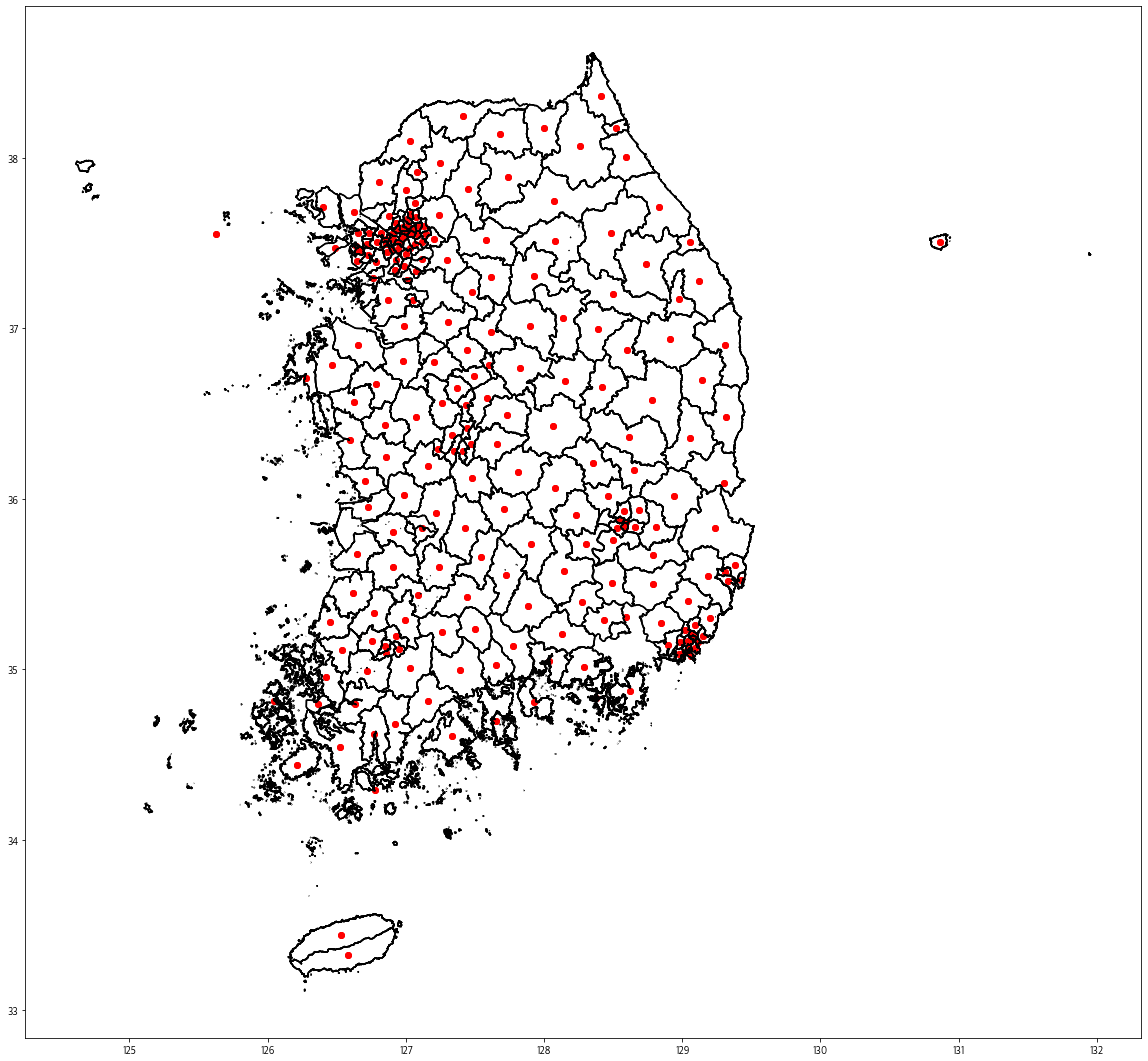

In [14]:
# 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['geometry'].plot(ax=ax)
lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
for i in lon_lat_gg_1.index:
    lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
    lon_lat_gg_1['boundary'].plot(ax=ax,color='black')

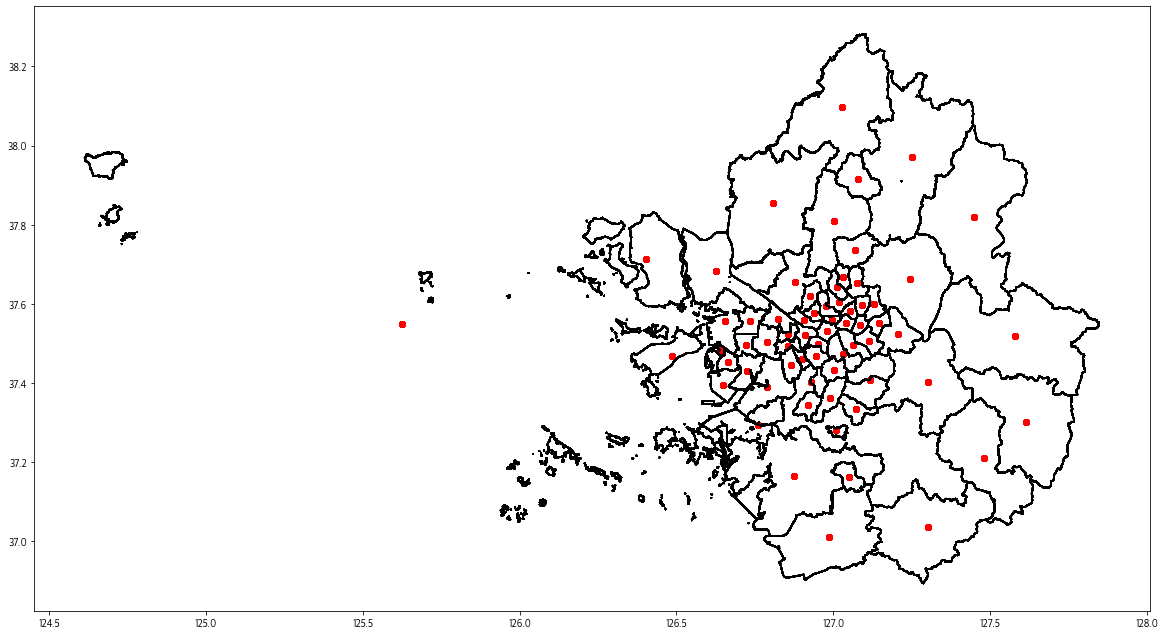

In [5]:
# 수도권 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['geometry'].plot(ax=ax)
lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
for i in lon_lat_gg_1.index:
    lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
    lon_lat_gg_1['boundary'].plot(ax=ax,color='black')

수도권 총  229 개 지역


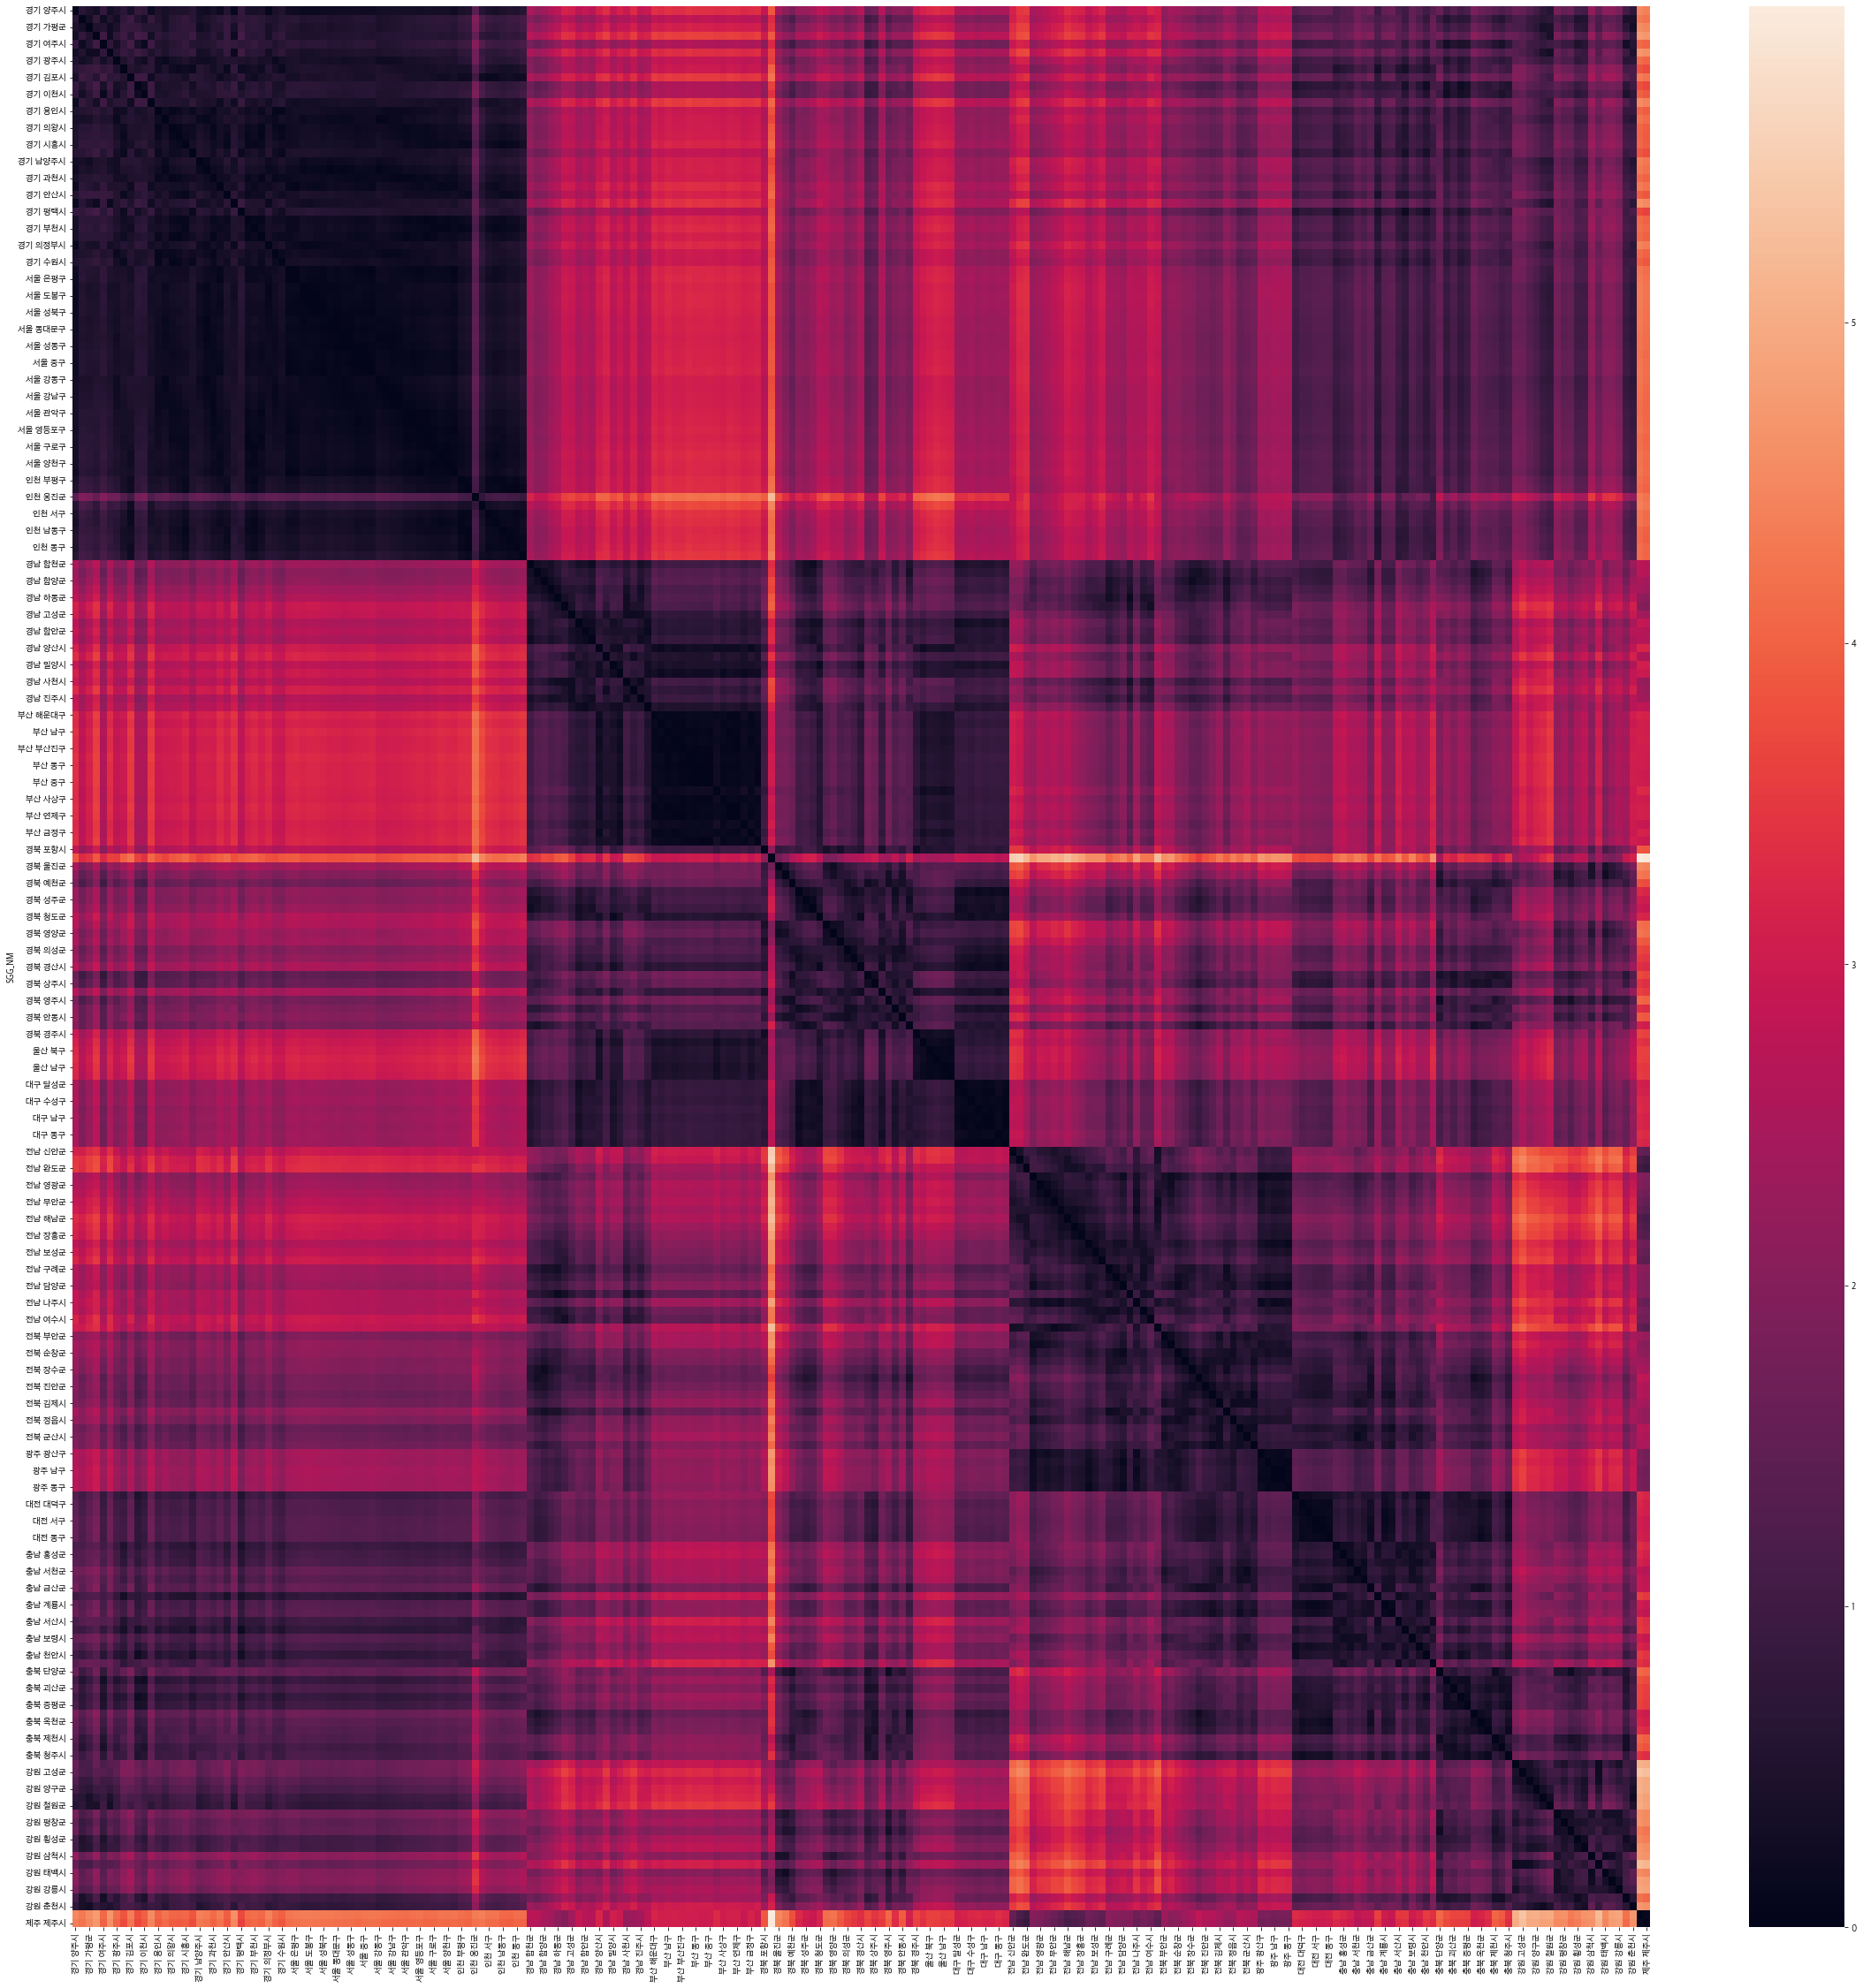

In [5]:
diff_df = pd.DataFrame({})
lon_lat_gg_1 = lon_lat_gg_1.set_index('SGG_NM')
for region in lon_lat_gg_1.index:
    # print(region)
    diff_df[region] = lon_lat_gg_1['centroid'].distance(lon_lat_gg_1['centroid'].loc[region]) # 유클리드 거리 계산

fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(diff_df)
print('수도권 총 ', len(diff_df), '개 지역')

In [6]:
diff_df.to_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/distances_kr_city_adj_mx.csv', encoding='cp949')

In [63]:
pd.read_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/distances_kr_metro_city_adj_mx.csv', encoding='cp949', index_col=0).values.tolist()

[[0.0,
  0.646981627884874,
  0.44916349303487,
  0.2890446013894426,
  0.7961675536536635,
  0.2968366789634186,
  0.5044836535313814,
  0.6553418213294266,
  0.3956149439362415,
  0.8303830847130274,
  0.7673500005691554,
  0.1973157442894072,
  0.480425675266762,
  0.3516205362746804,
  0.4463774598470548,
  0.4720825274975033,
  0.4706539050901147,
  0.6473556199515403,
  0.2831232043145979,
  0.2467843092061455,
  0.374875842349669,
  0.1957714230379705,
  0.2409482474750603,
  0.5683752014674888,
  0.1323649133659187,
  0.7969138145307646,
  0.3883066819857894,
  0.3712520621732895,
  0.4125296252542137,
  0.0989136585089878,
  0.417515981529497,
  0.5283784636316833,
  0.2391266101321262,
  0.2034745626863108,
  0.1727865959523883,
  0.1430364935146397,
  0.1655225941962084,
  0.2036614700699175,
  0.2299914713985702,
  0.2330167241019263,
  0.2752919667191769,
  0.260737225902406,
  0.2781367590058699,
  0.2486134258887536,
  0.2151107489296493,
  0.296590208350953,
  0.3238569

In [131]:

reg = ['서울',	'부산',	'대구',	'인천',	'광주',	'대전',	'울산',	'세종',	'경기',	'강원',	'충북',	'충남',	'전북',	'전남',	'경북',	'경남',	'제주']
reg = ['충남', '충북']
# cnt = 0
for region in reg:
    cnt = 0
    for j in list(diff_df.columns):
        if j[:2] == region:
            cnt += 1
            print(j)
    print(region, cnt)
print(' ')
# cnt = 0
for region in reg:
    cnt = 0
    for j in list(a):
        if j[:2] == region:
            print(j)
            cnt += 1
    print(region, cnt)
    

충남 예산군
충남 홍성군
충남 청양군
충남 서천군
충남 부여군
충남 금산군
충남 당진시
충남 계룡시
충남 논산시
충남 서산시
충남 아산시
충남 보령시
충남 공주시
충남 태안군
충남 14
충북 천안시
충북 단양군
충북 음성군
충북 괴산군
충북 진천군
충북 증평군
충북 영동군
충북 옥천군
충북 보은군
충북 제천시
충북 충주시
충북 청주시
충북 서원구
충북 13
 
충남 천안시
충남 아산시
충남 공주시
충남 서산시
충남 부여군
충남 홍성군
충남 당진시
충남 서천군
충남 논산시
충남 계룡시
충남 금산군
충남 태안군
충남 보령시
충남 청양군
충남 예산군
충남 15
충북 증평군
충북 청주시
충북 음성군
충북 충주시
충북 괴산군
충북 단양군
충북 진천군
충북 옥천군
충북 영동군
충북 제천시
충북 보은군
충북 11


In [96]:
# 빈 데이터프레임 정의
distances_kr_metro_city = pd.DataFrame(columns=['from', 'to', 'cost'])

#, 지역 인덱스, 컬럼 정의
index = diff_df.index
col = diff_df.columns

city_dict = {}
to_list = []
from_list = []
cost_list = []
for idx, region in enumerate(col):
    
    # 딕셔너리로 지역, 숫자 저장
    city_dict[region] = idx
    
    # to, from, cost 저장
    cost_list += diff_df.iloc[idx:,idx].tolist()
    to_list += index[idx:].to_list()
    from_list += [col[idx] for i in range(len(index[idx:]))]

print(len(cost_list), len(from_list), len(to_list))

# 데이터프레임 컬럼에 할당
distances_kr_metro_city['from'] = from_list
distances_kr_metro_city['to'] = to_list
distances_kr_metro_city['cost'] = cost_list

# 한글 지명을 숫자로 변경
for region in col:
    distances_kr_metro_city.replace(region, city_dict[region], inplace=True)

# csv로 저장
distances_kr_metro_city.to_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/distances_kr_metro_city.csv', encoding='cp949')


# distance를 위도경도 말고 다른 Crs로 바꿔서 해볼것

2211 2211 2211


In [19]:
reg = reg.sort()

In [31]:


city_list = ['인천 동구', '인천 남구', '인천 바보', '서울 강서구', '서울 종로구', '전남 목포', '전남 여수']

new_city_list = []
for i in reg:
    for j in city_list:
        if j[:2] == i:
            new_city_list.append(j)
    
    

In [32]:
new_city_list

['인천 동구', '인천 남구', '인천 바보', '서울 강서구', '서울 종로구', '전남 목포', '전남 여수']

In [256]:
import numpy as np
import pandas as pd
a = pd.DataFrame({'a' : [1,2,3],
                  'b' : [1, np.nan, np.nan]})

<AxesSubplot:>

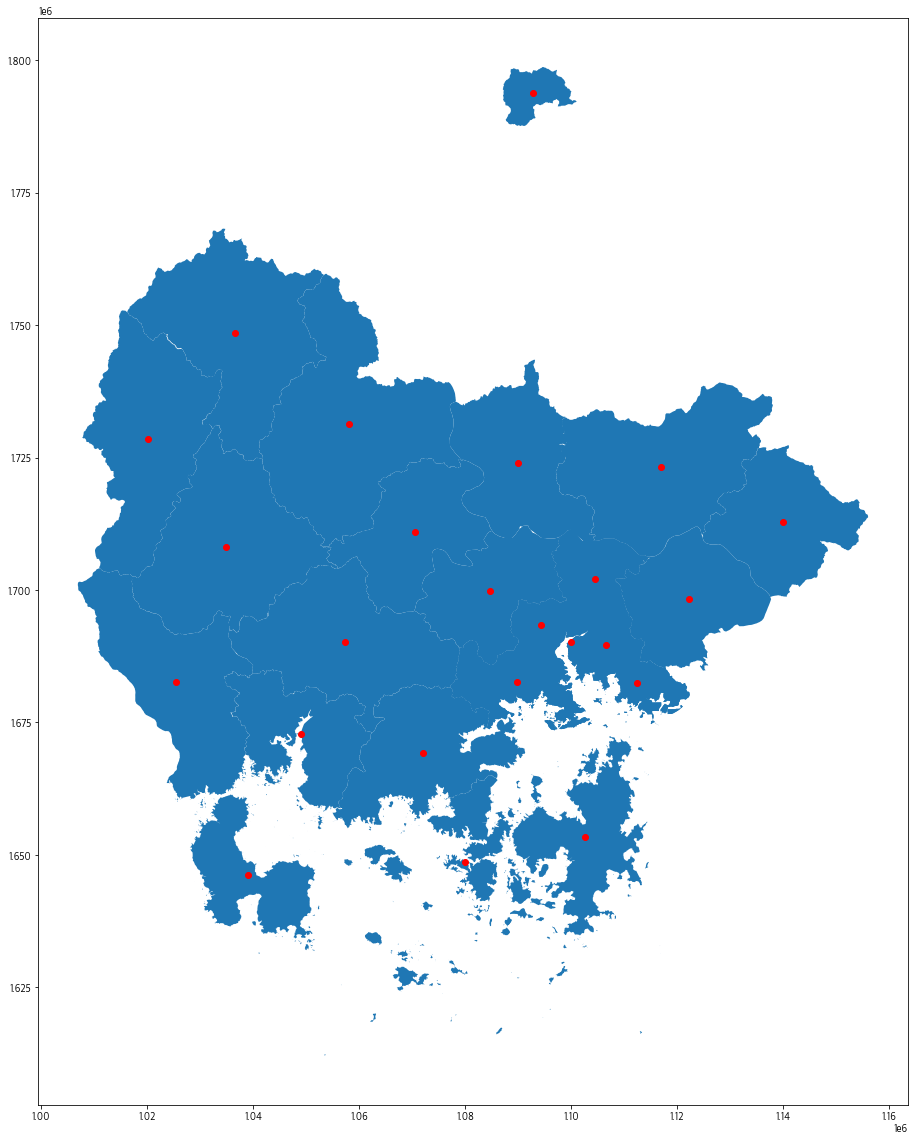

In [73]:
gg = gpd.read_file('LARD_ADM_SECT_SGG_경남/LARD_ADM_SECT_SGG_48.shp', encoding='cp949')
gg['centroid'] = gg.centroid

fig, ax = plt.subplots(figsize=(20,20))
gg['geometry'].plot(ax = ax)
gg['centroid'].plot(ax = ax, color = 'red')

In [32]:
# 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
lon_lat_gg = gg.to_crs(4326)
lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
lon_lat_gg['centroid2'] = lon_lat_gg.centroid

/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['longitude'] = nc_counties.centroid.x
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['latitude'] = nc_counties.centroid.y
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['centroid2'] = nc_counties.centroid


## Each City DataFrame Processing and Plot

In [7]:
city_df = pd.read_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')

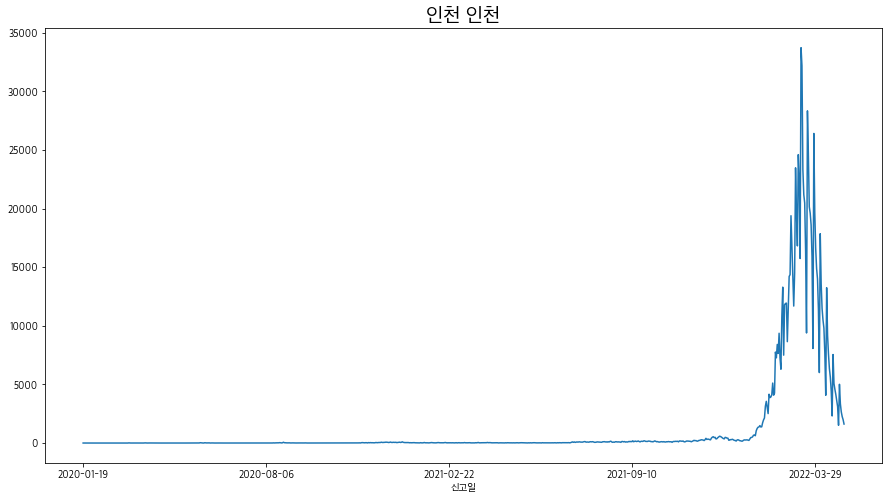

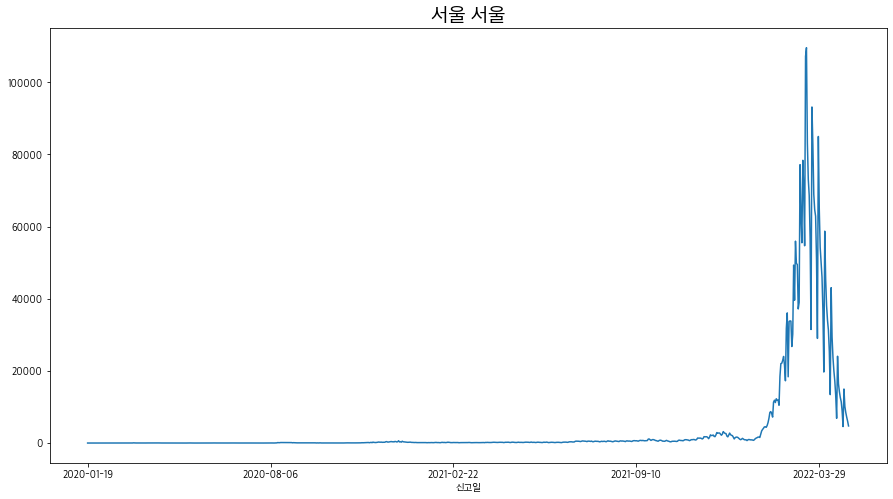

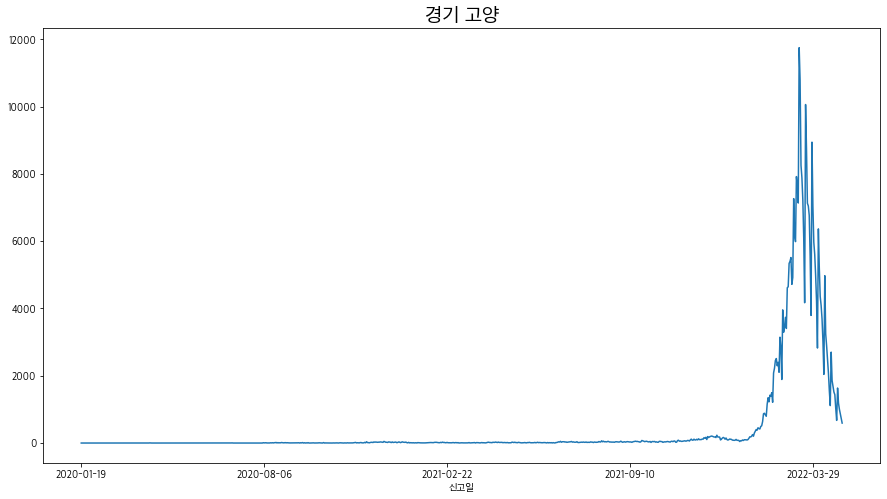

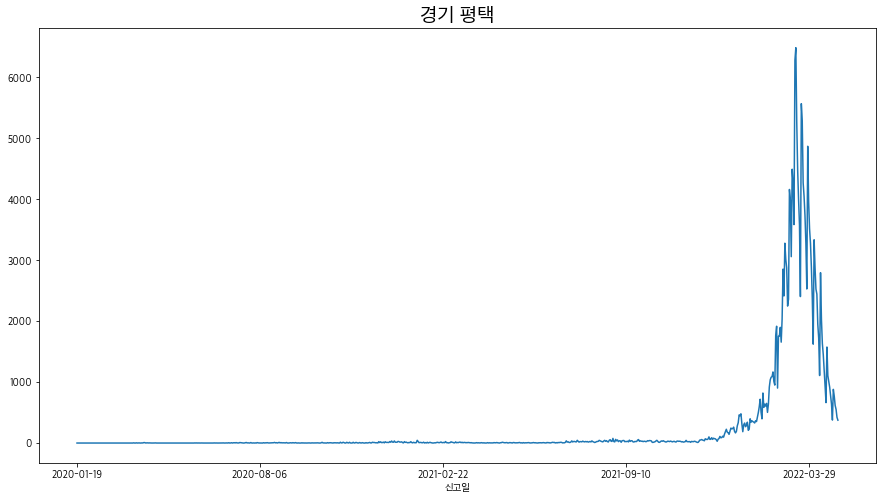

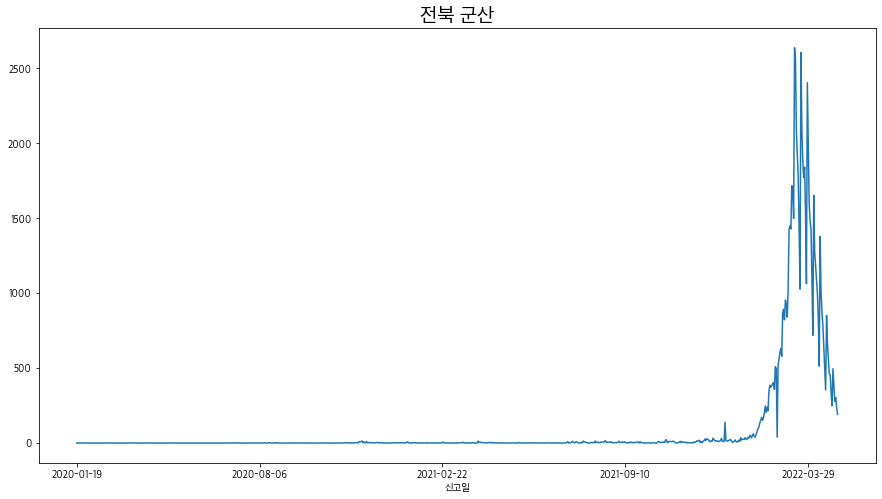

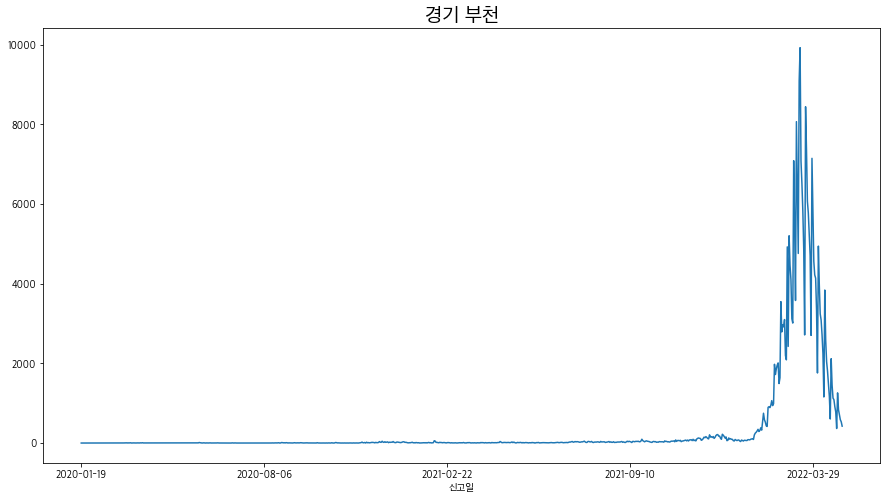

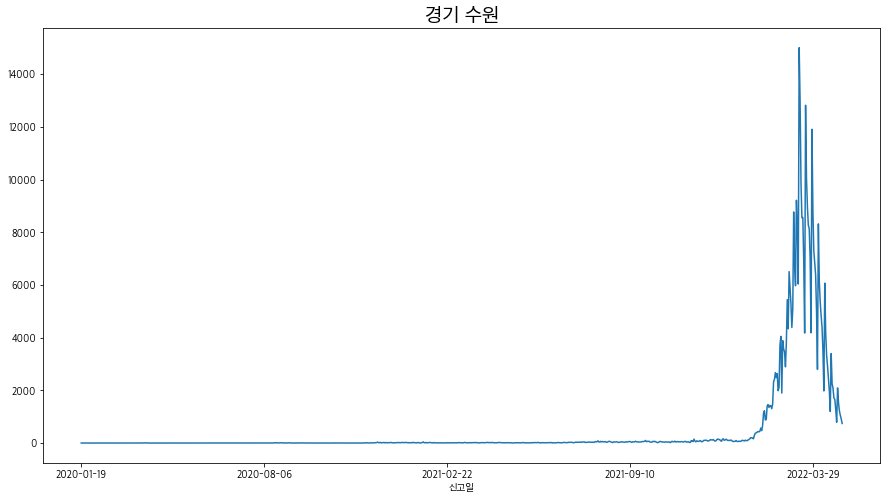

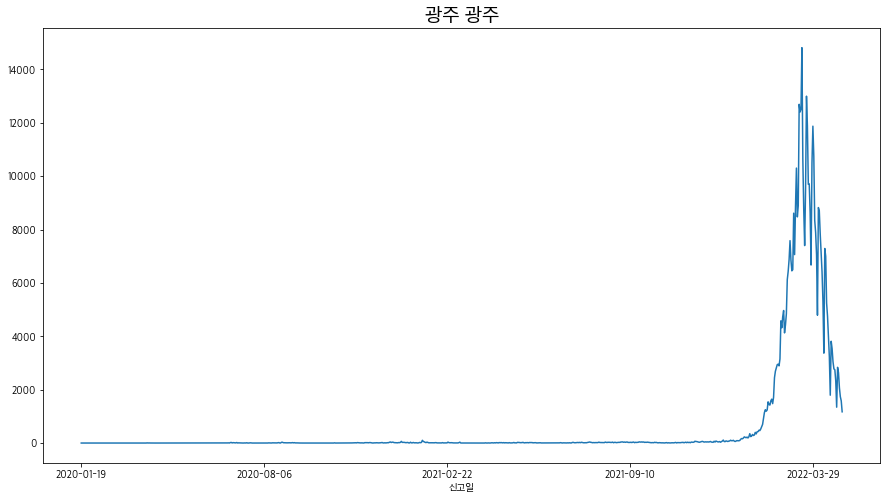

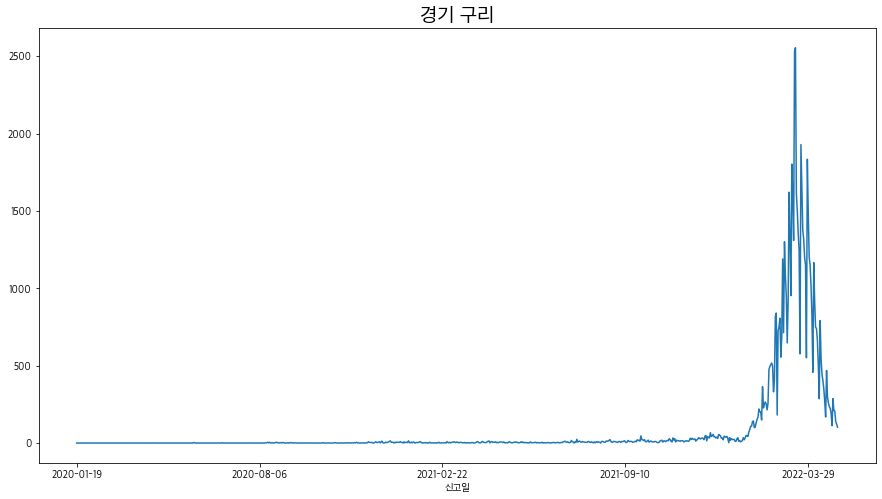

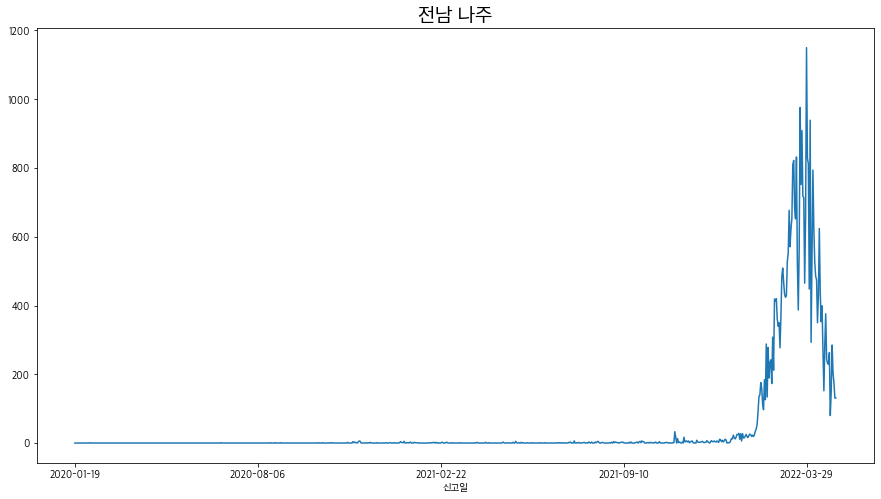

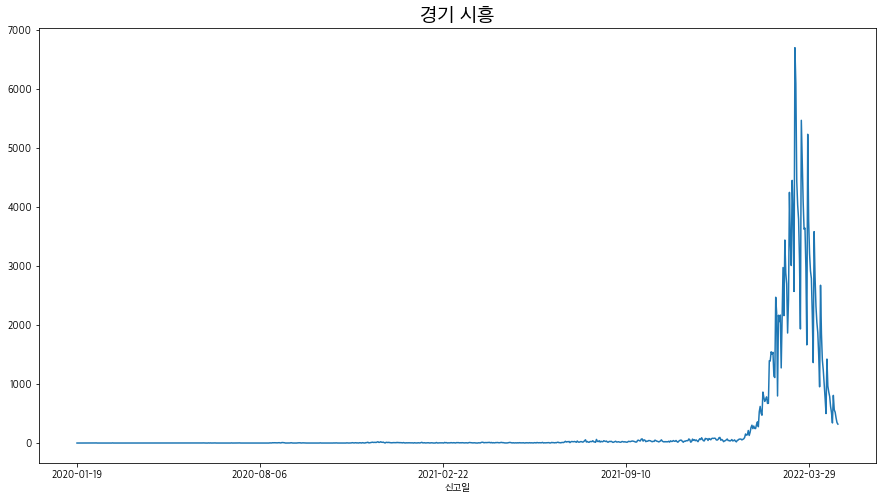

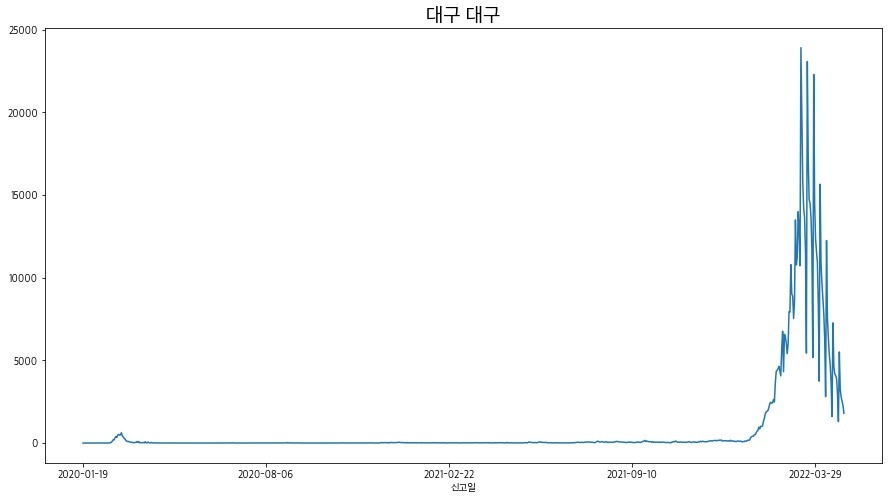

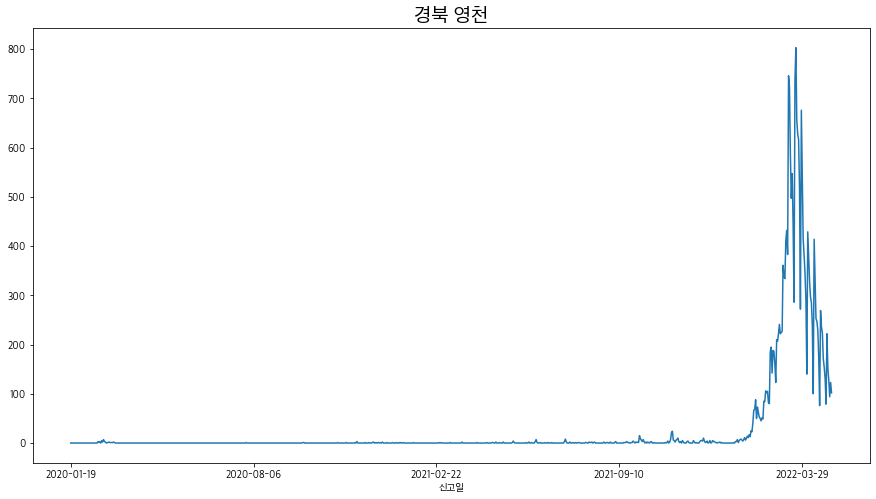

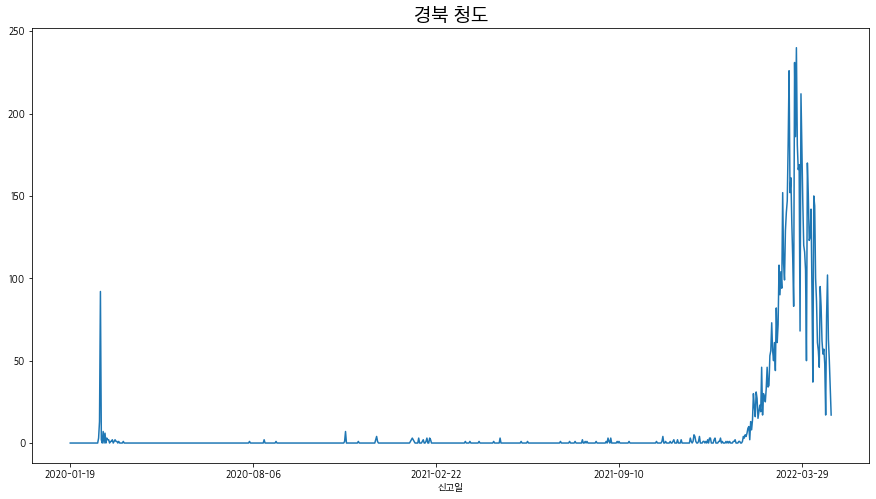

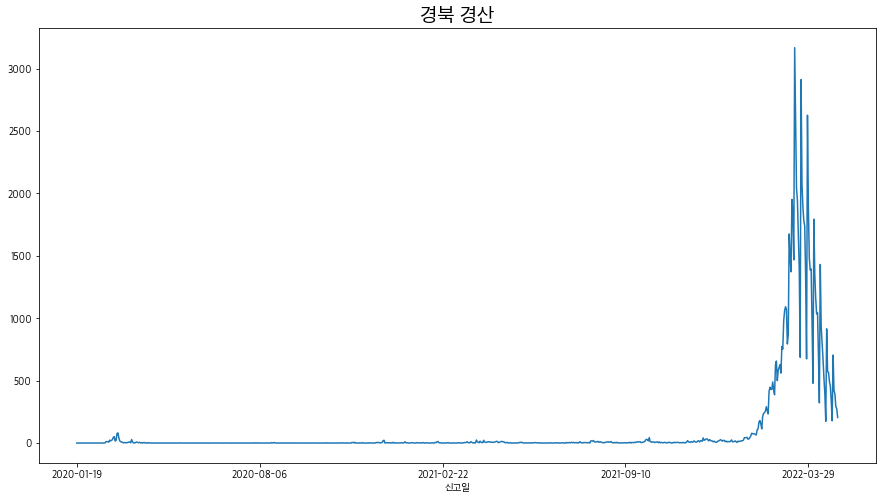

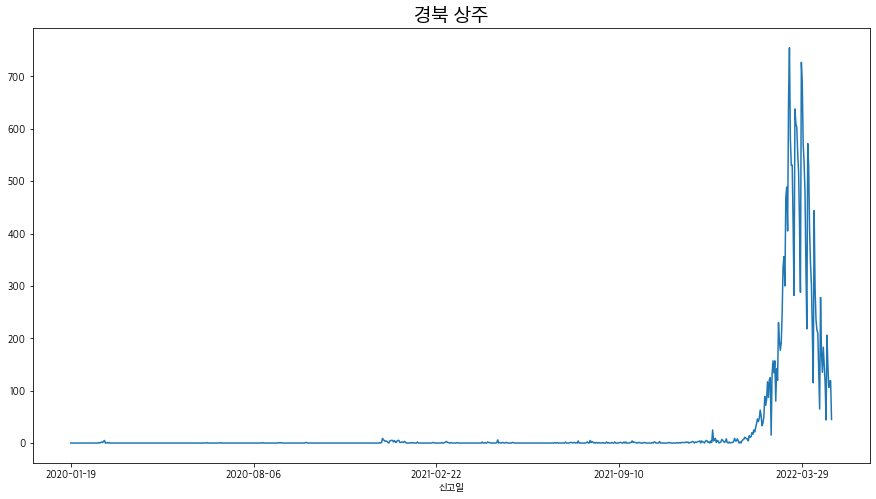

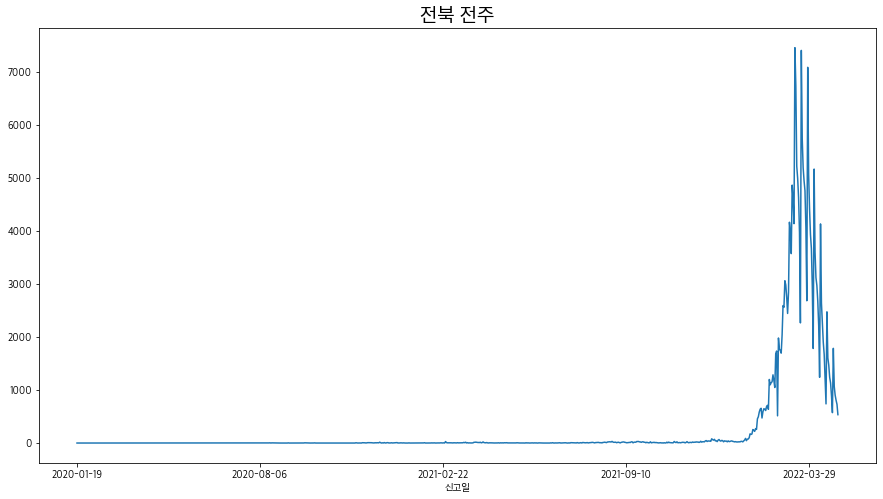

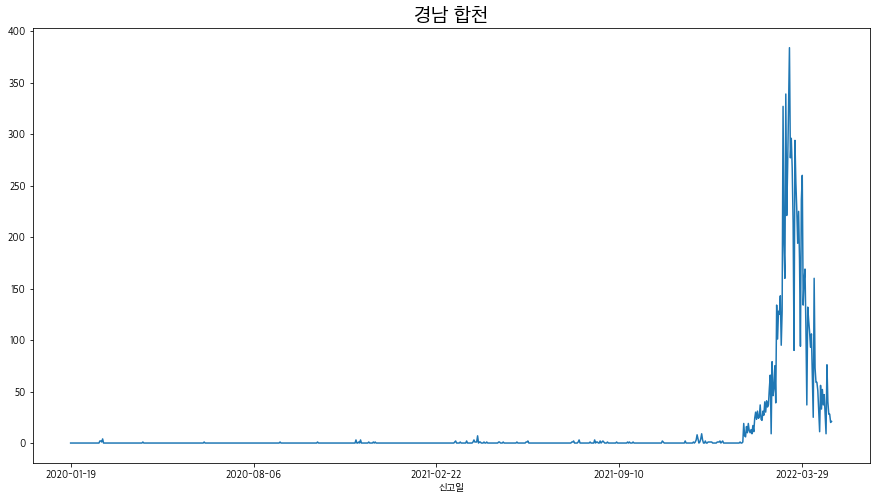

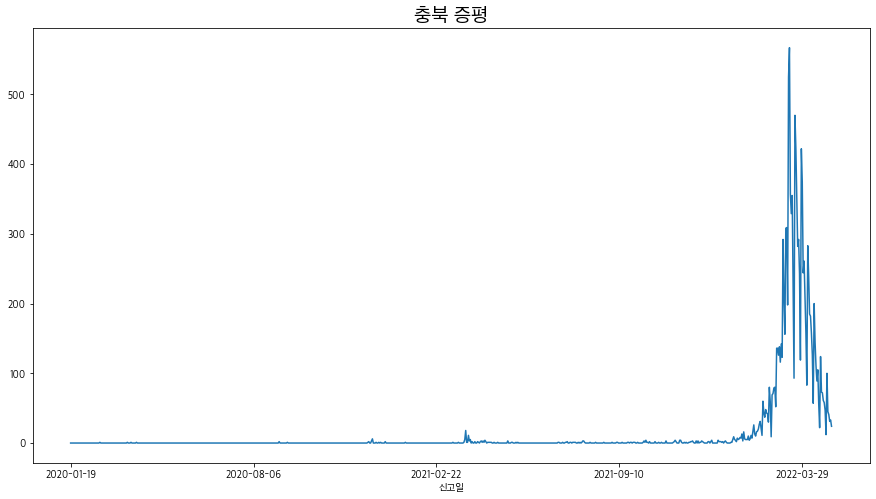

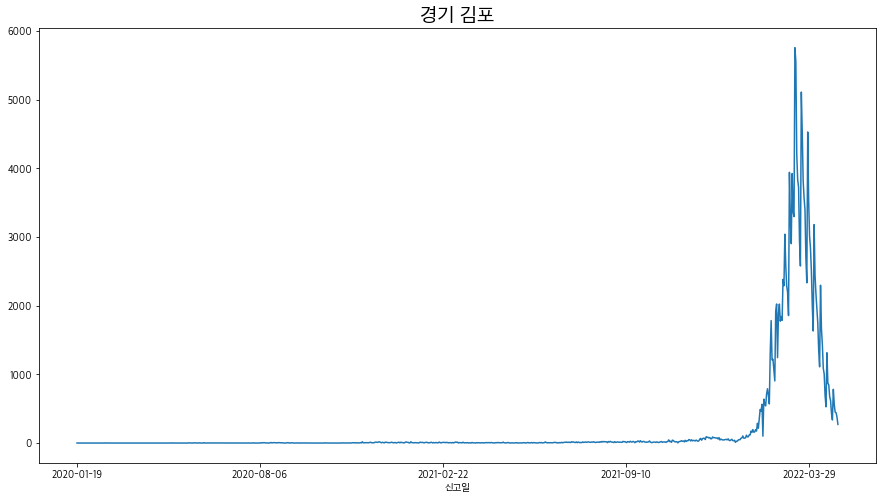

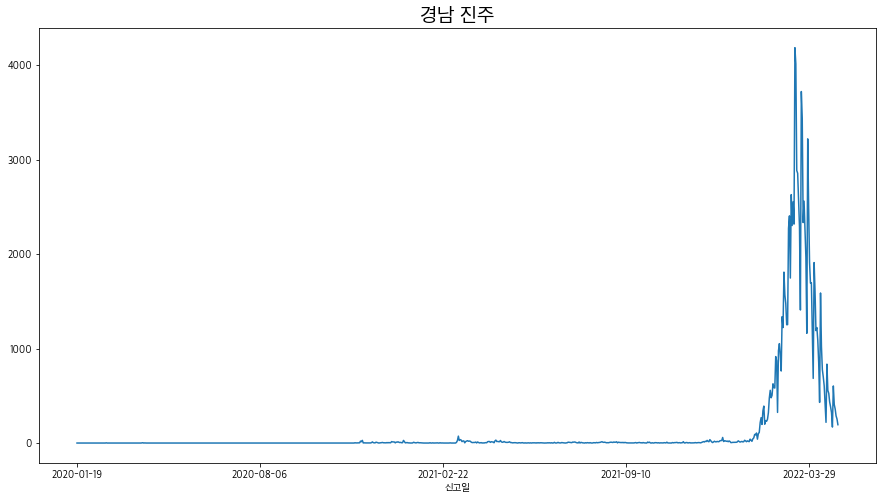

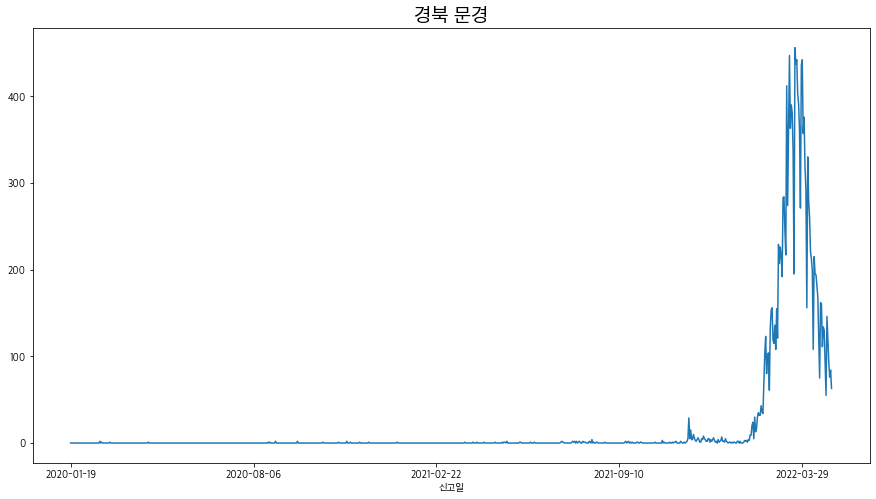

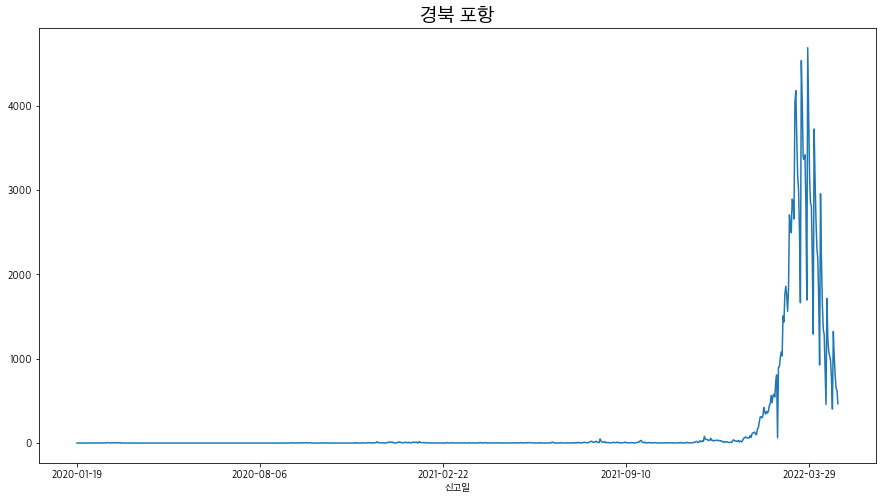

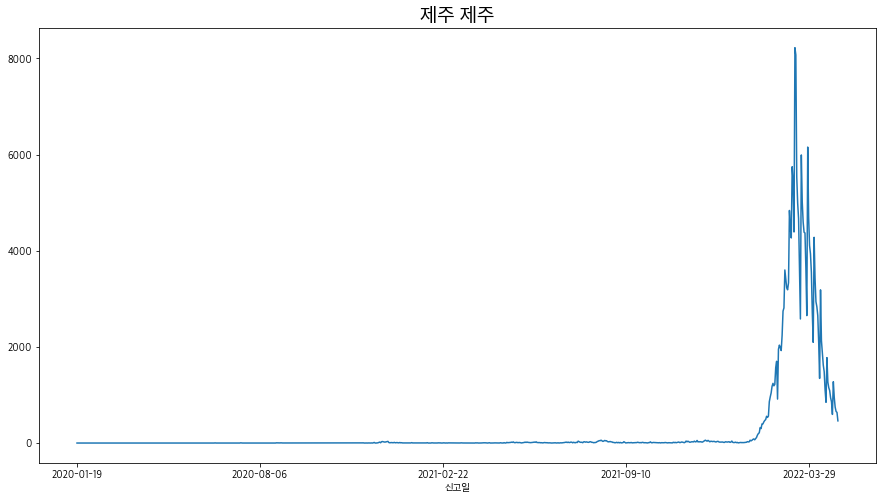

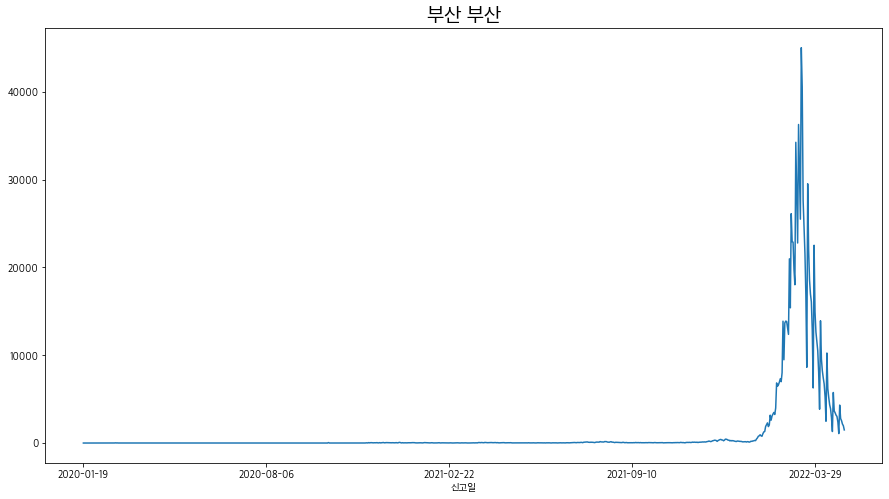

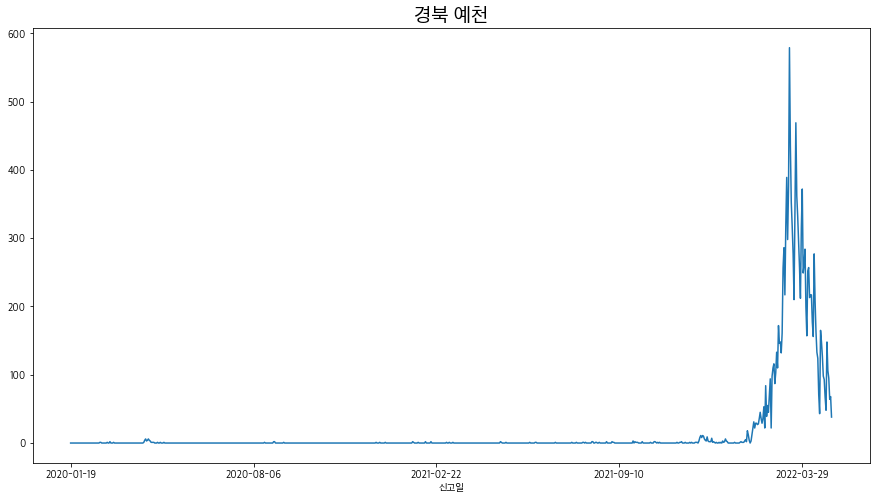

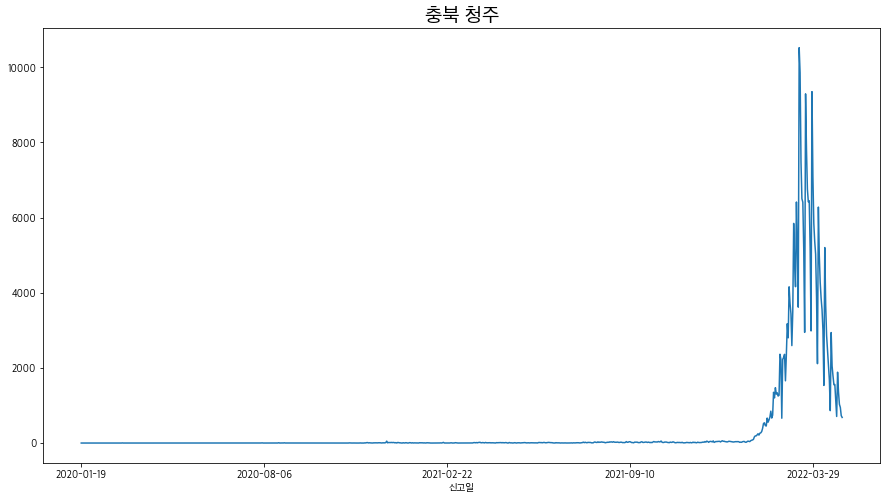

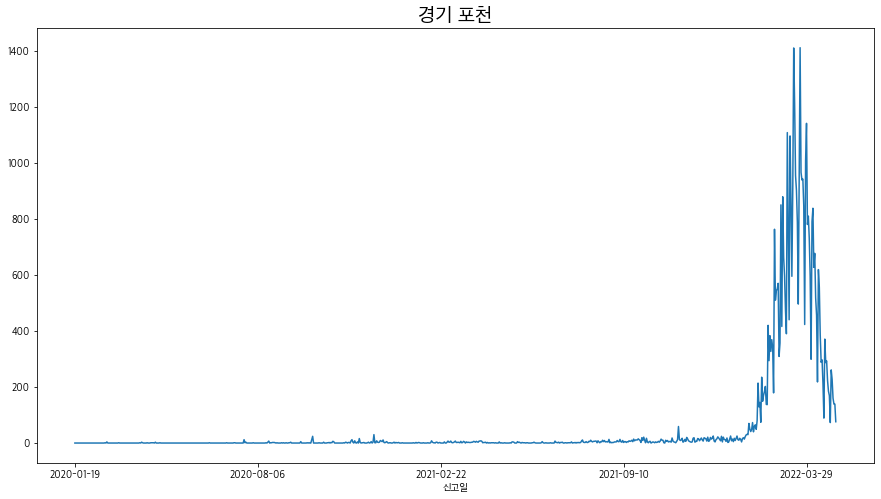

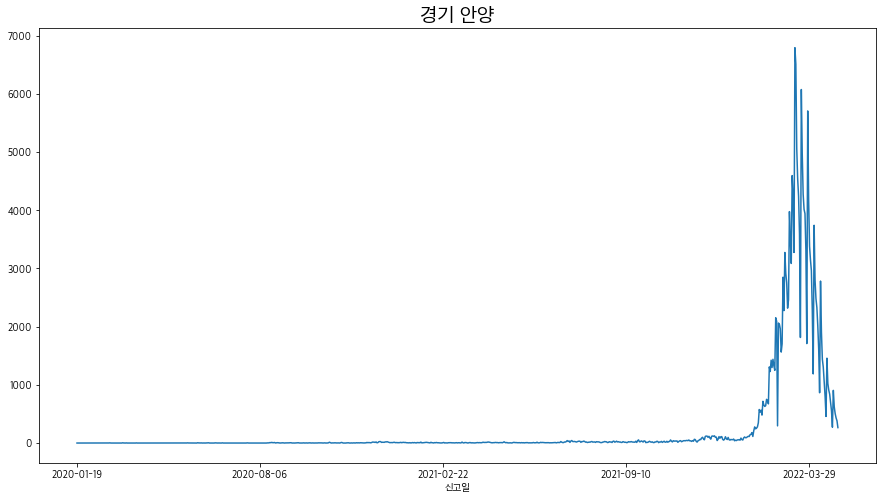

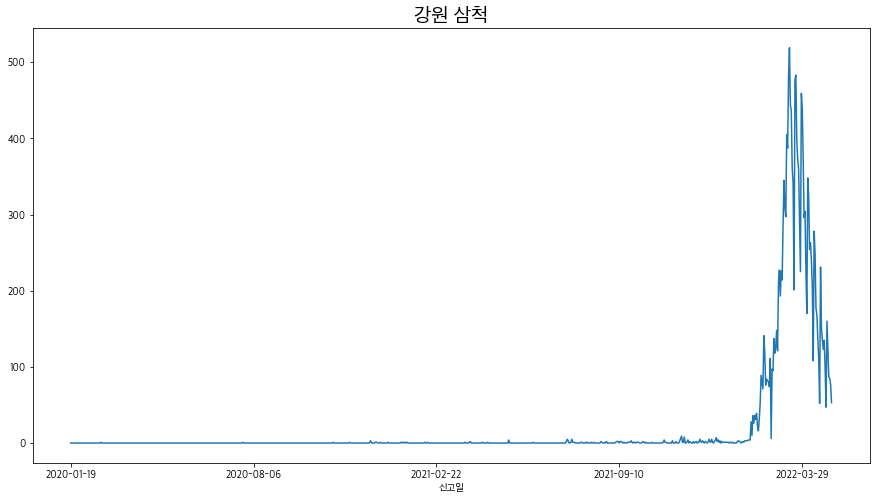

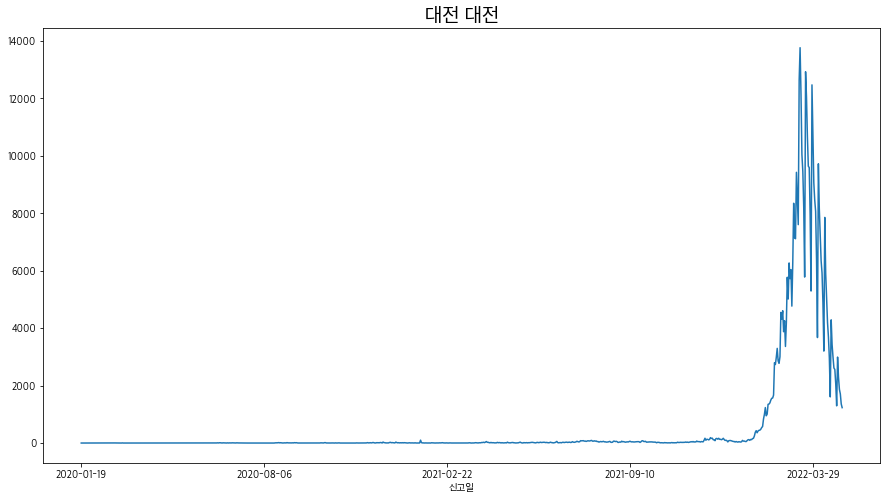

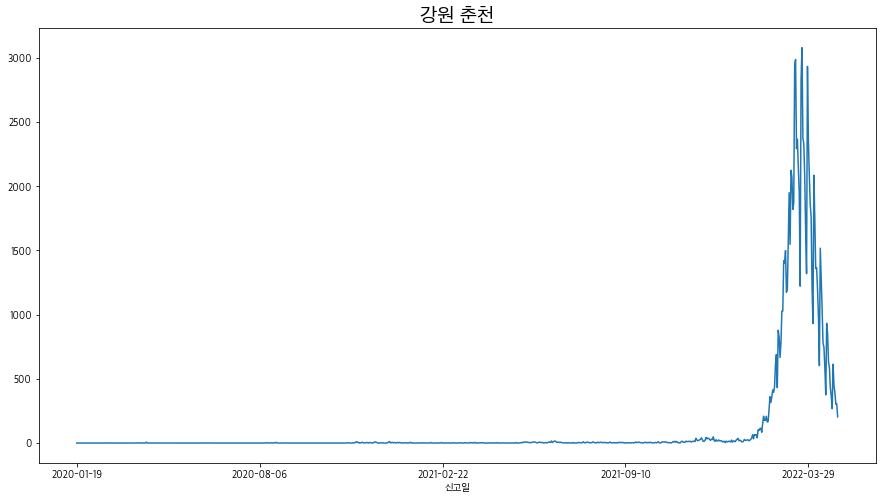

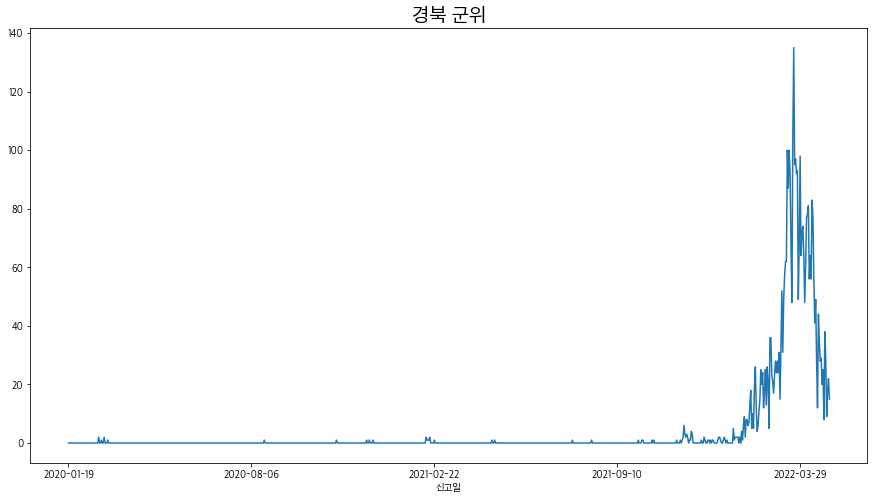

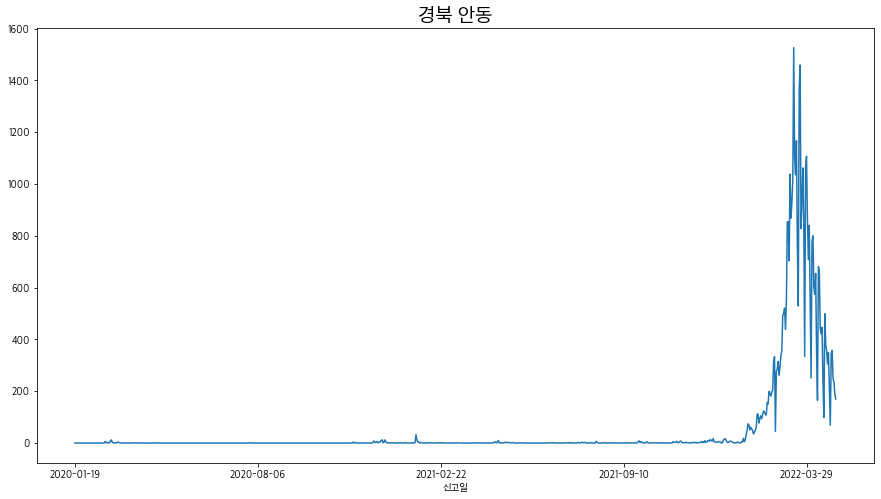

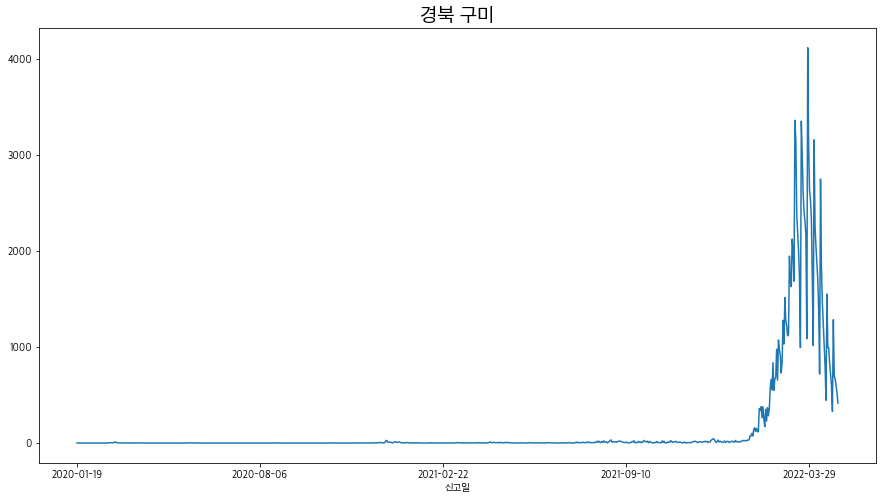

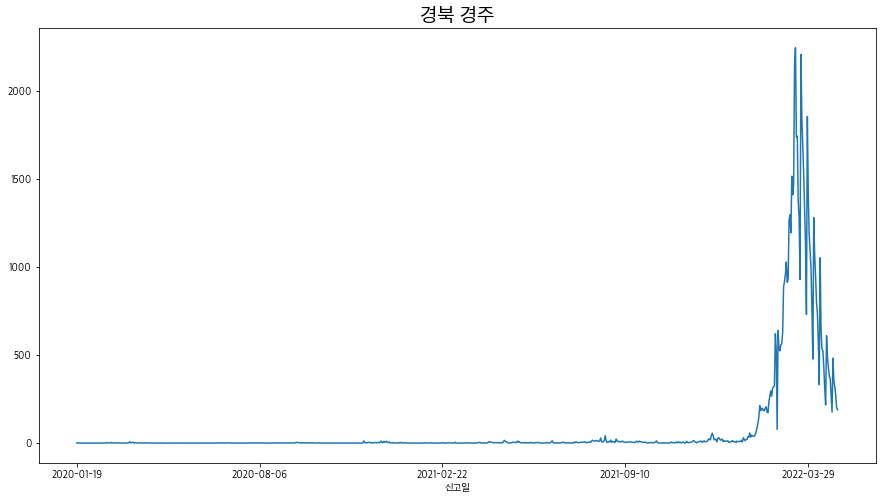

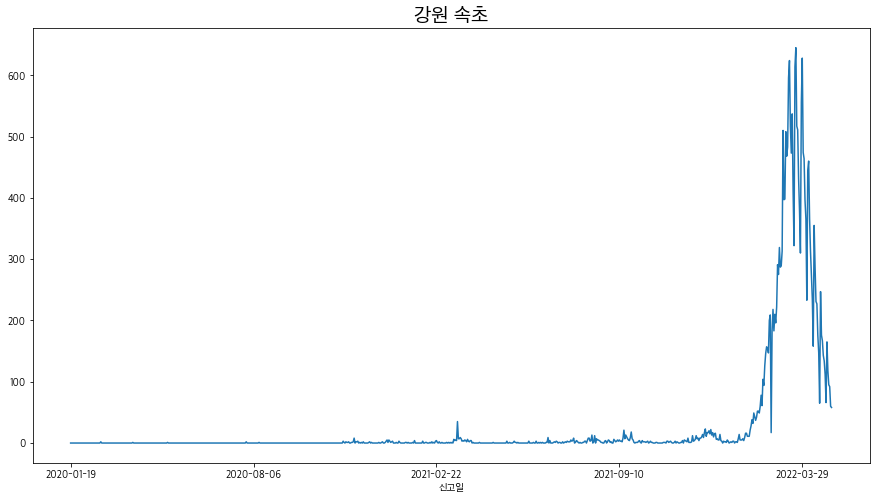

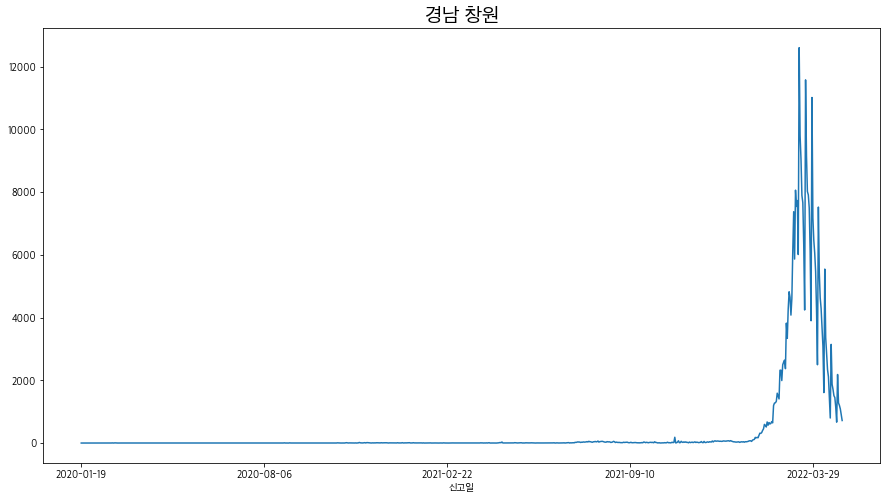

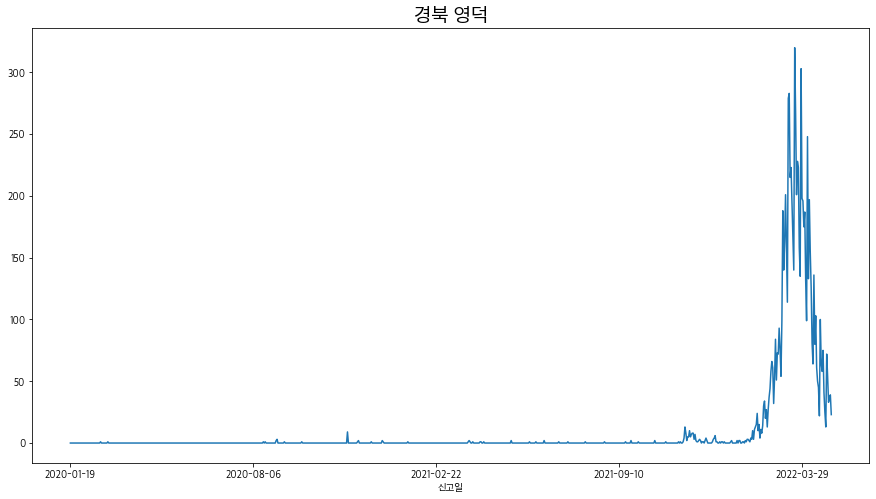

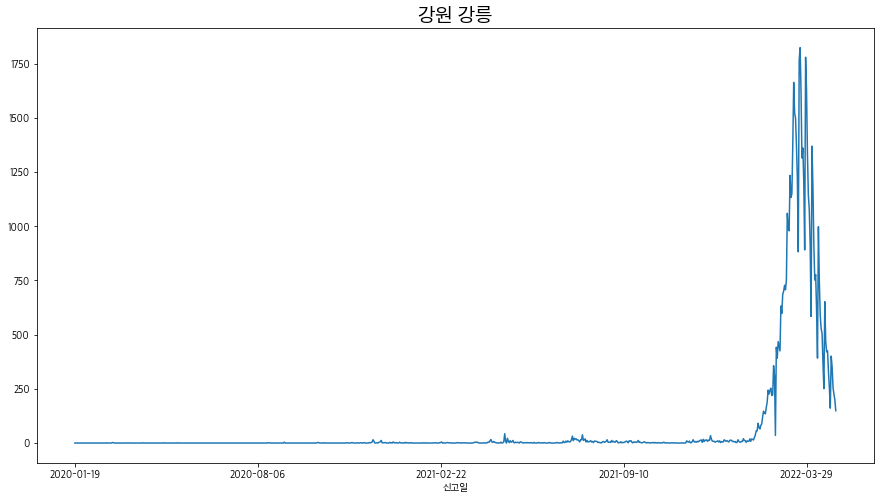

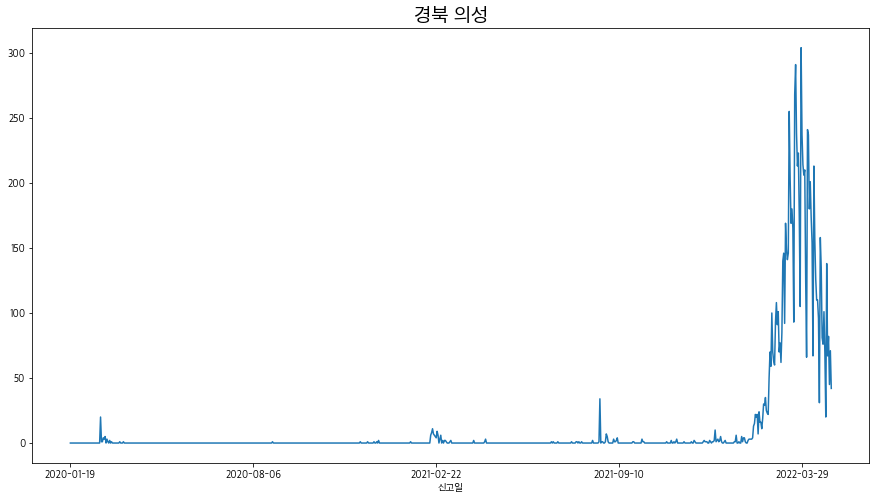

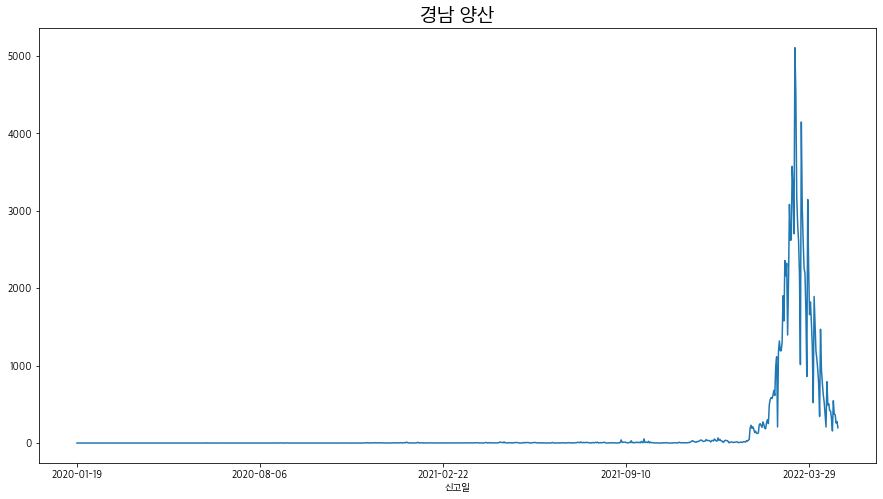

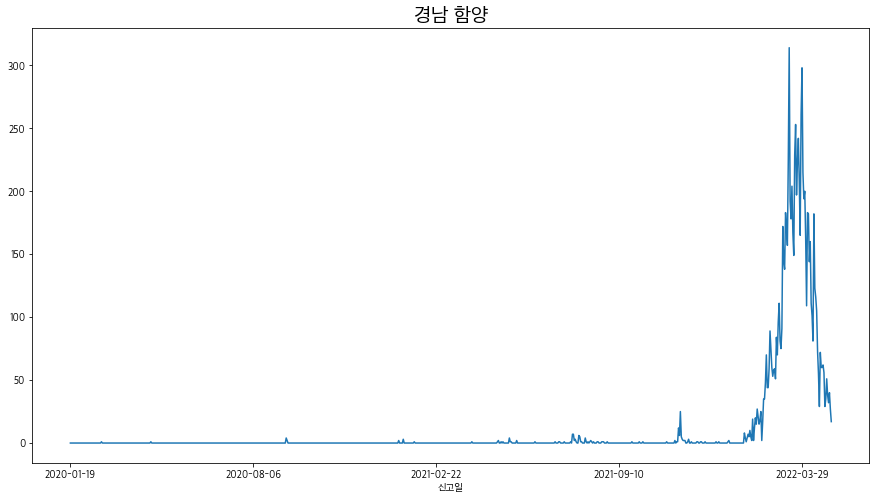

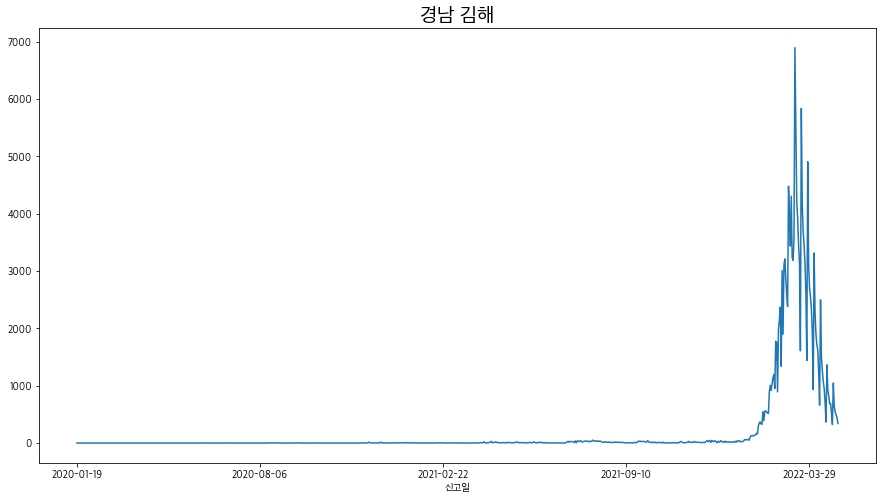

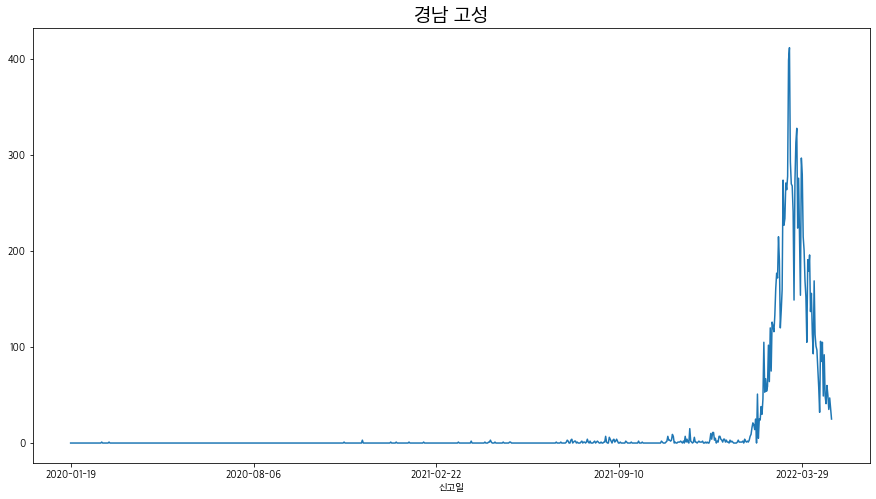

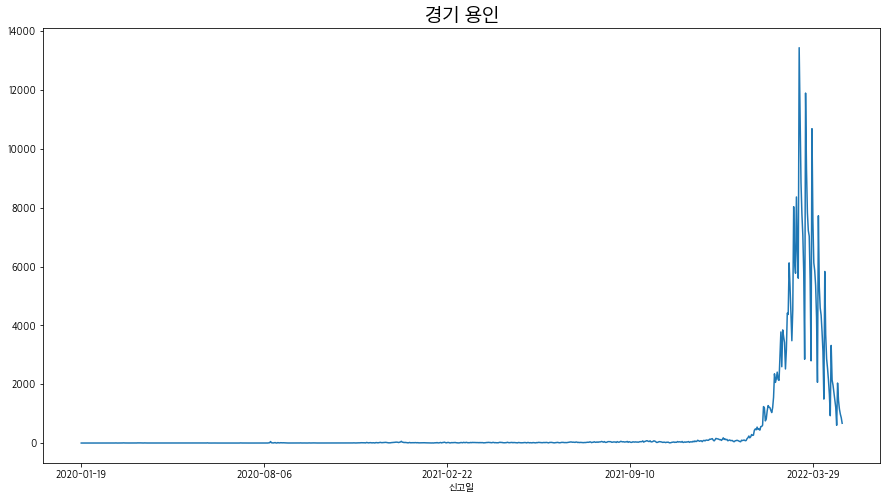

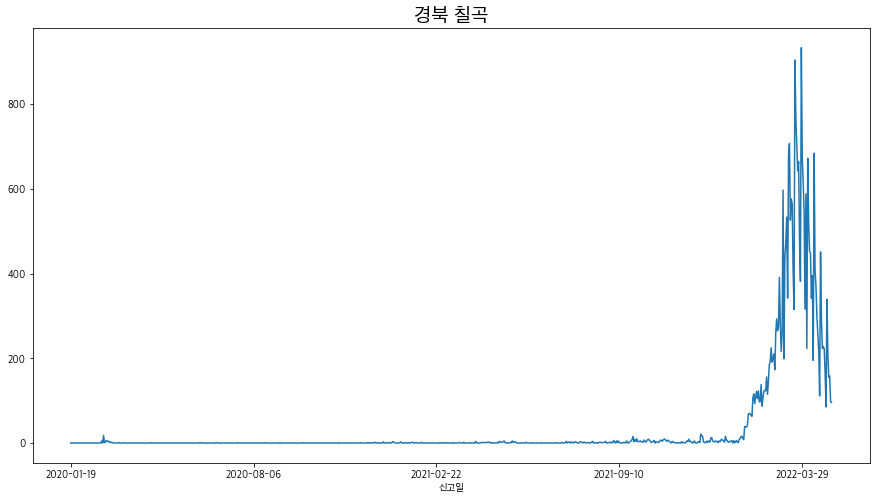

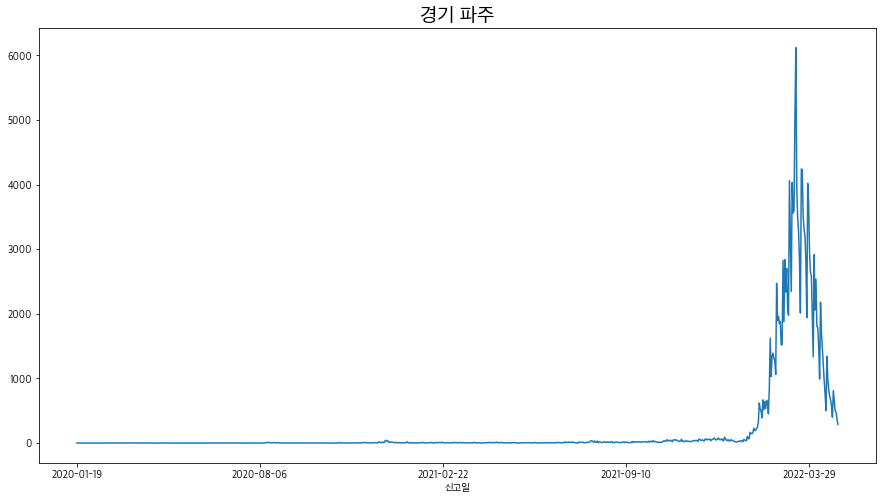

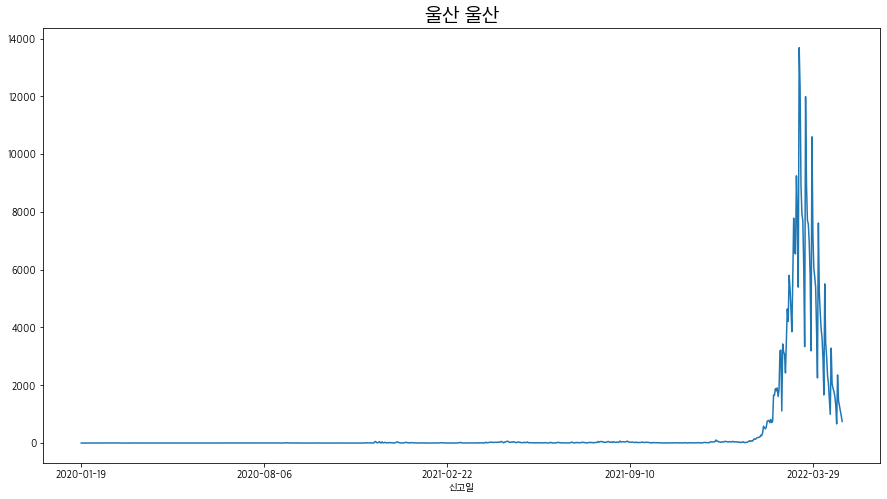

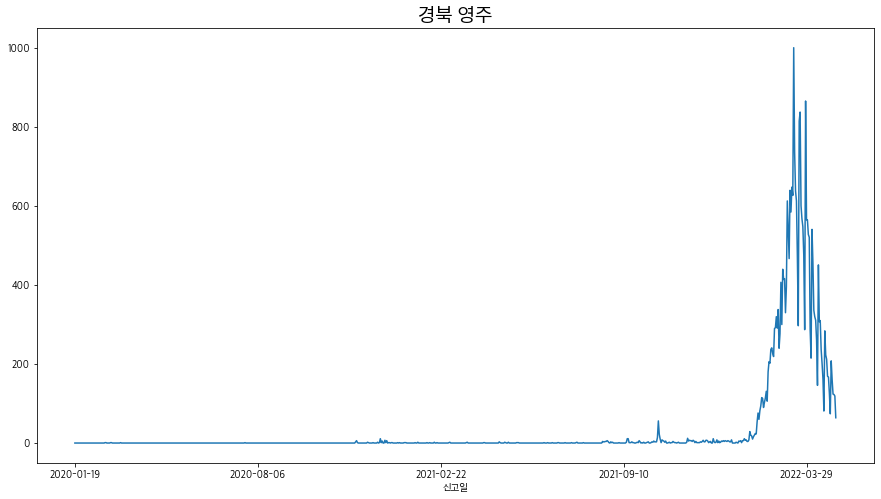

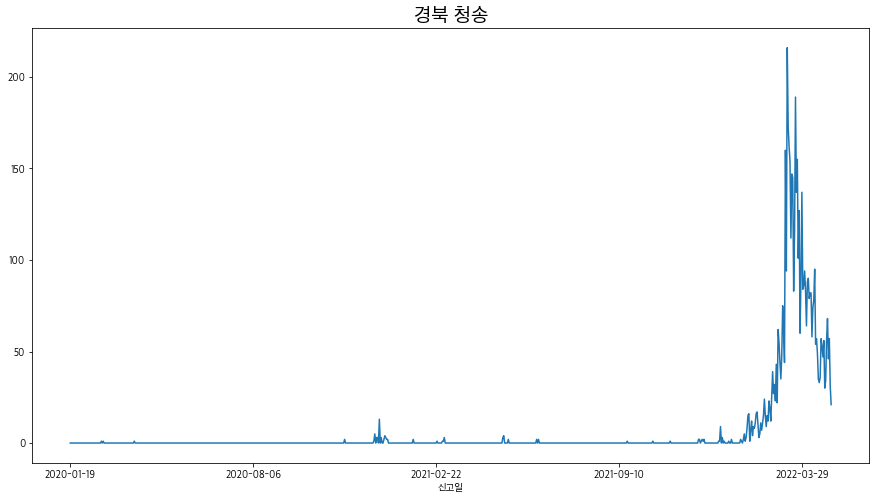

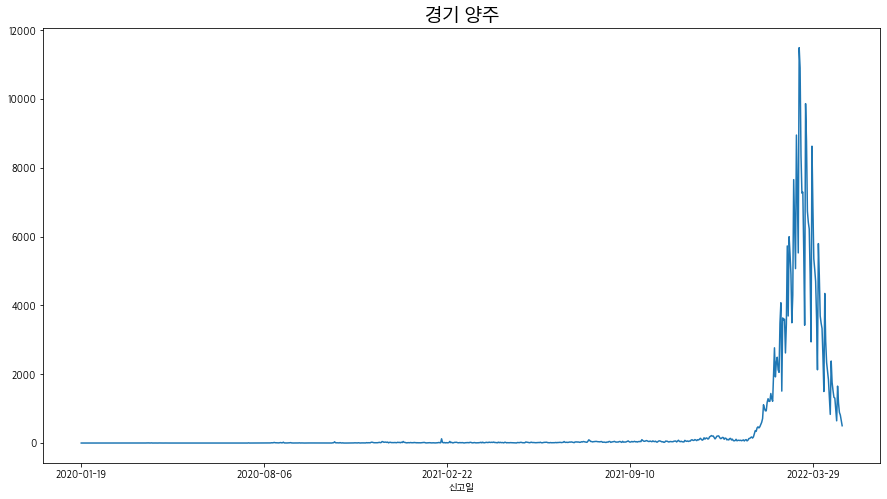

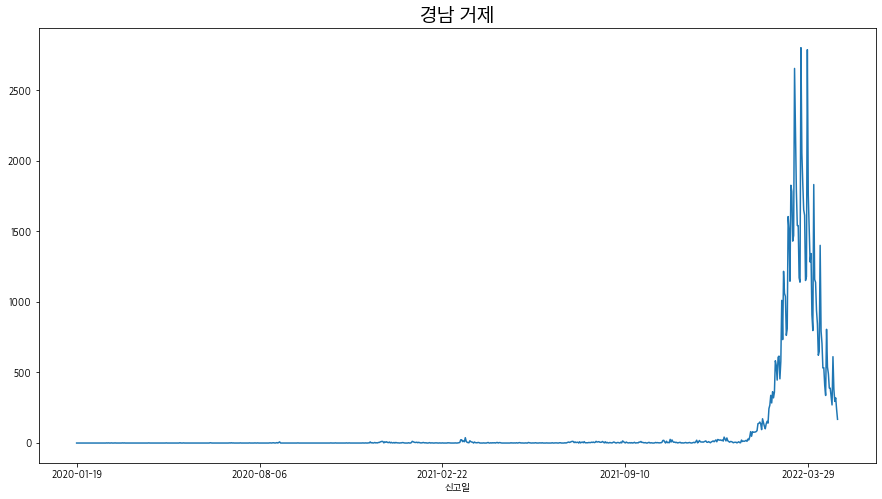

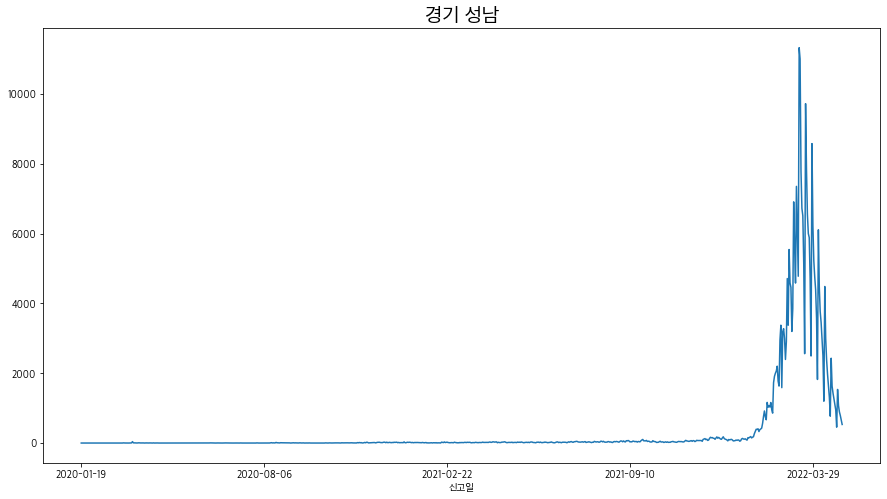

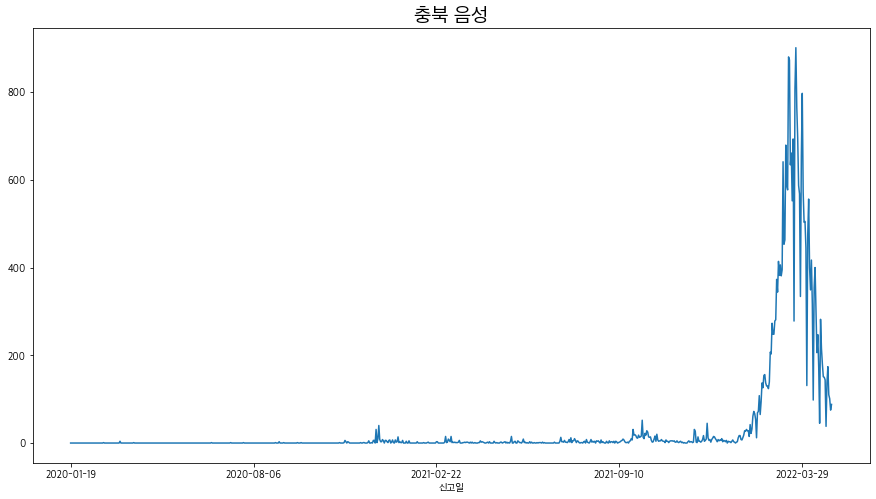

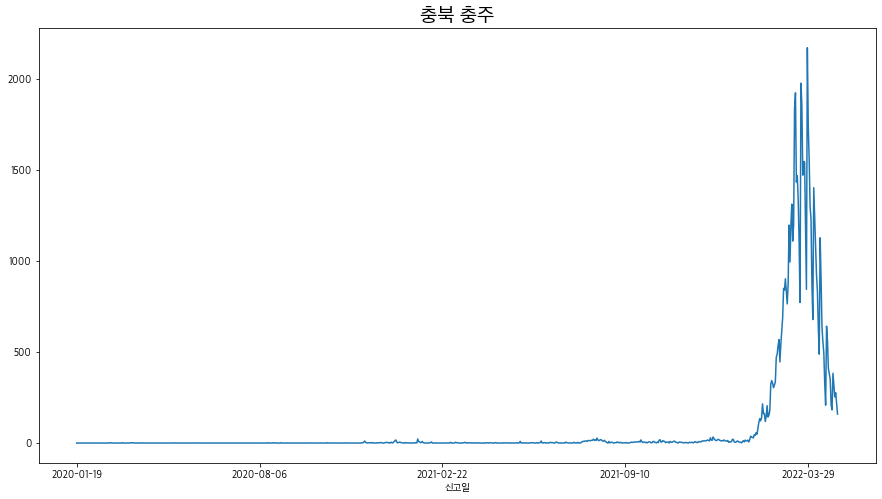

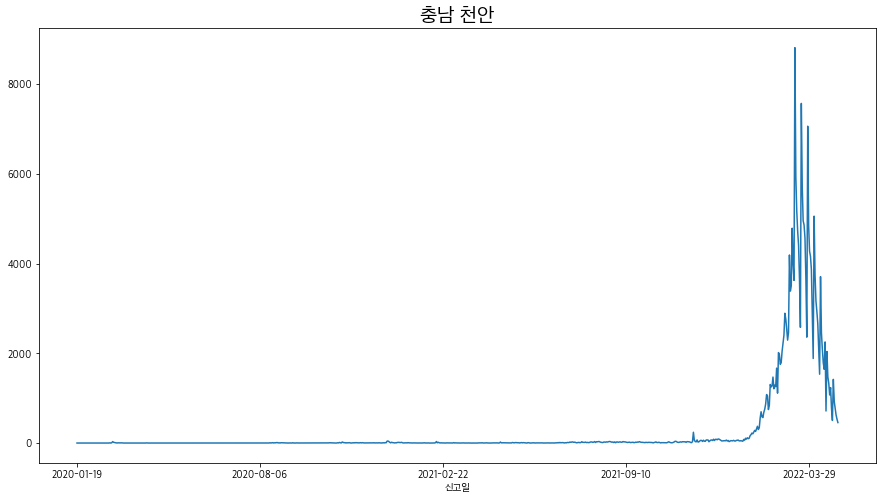

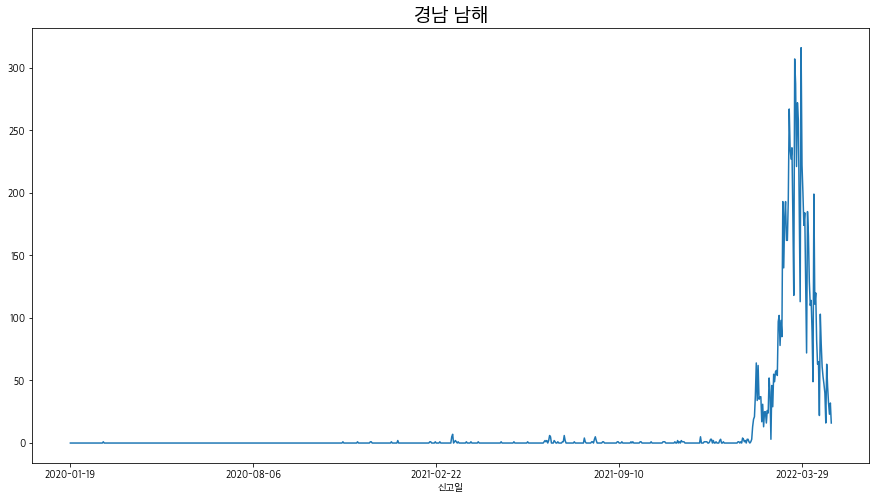

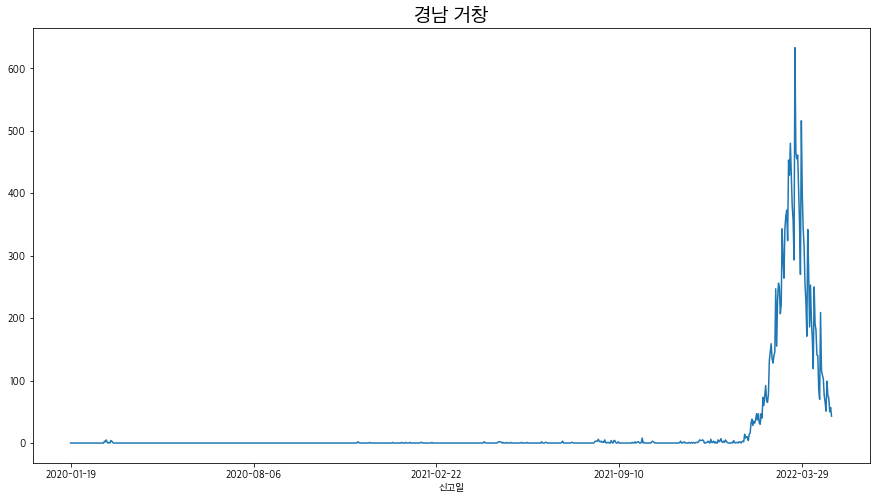

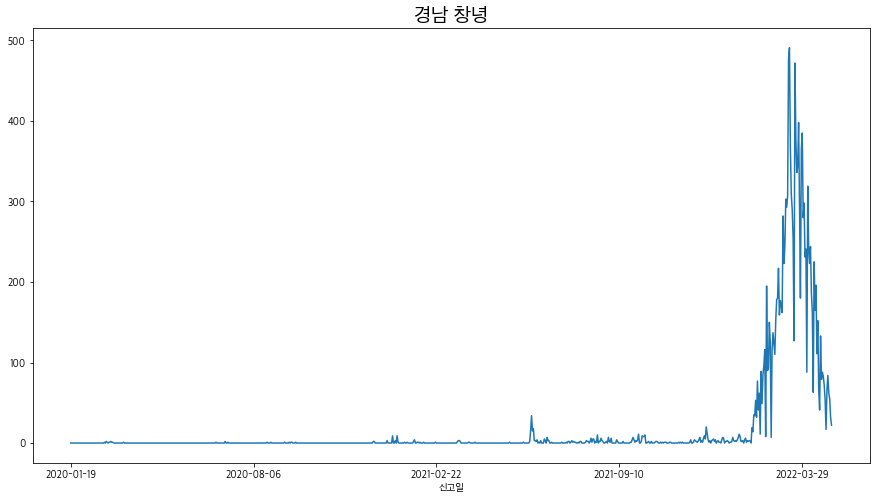

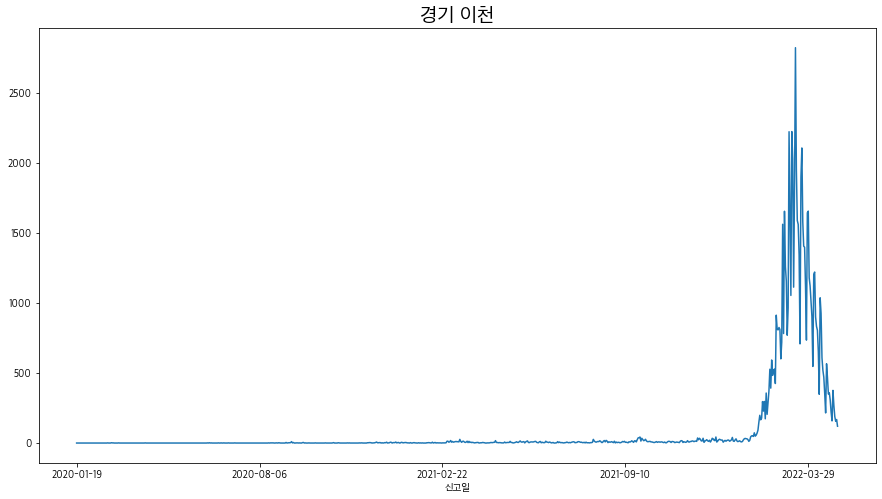

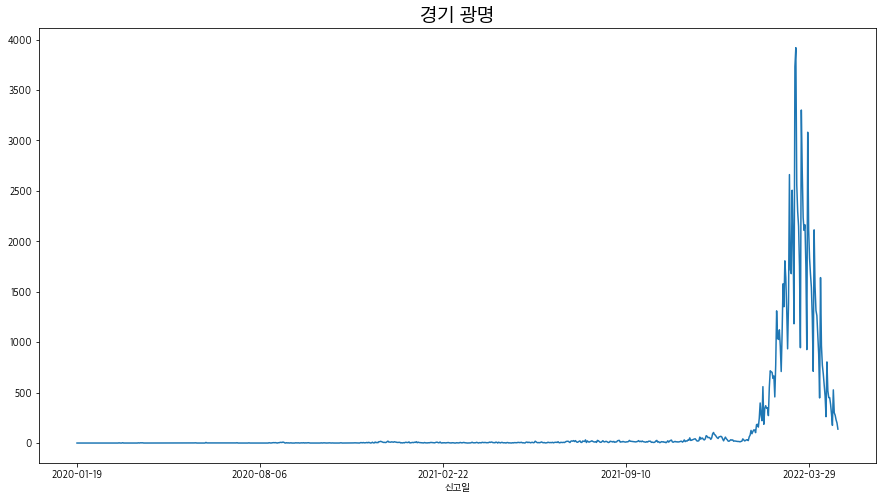

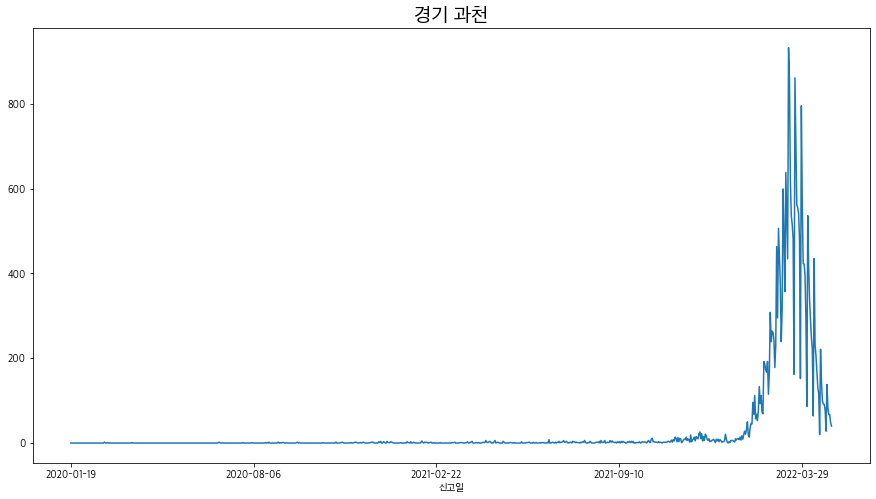

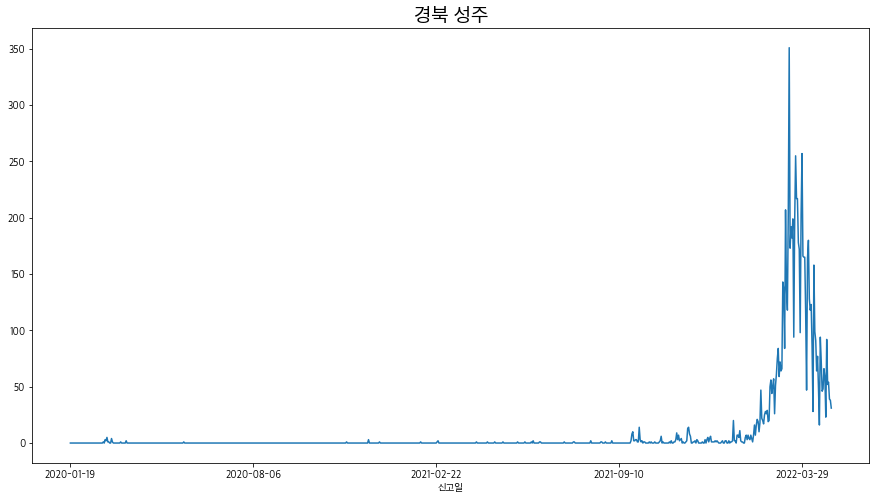

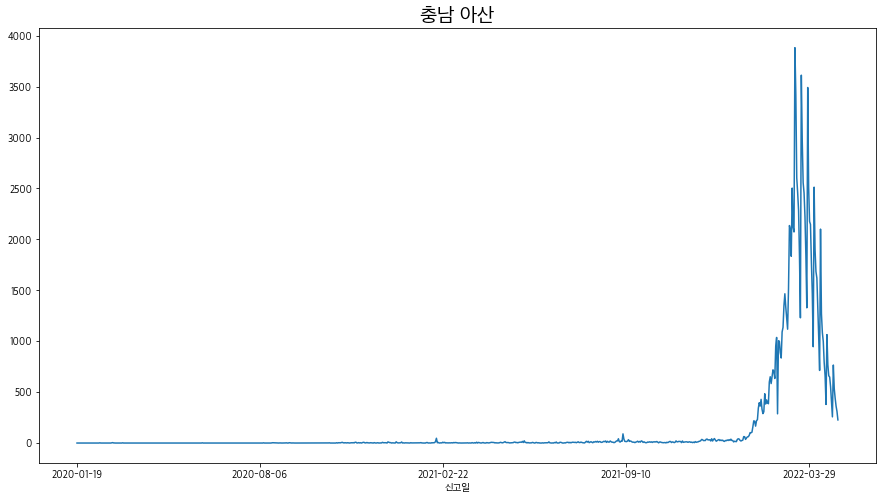

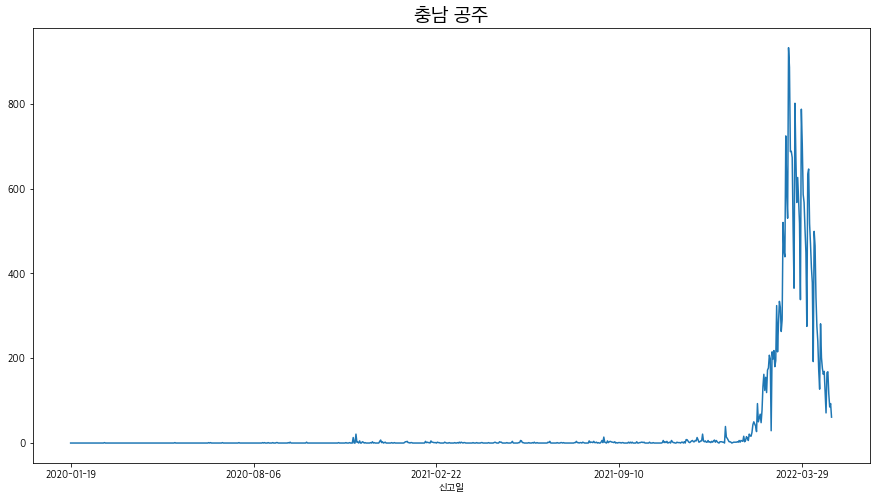

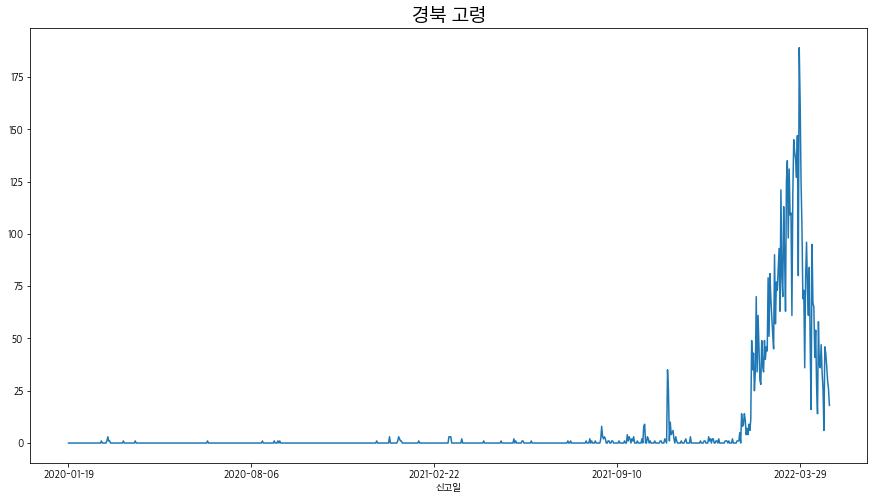

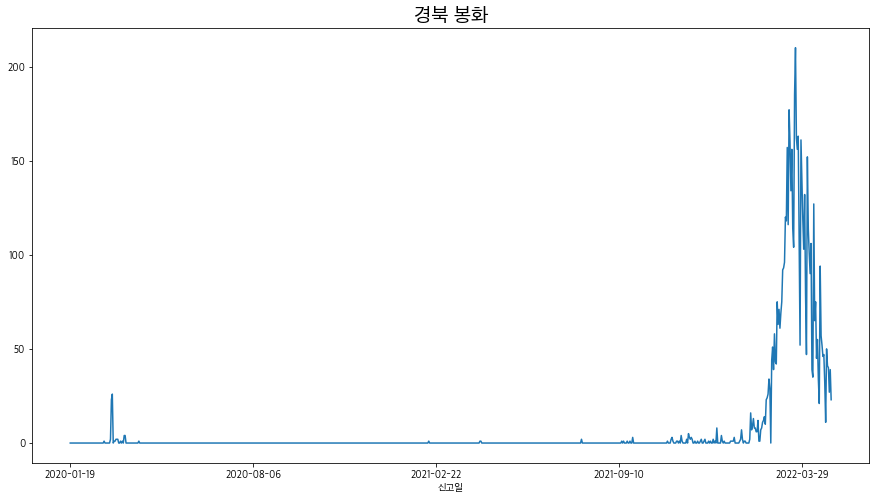

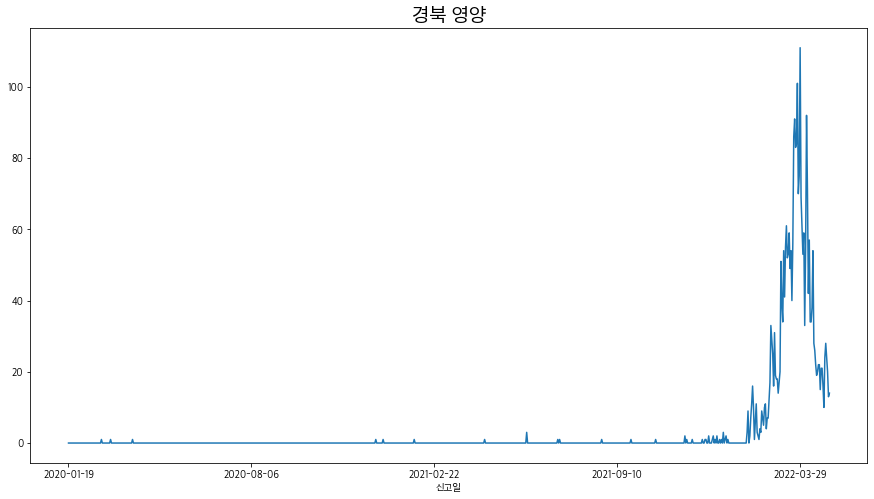

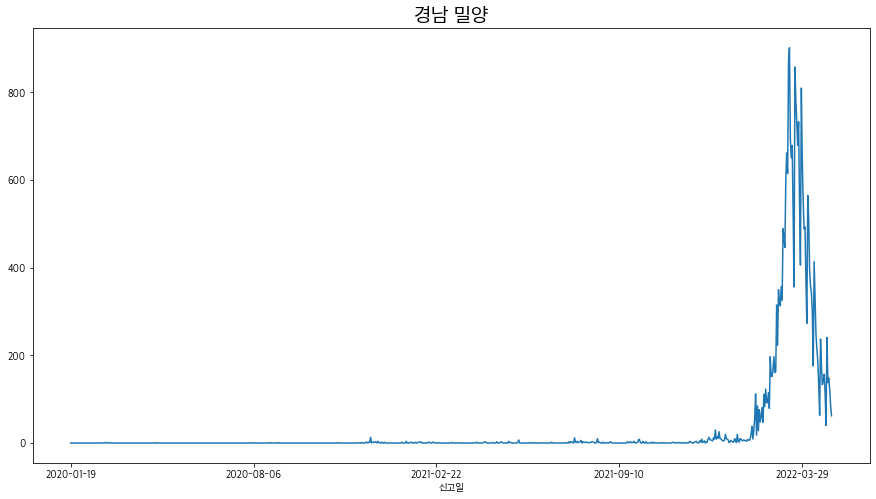

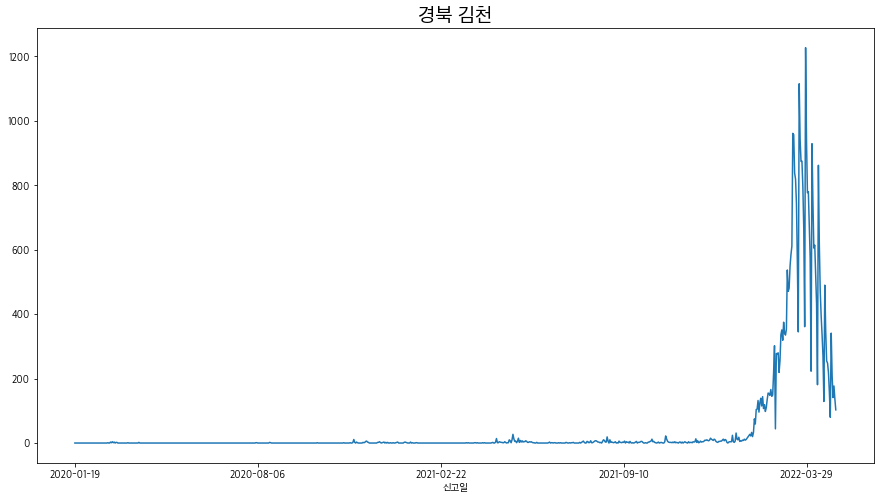

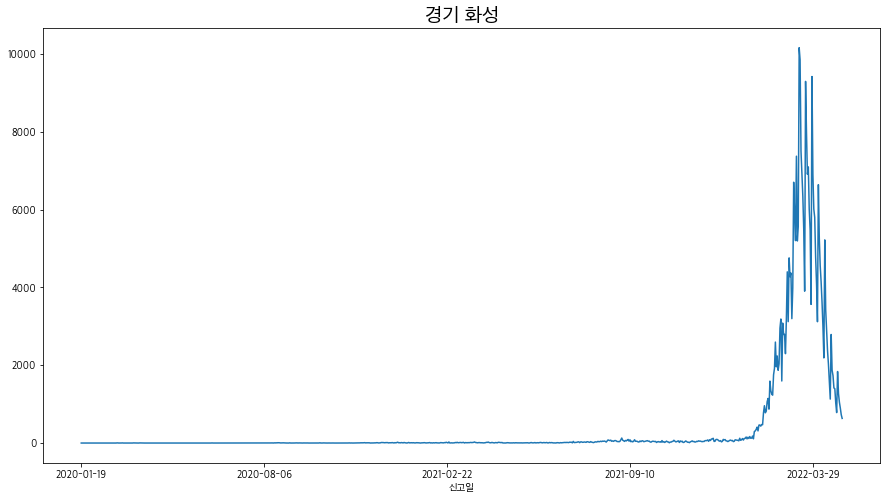

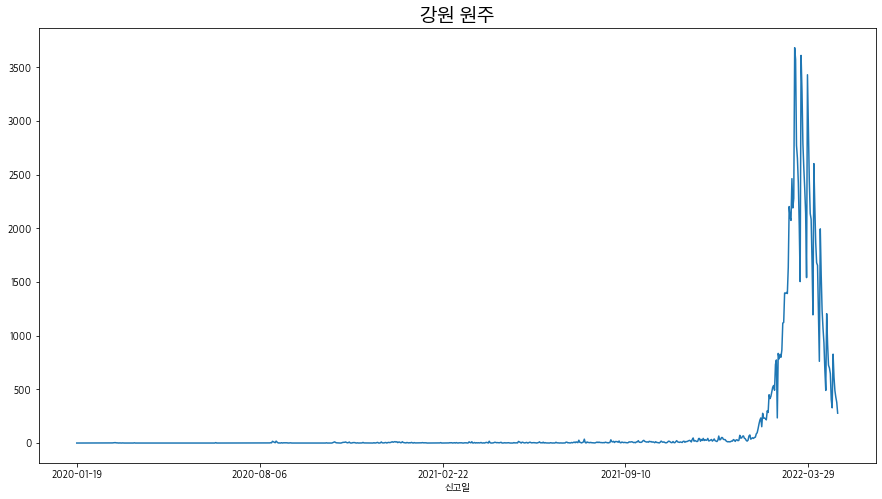

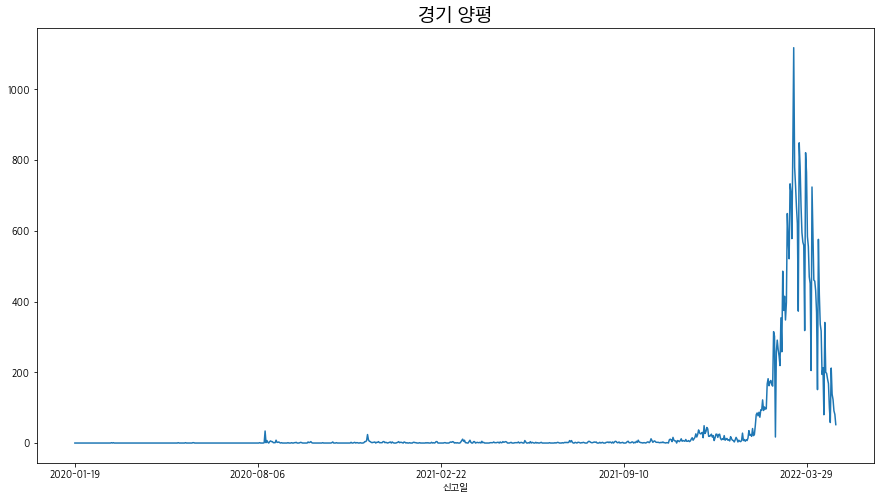

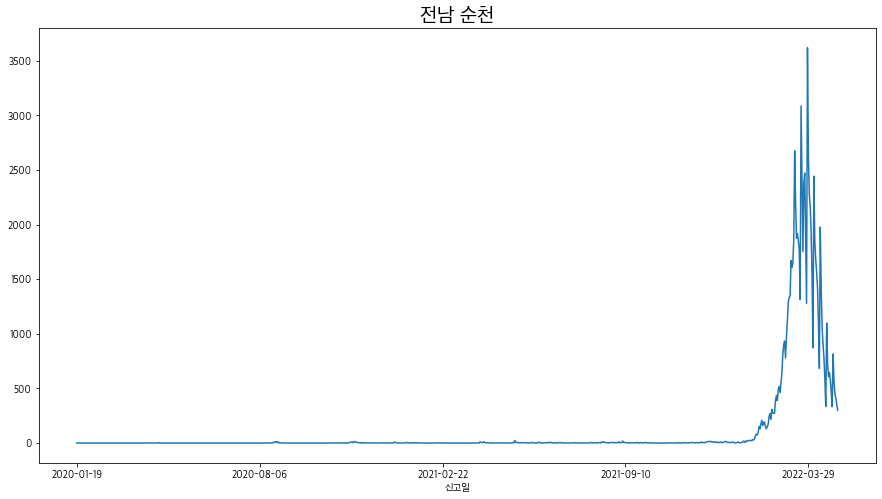

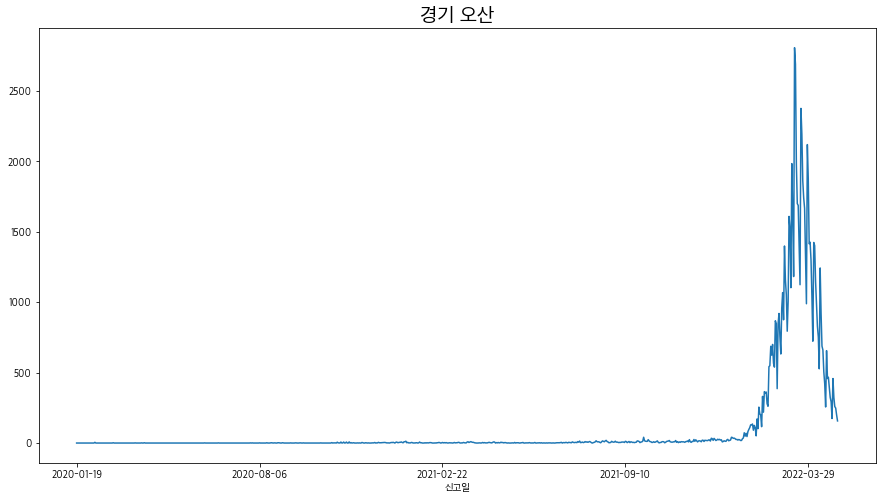

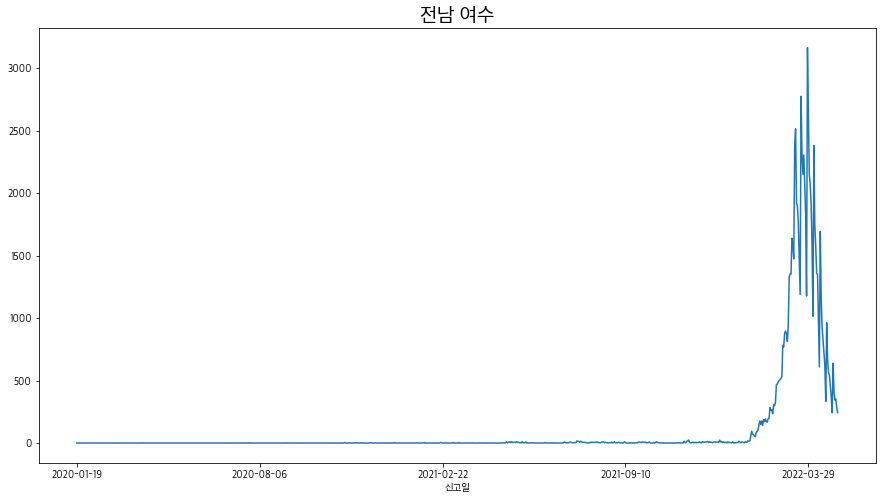

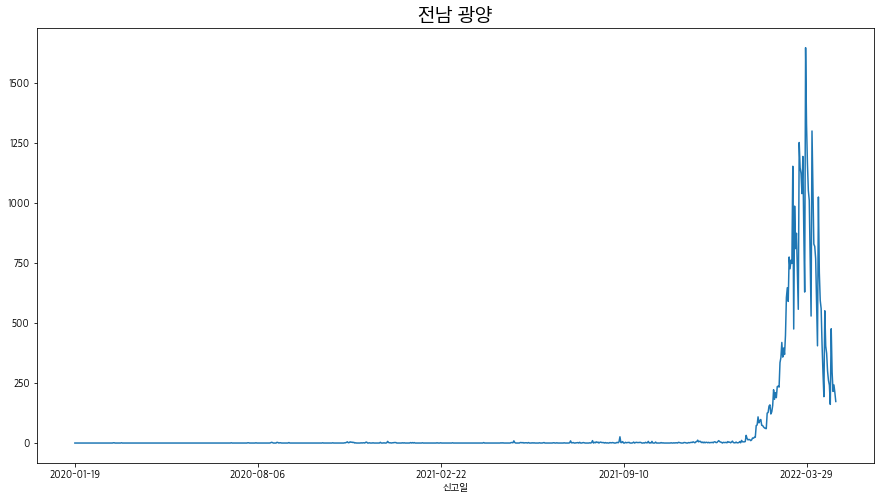

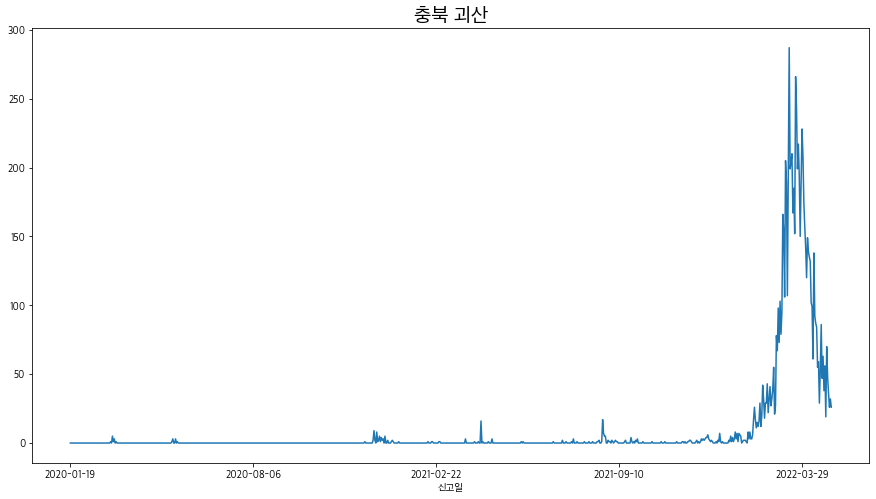

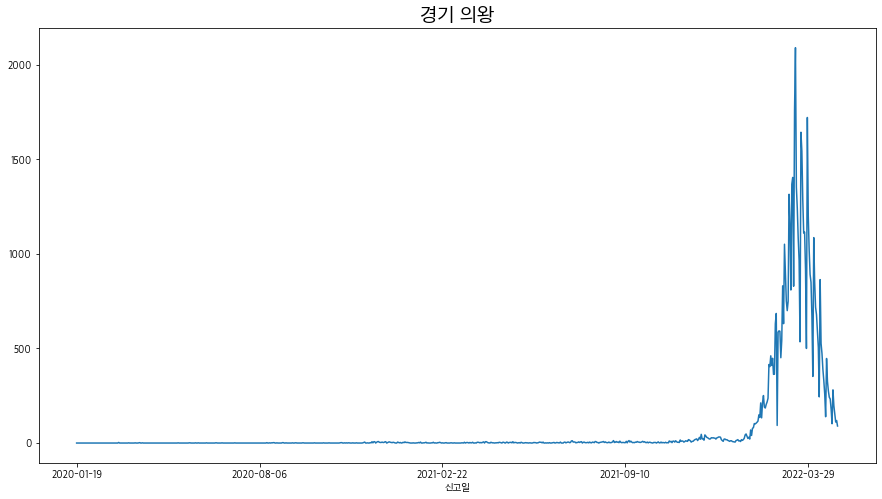

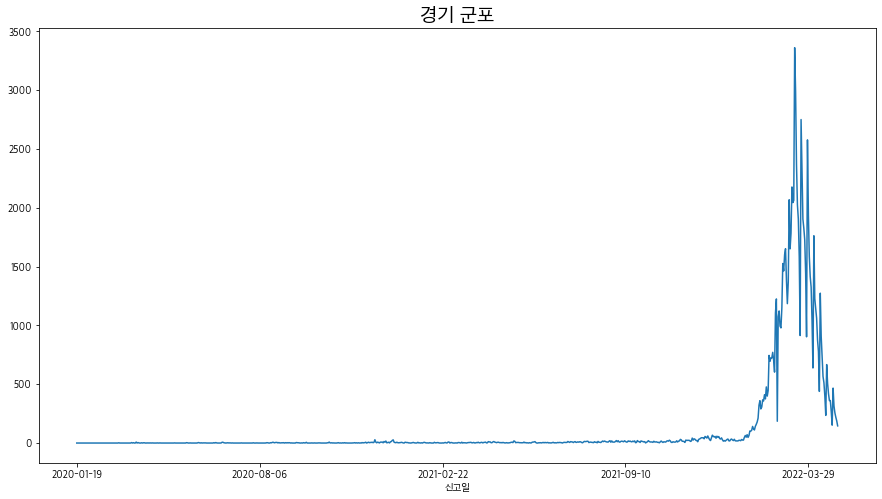

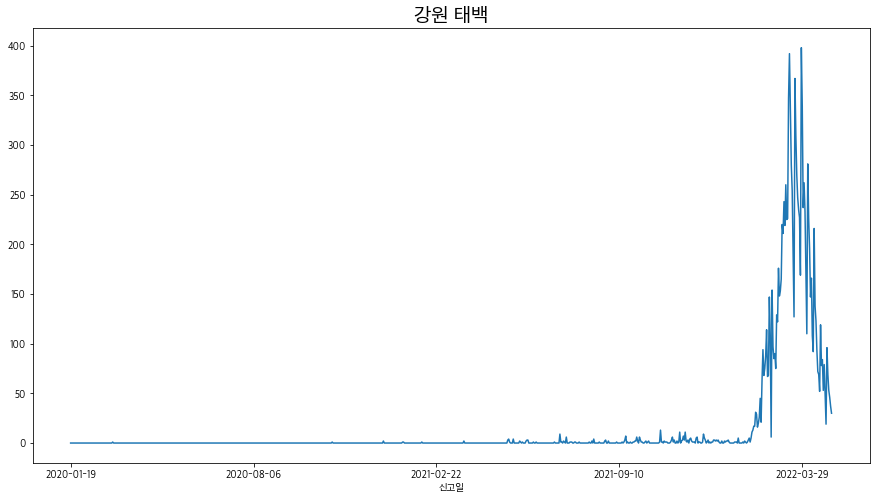

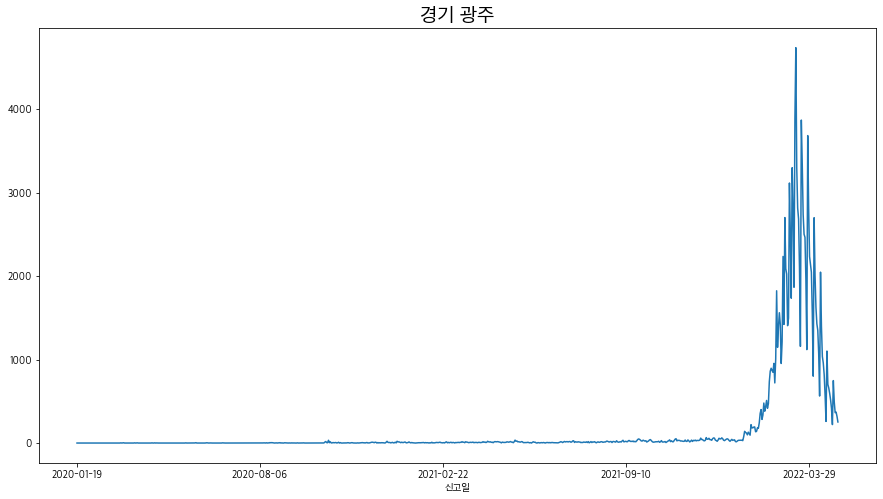

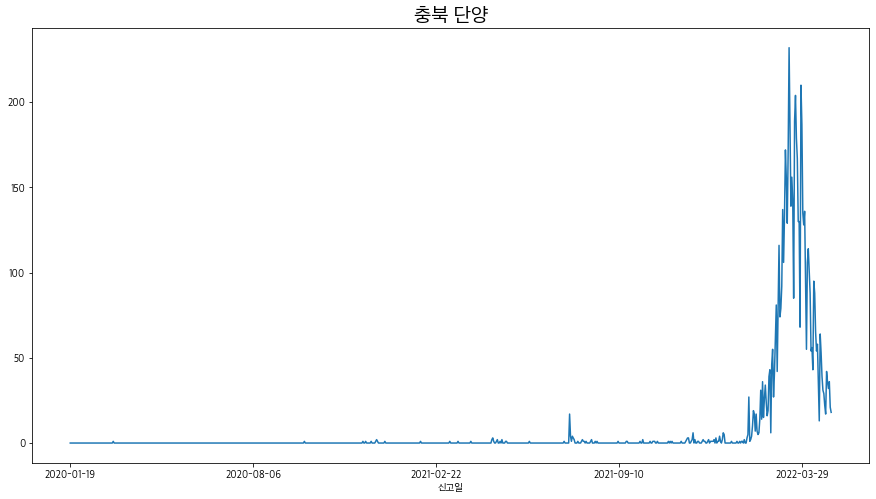

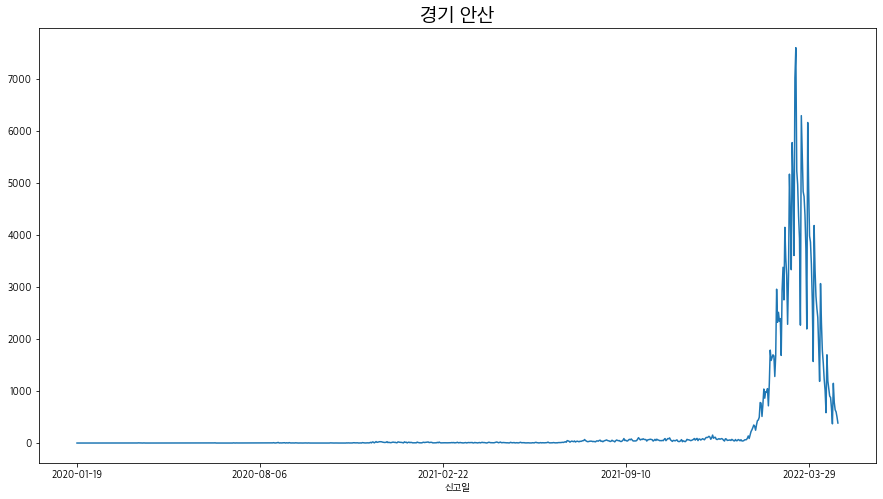

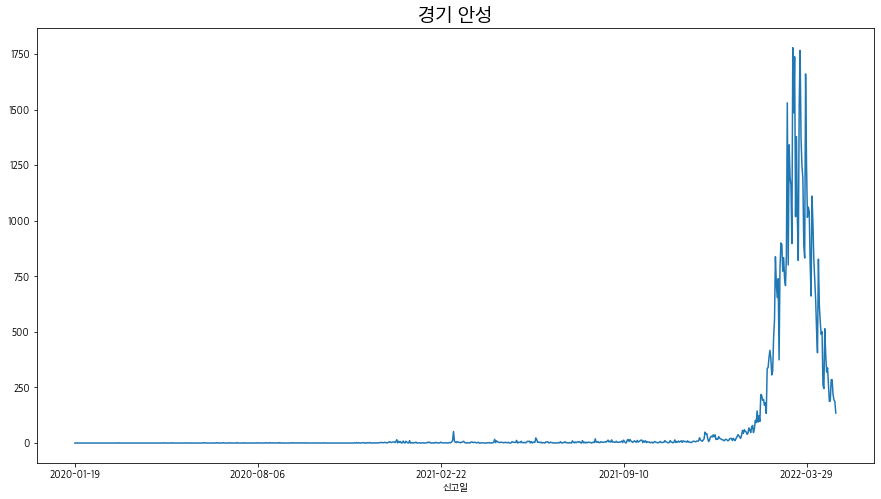

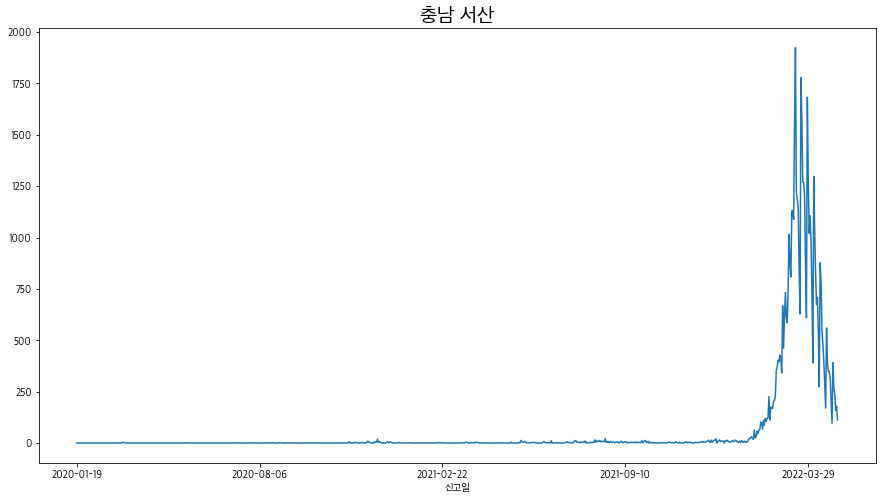

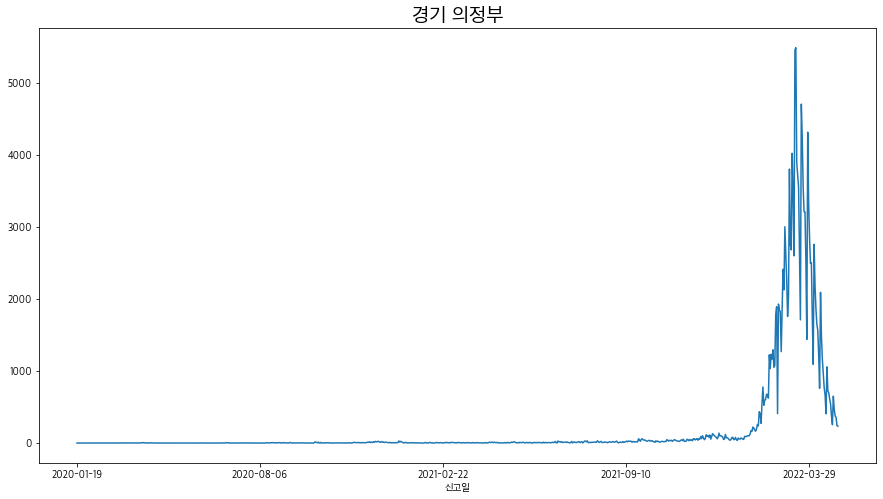

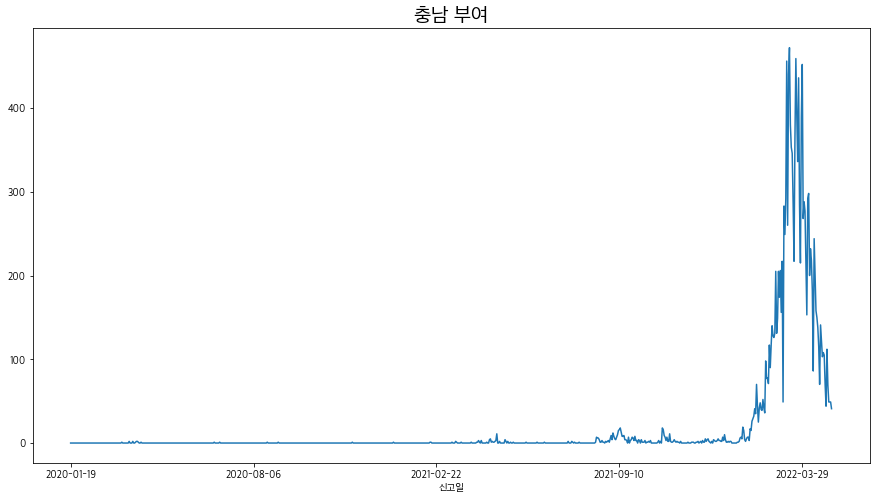

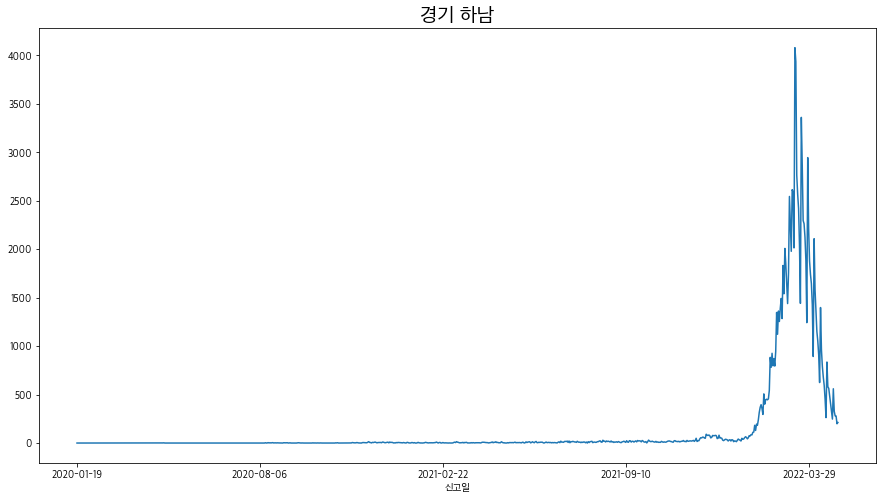

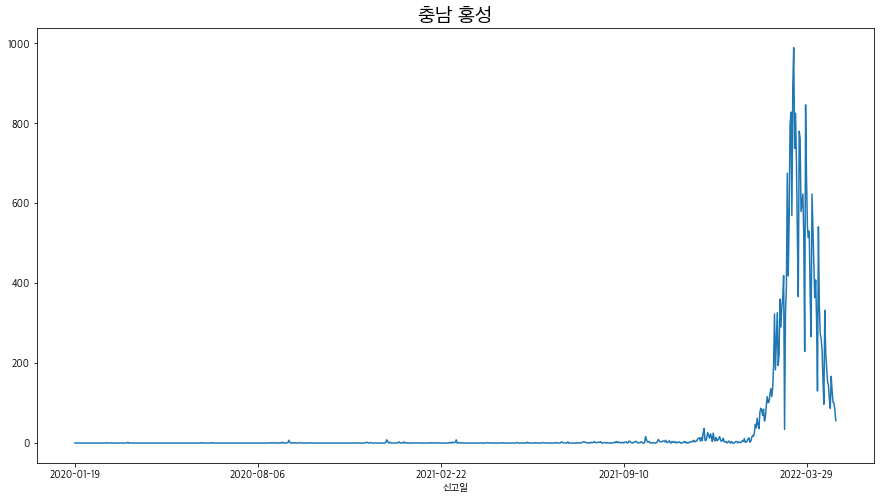

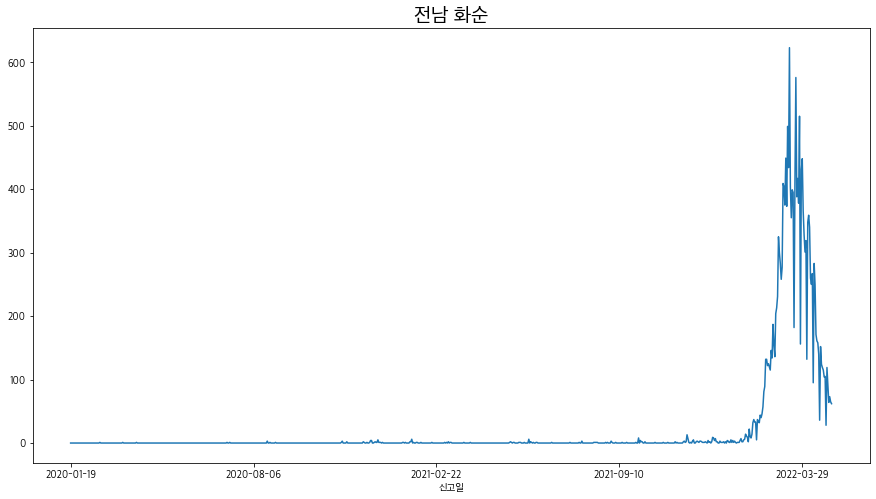

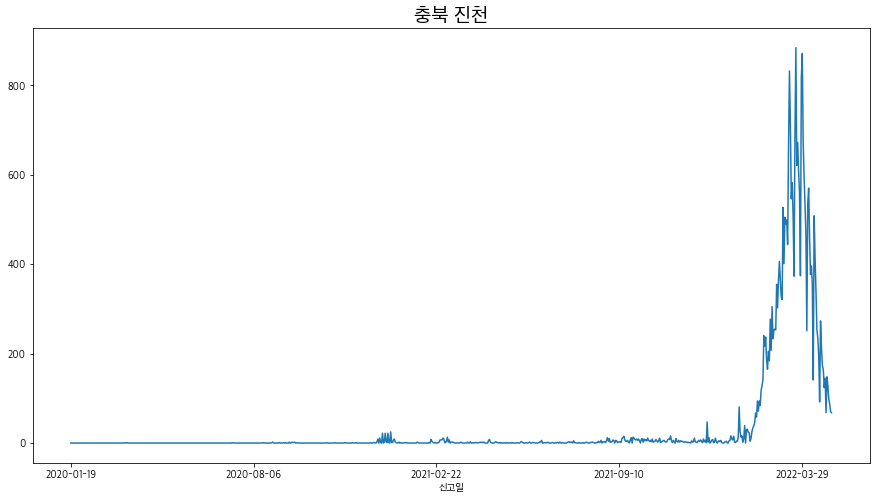

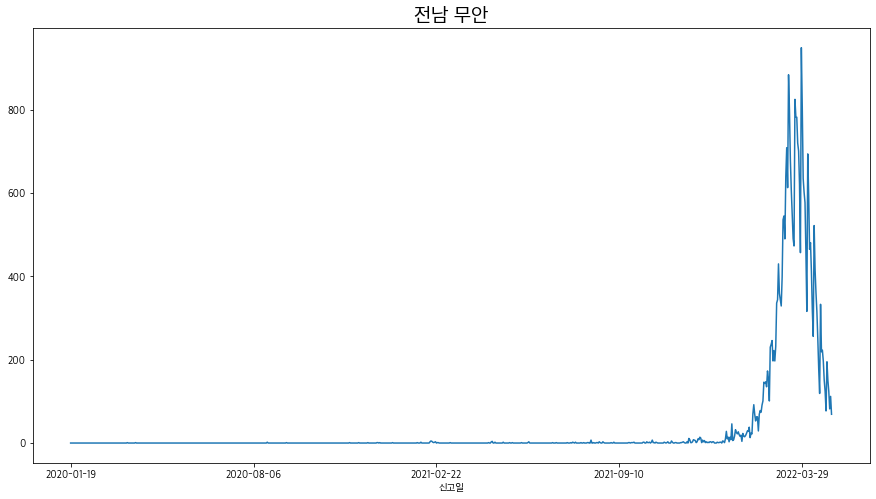

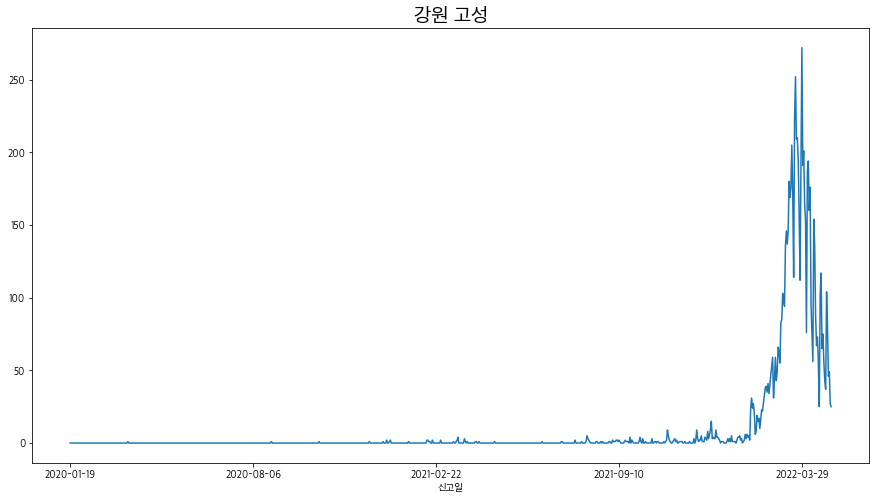

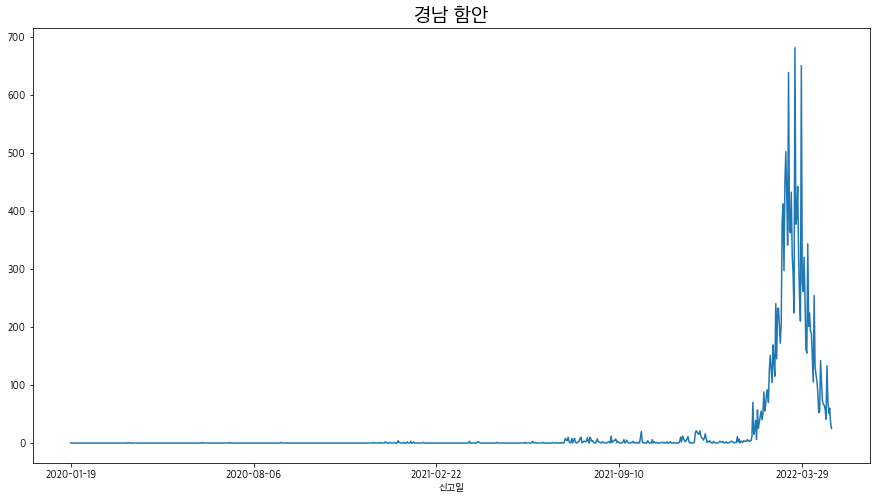

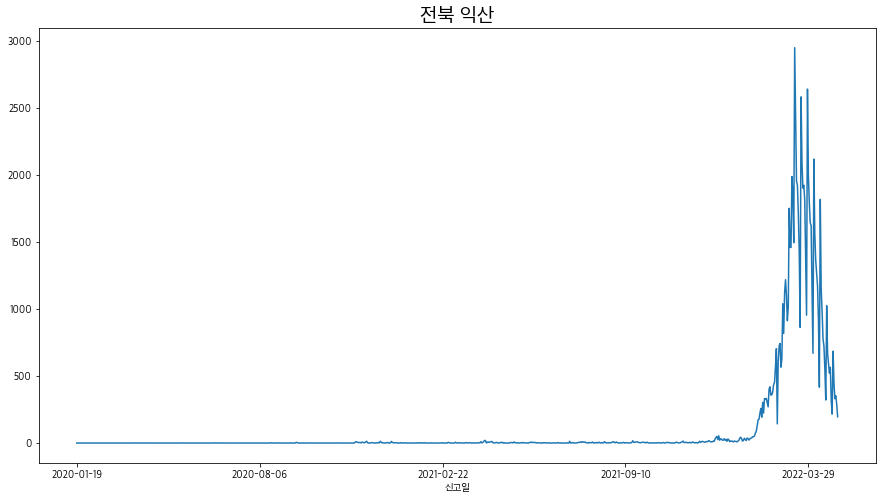

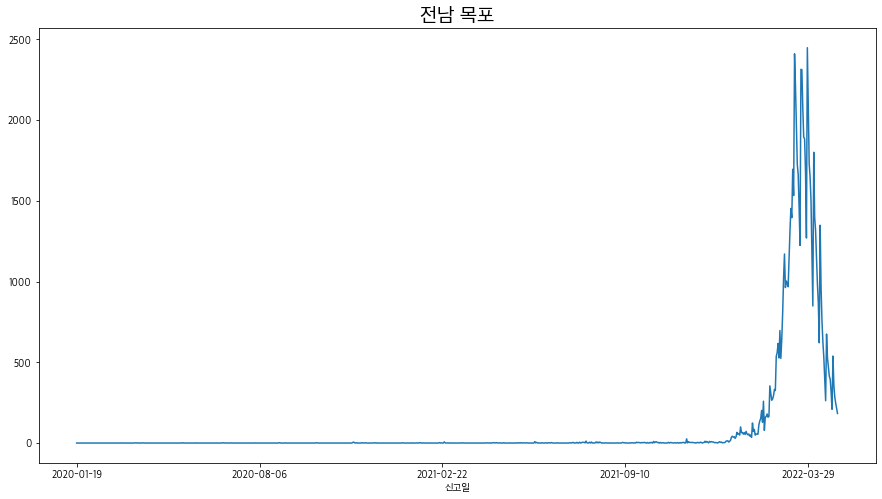

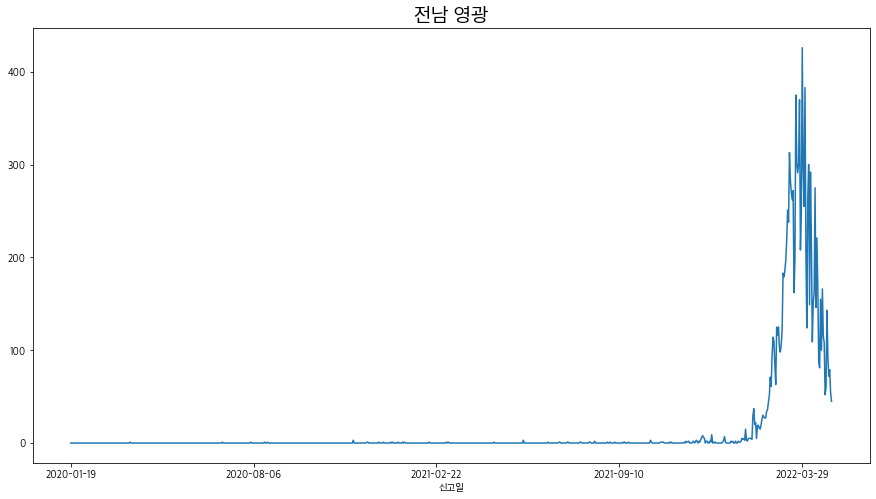

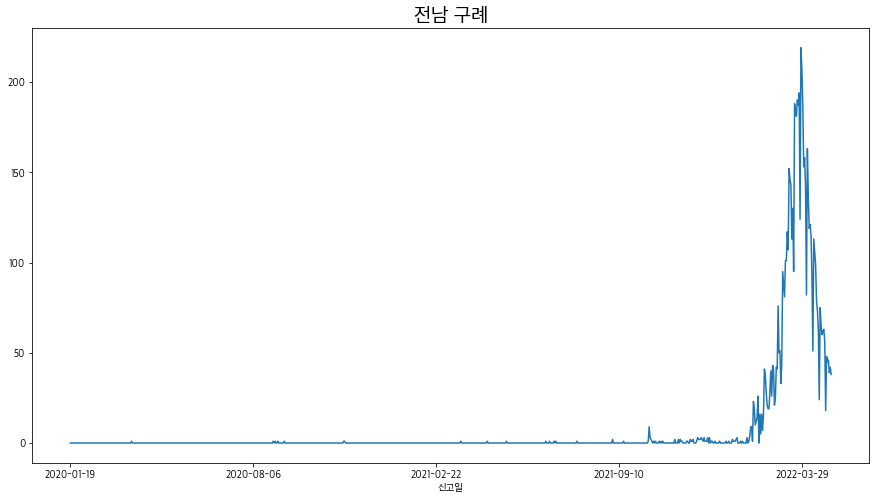

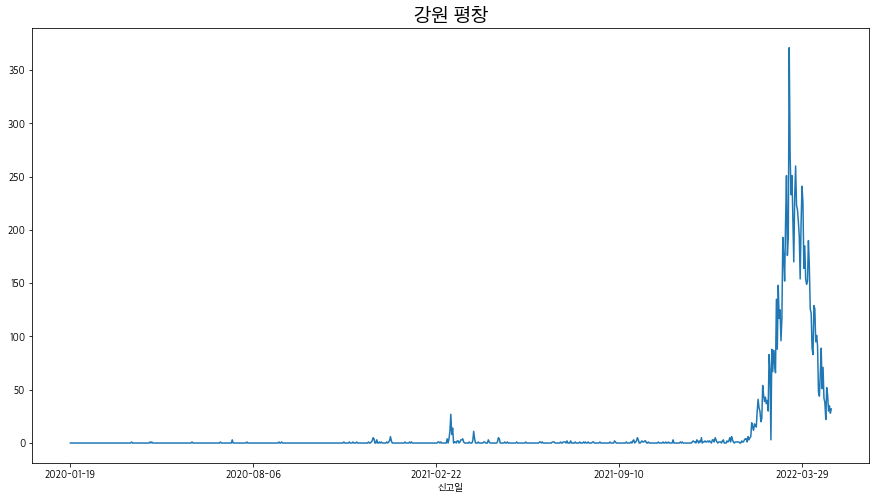

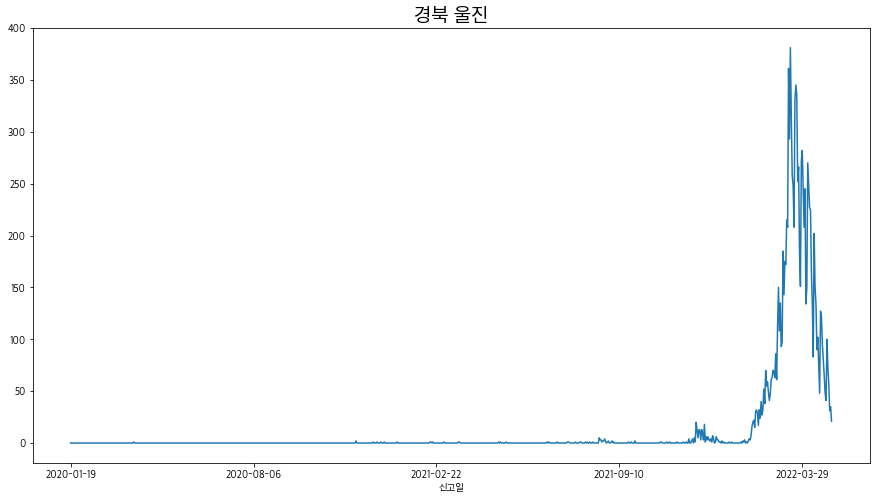

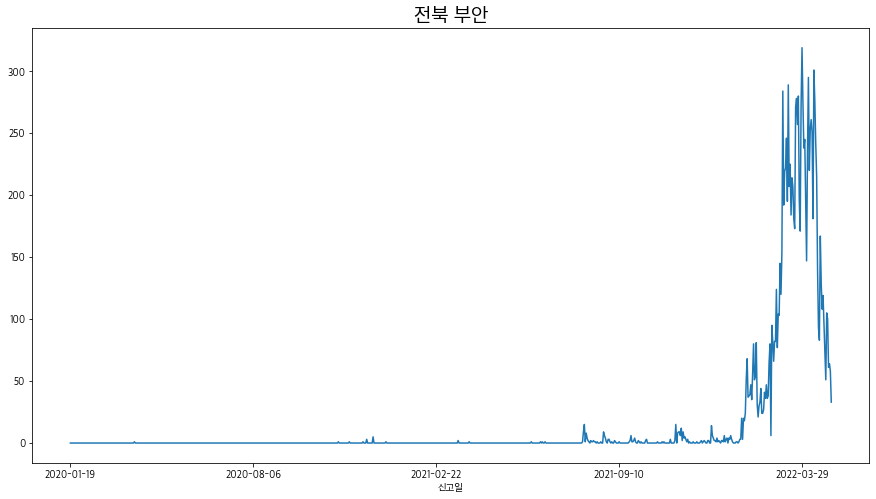

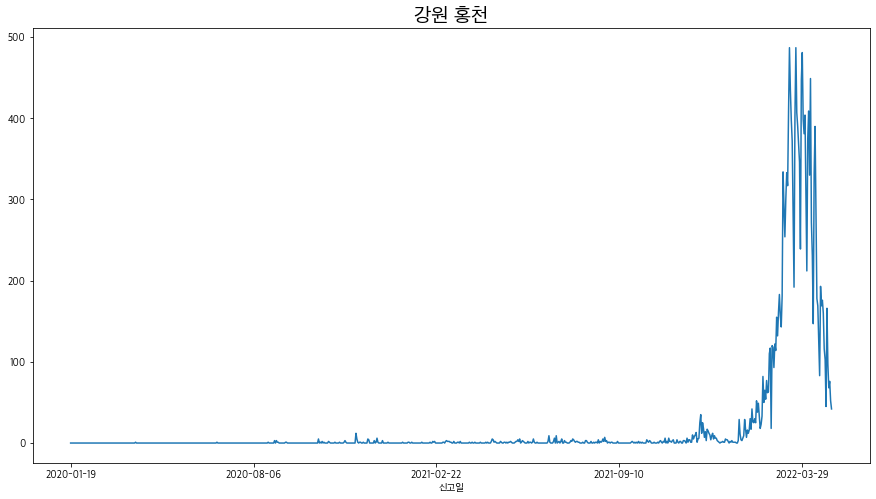

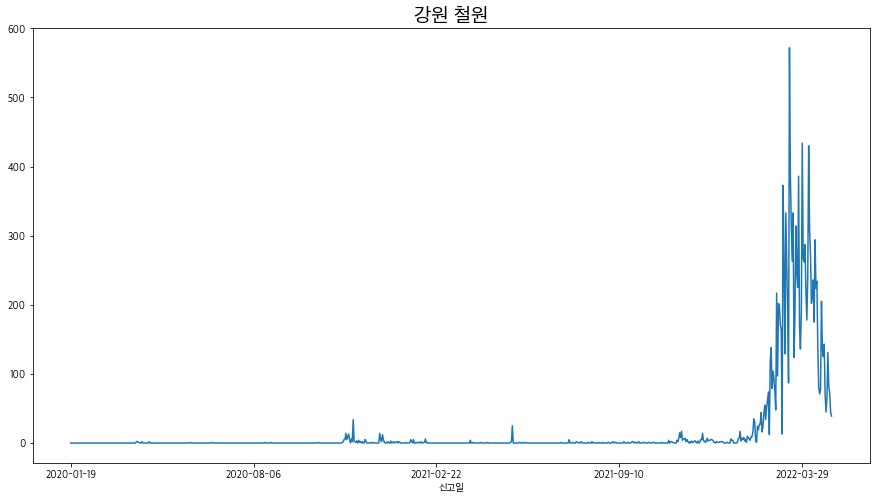

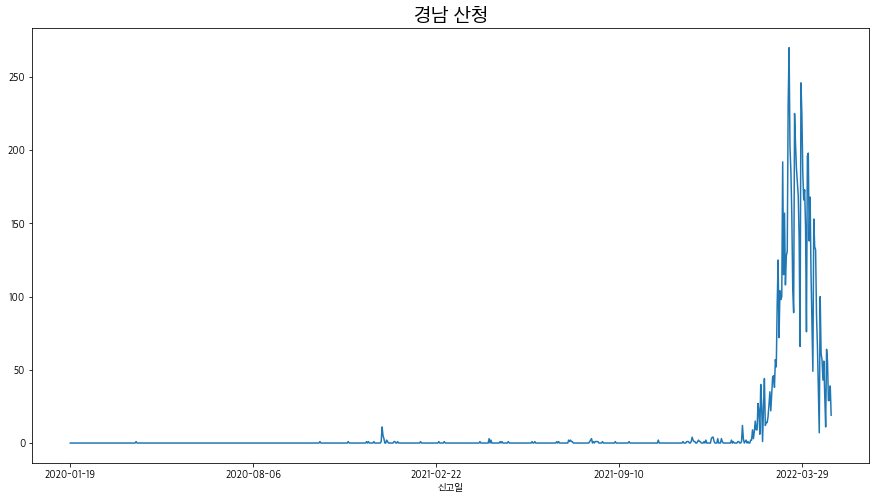

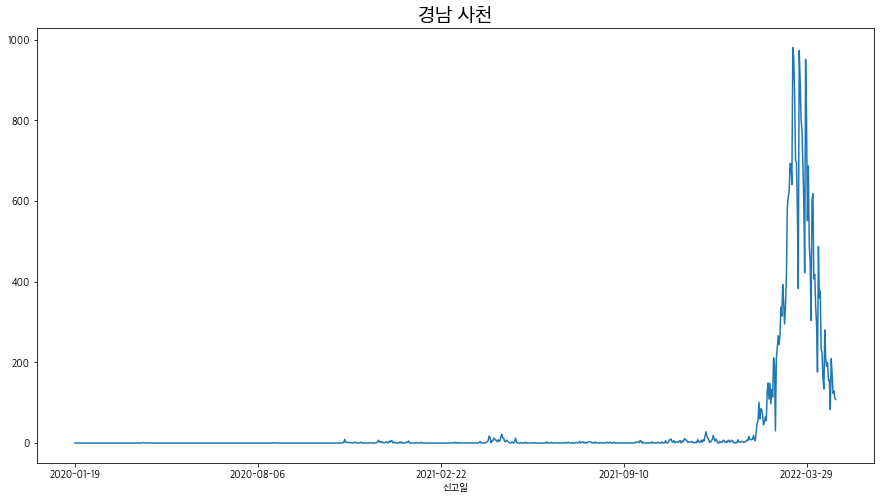

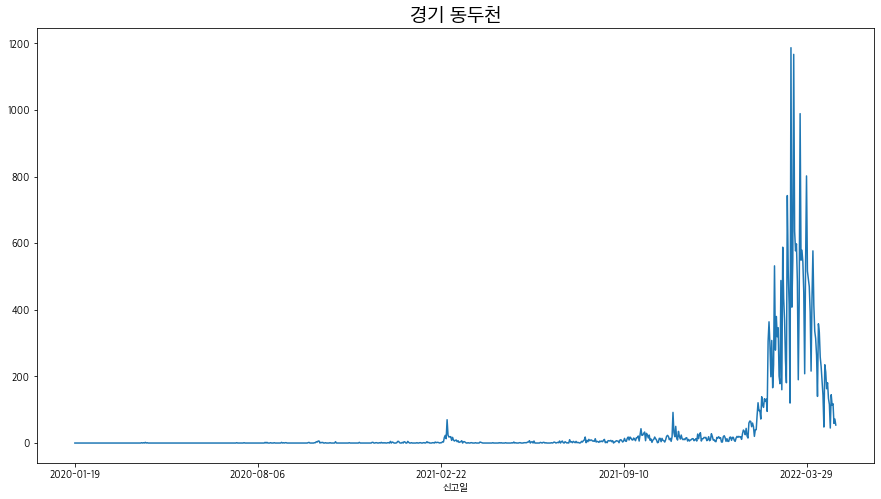

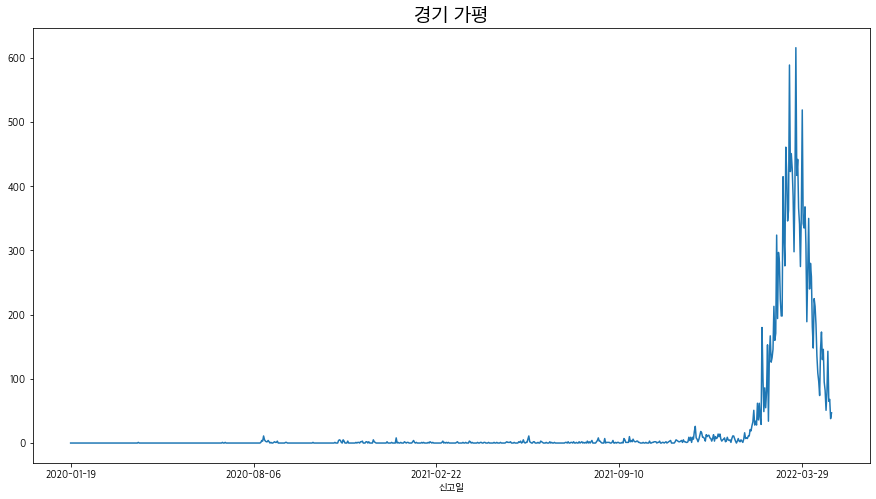

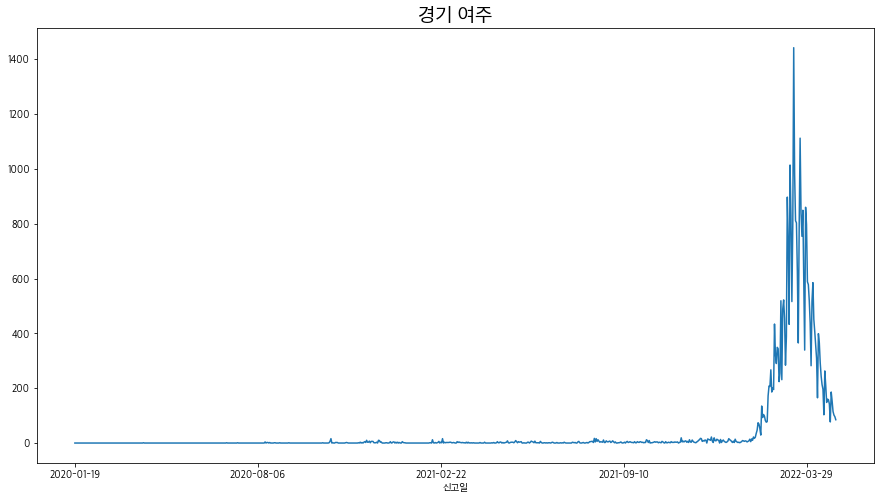

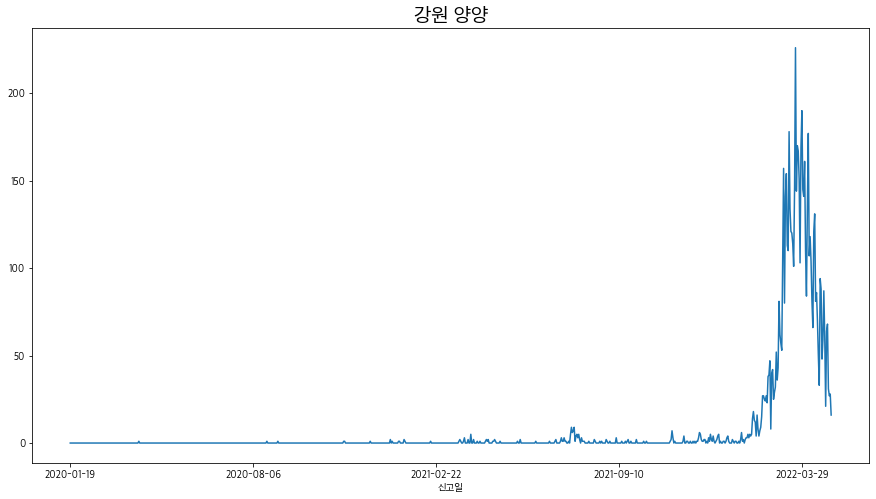

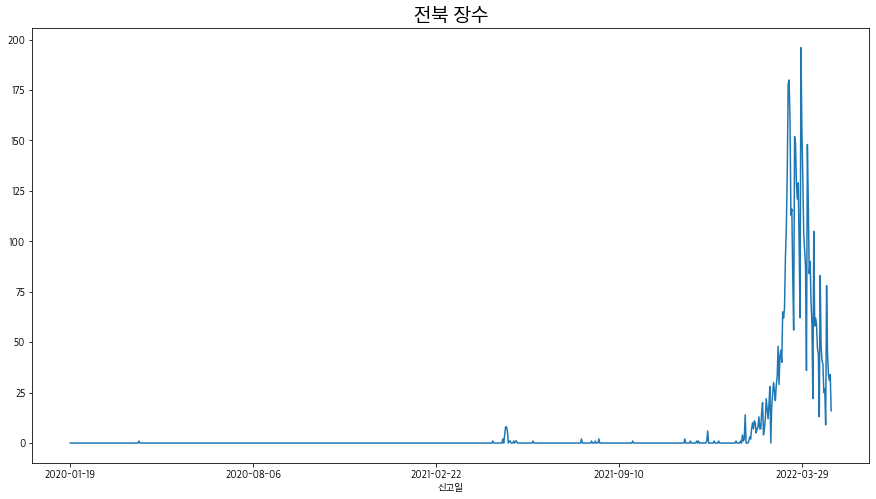

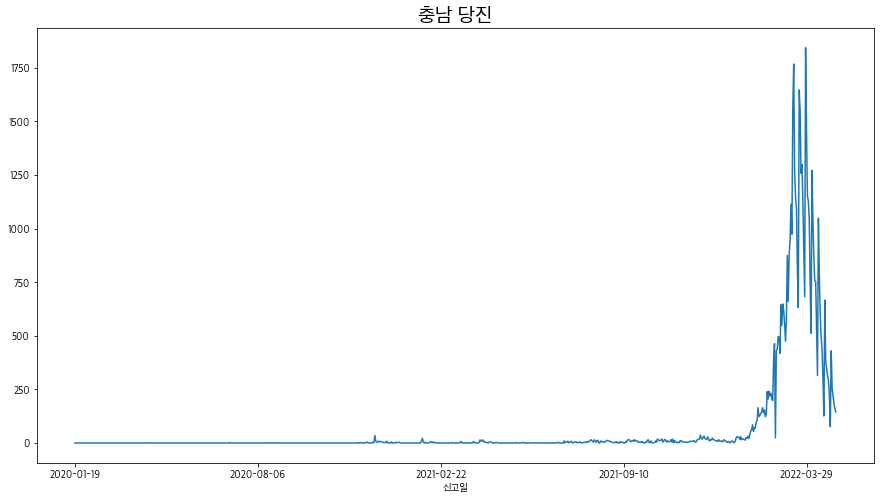

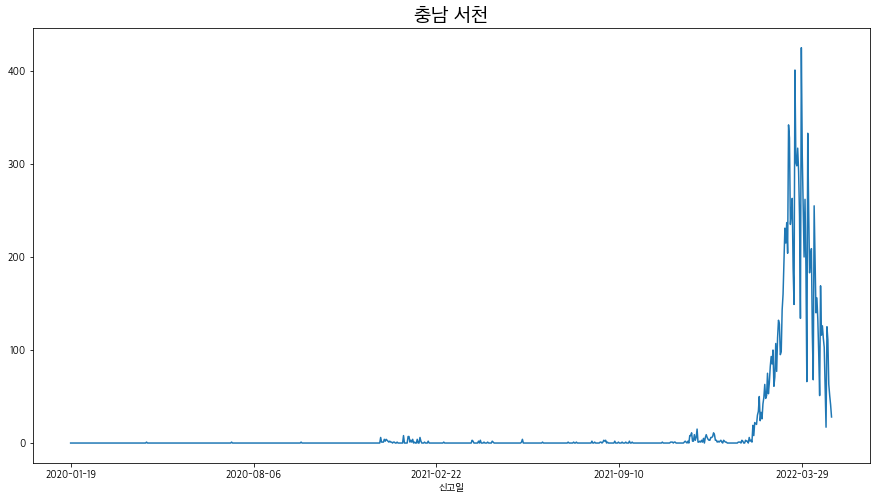

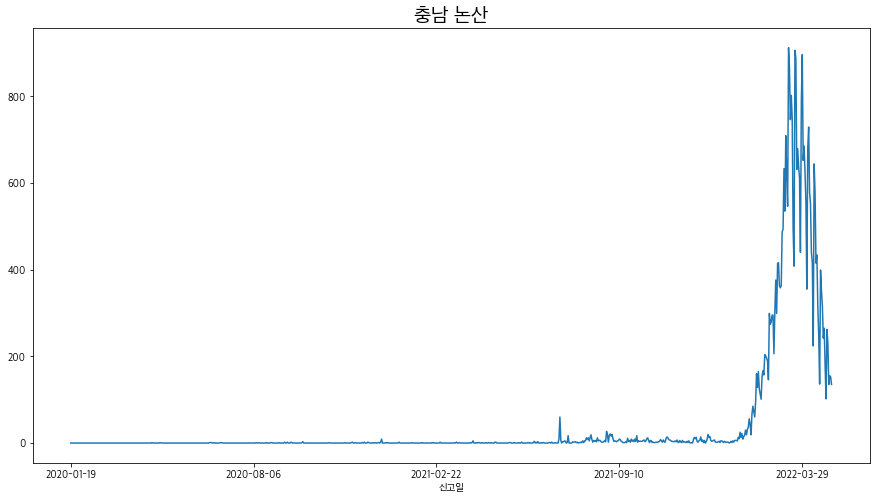

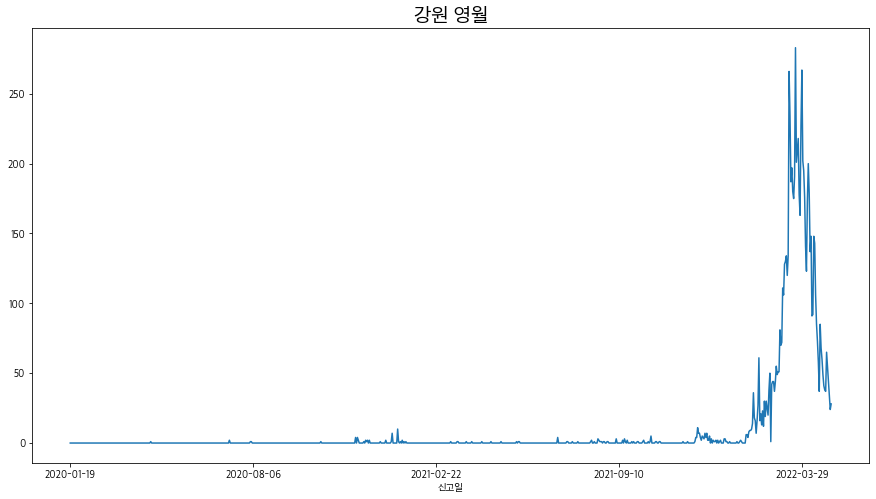

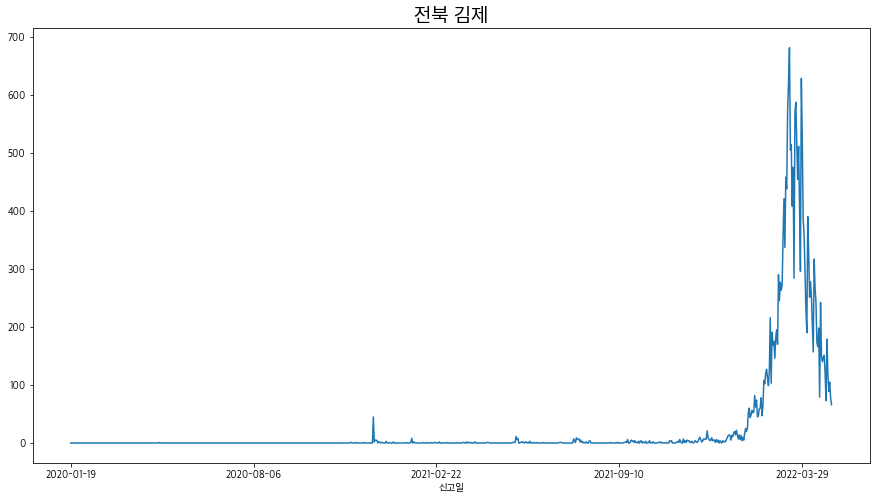

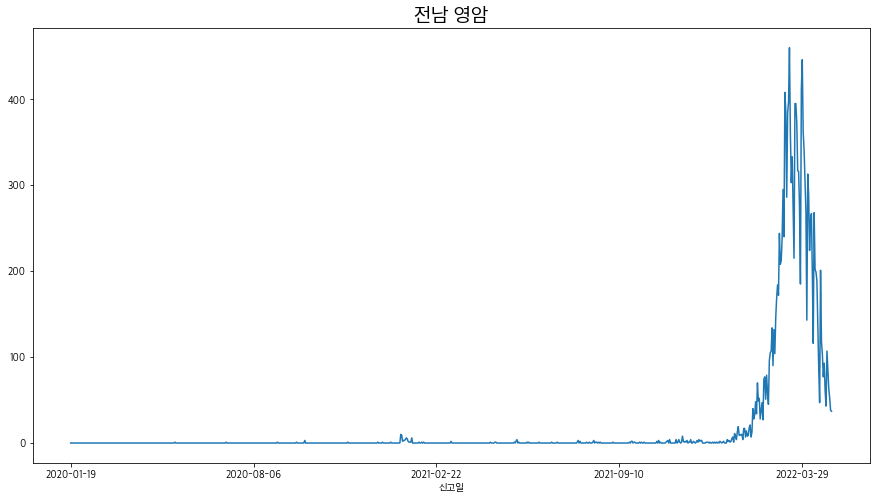

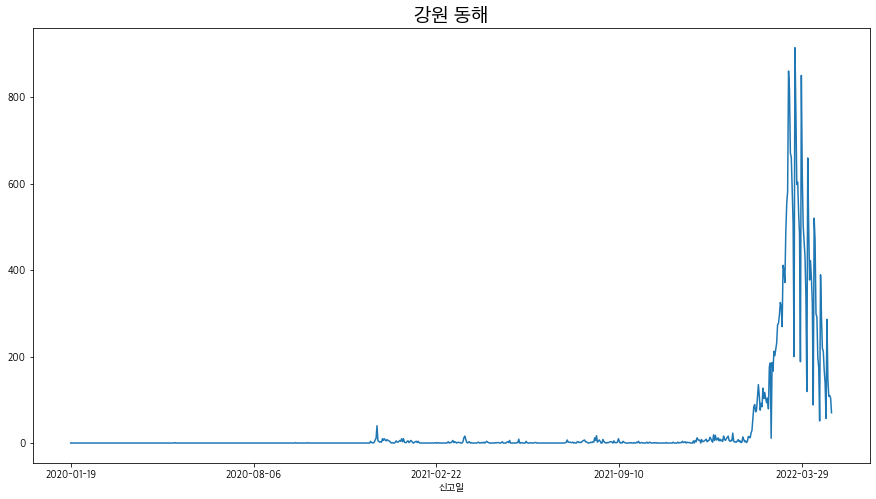

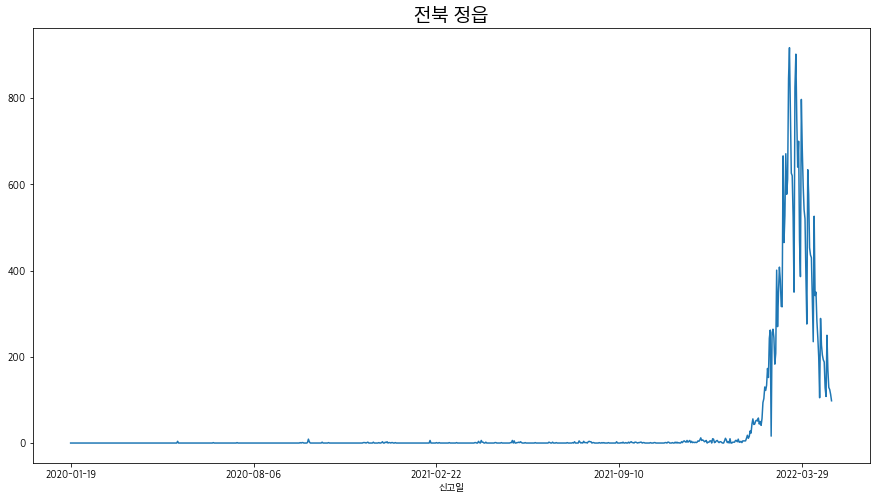

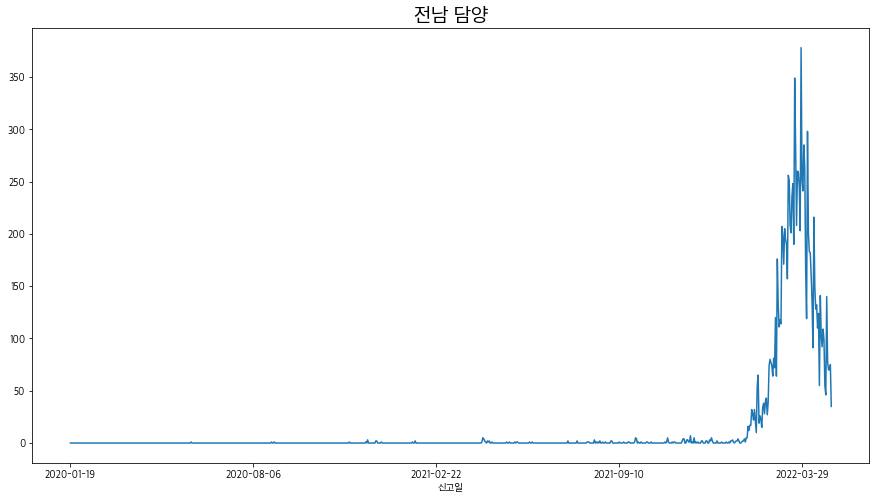

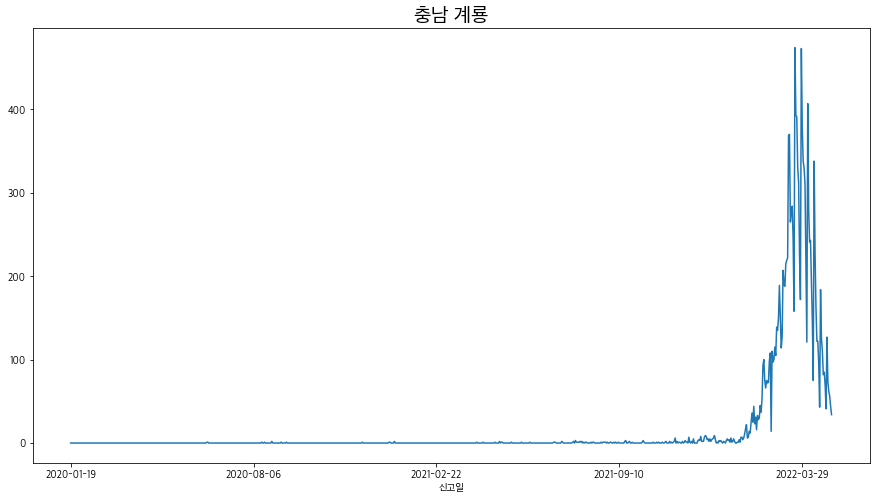

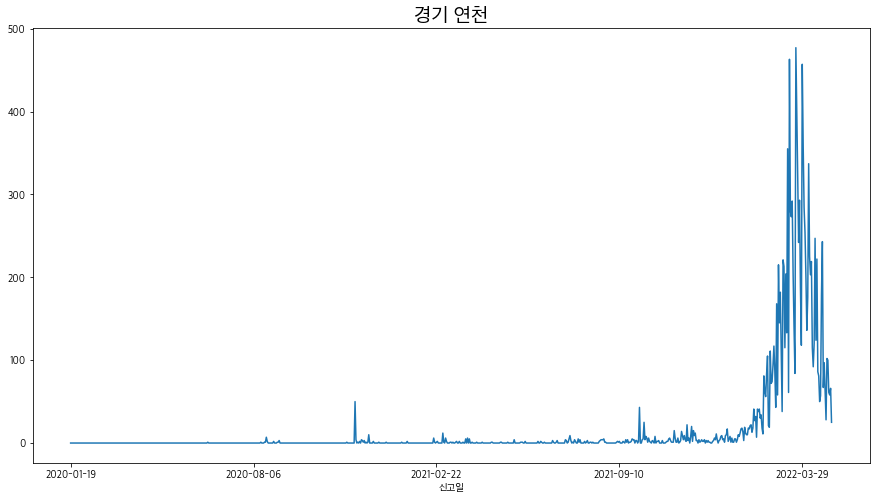

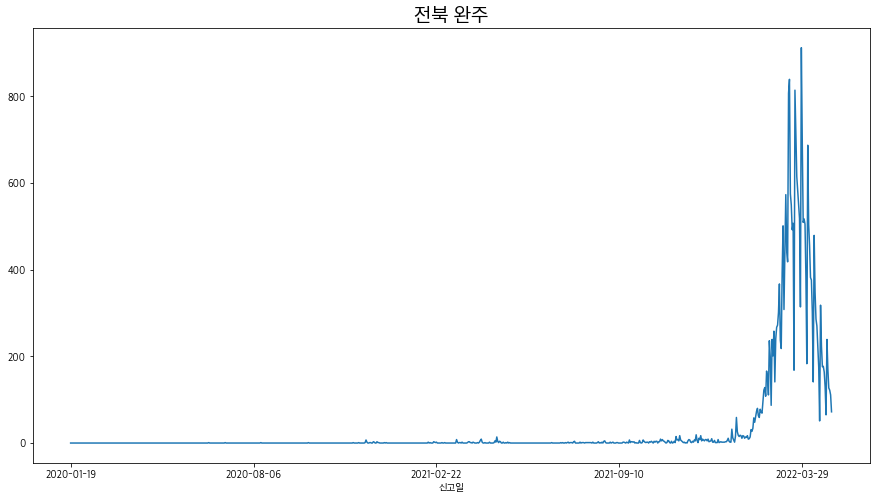

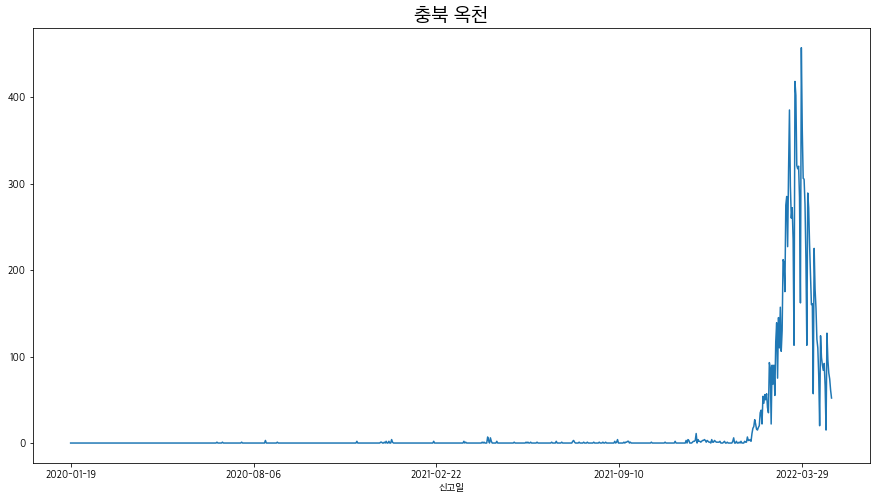

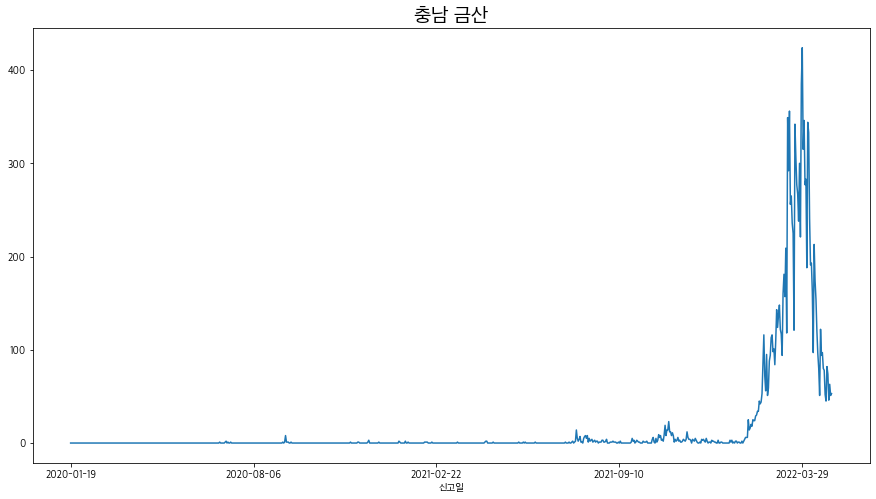

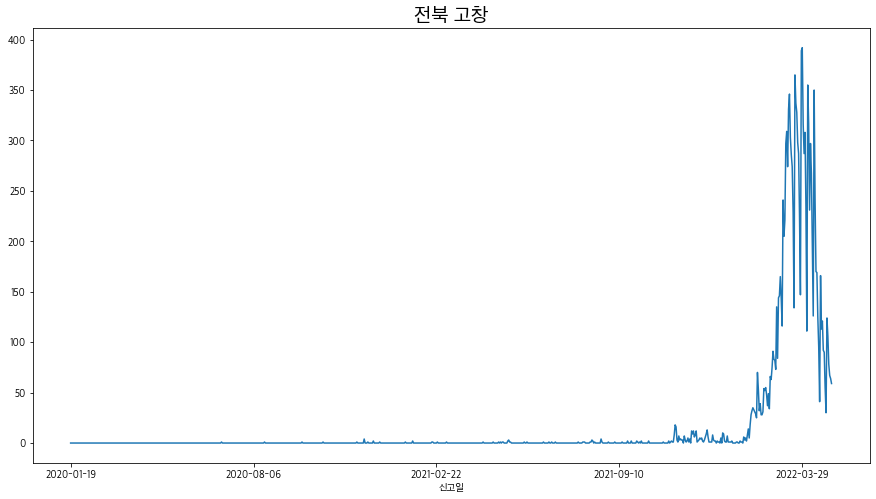

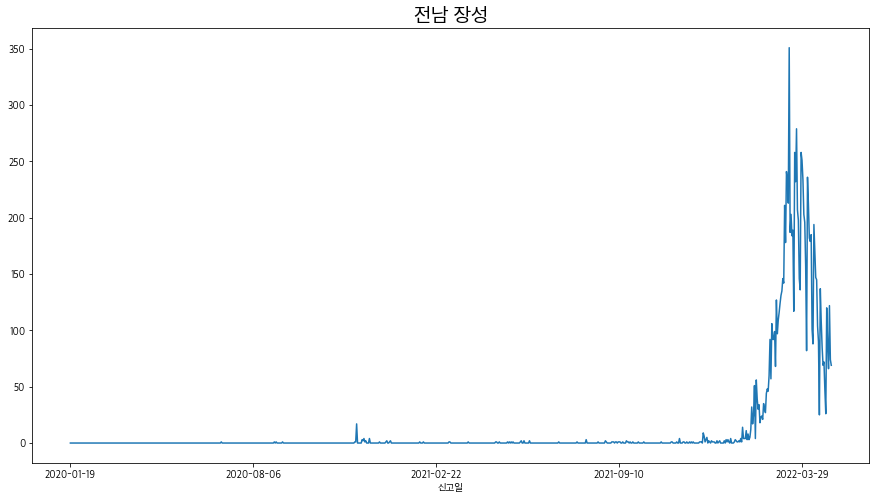

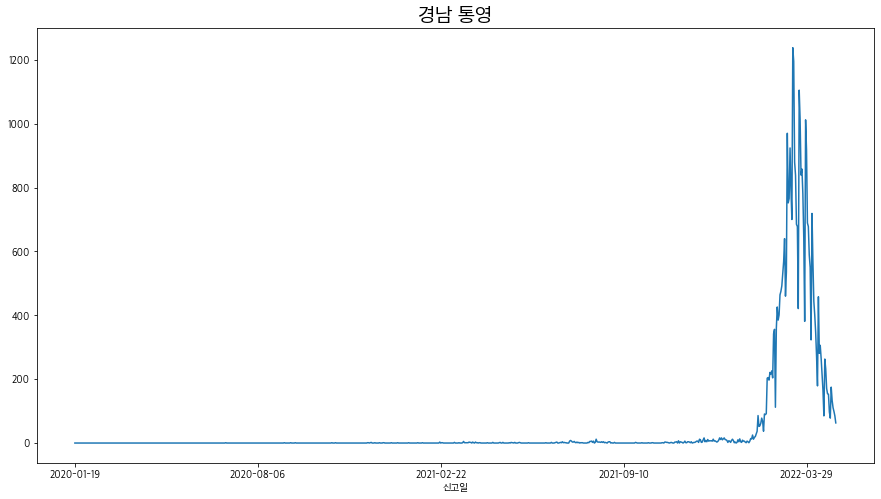

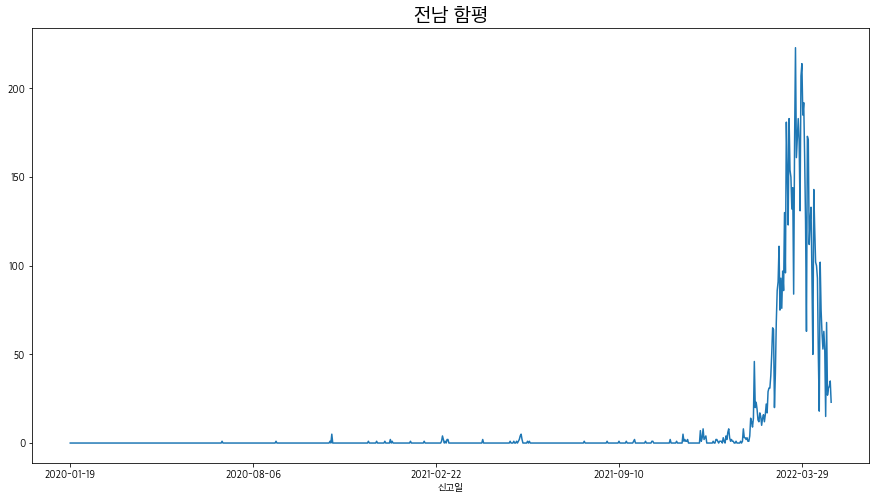

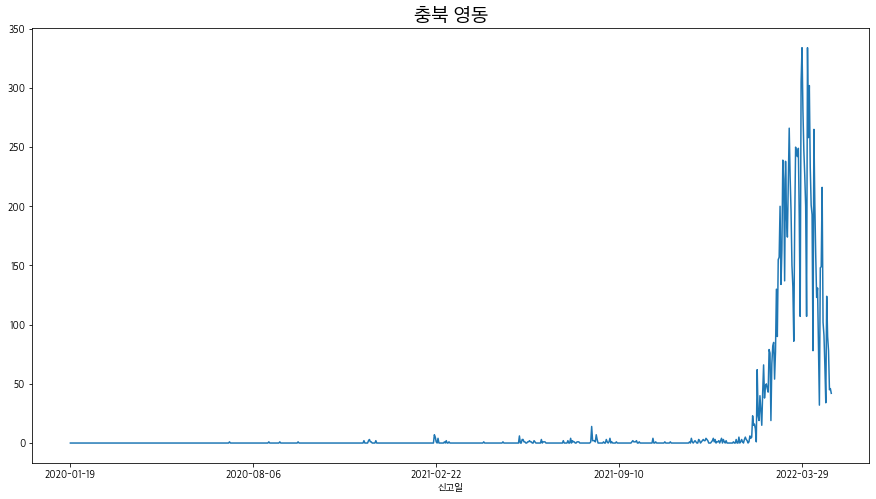

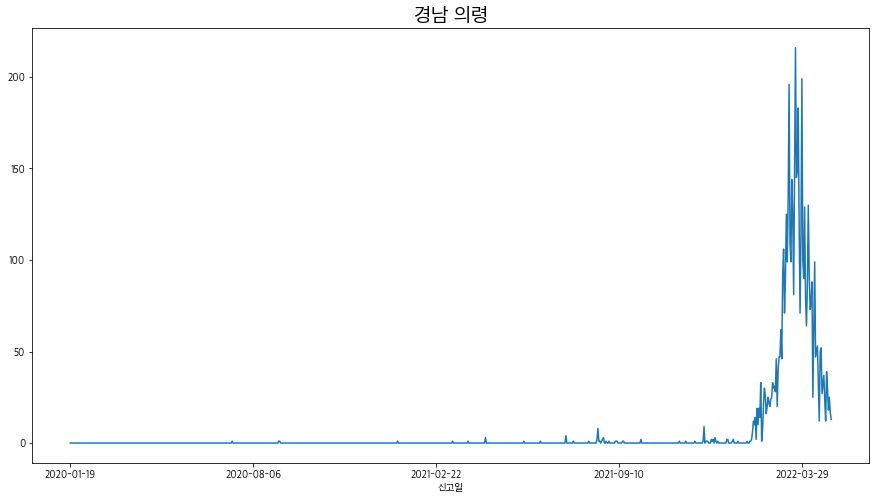

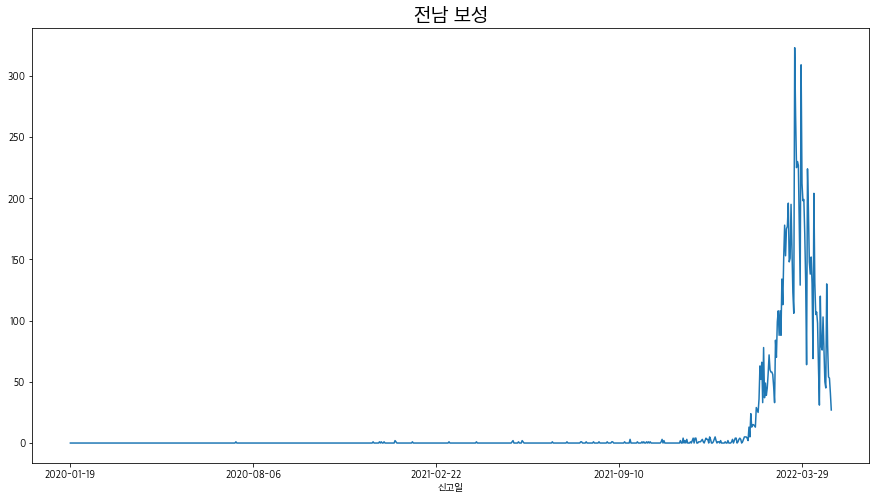

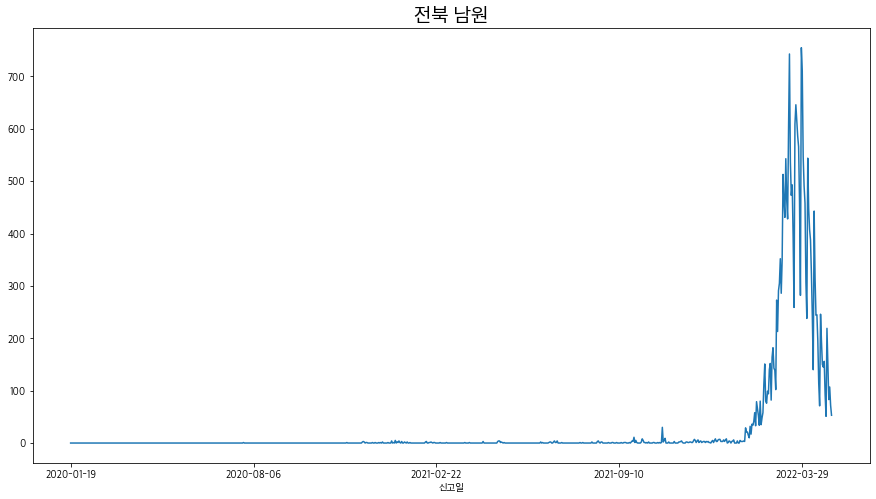

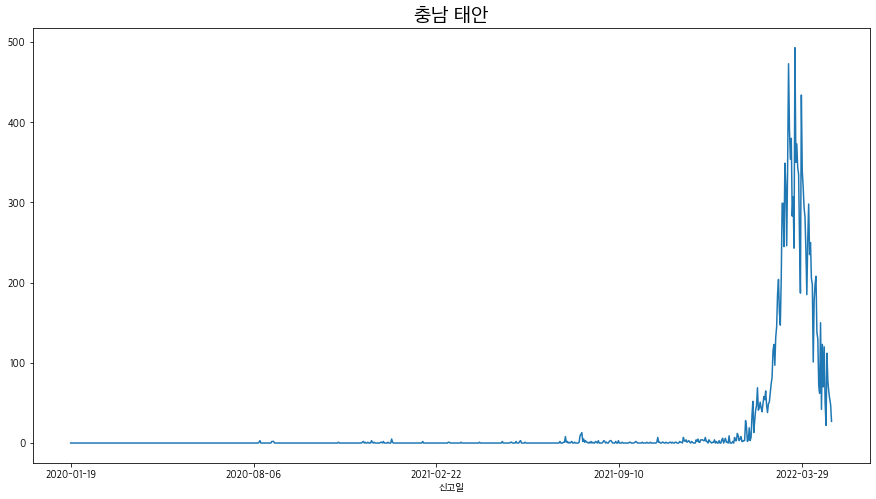

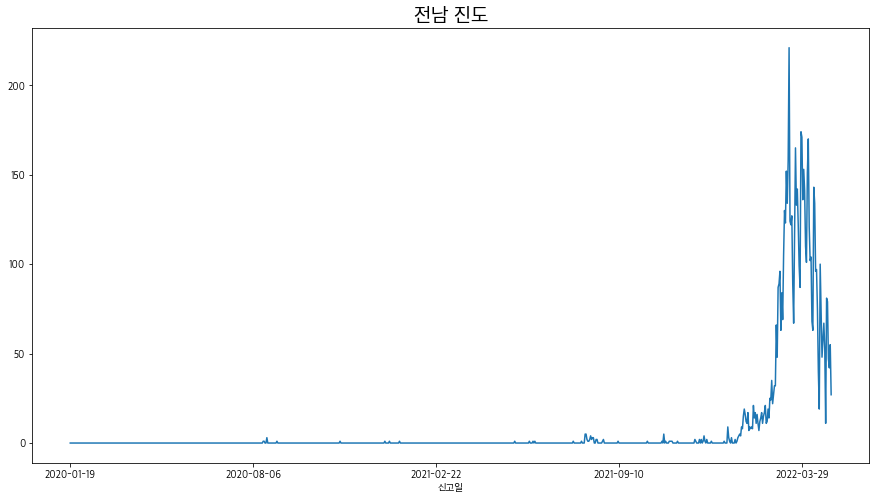

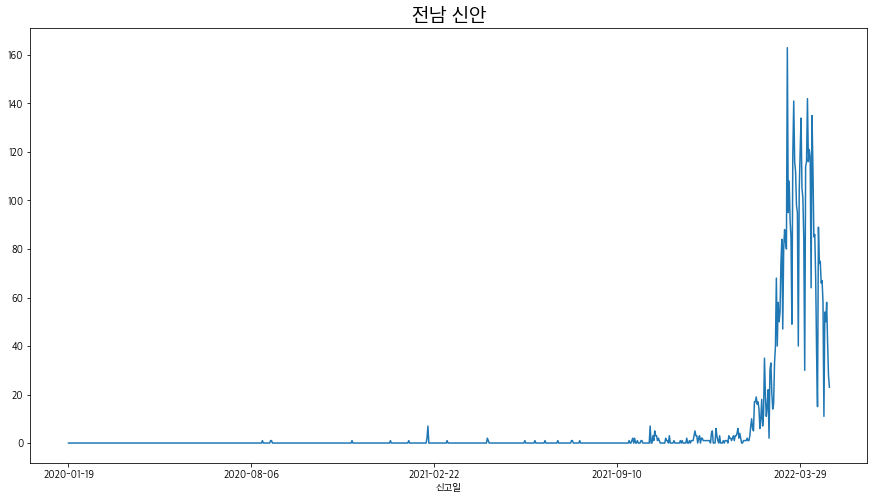

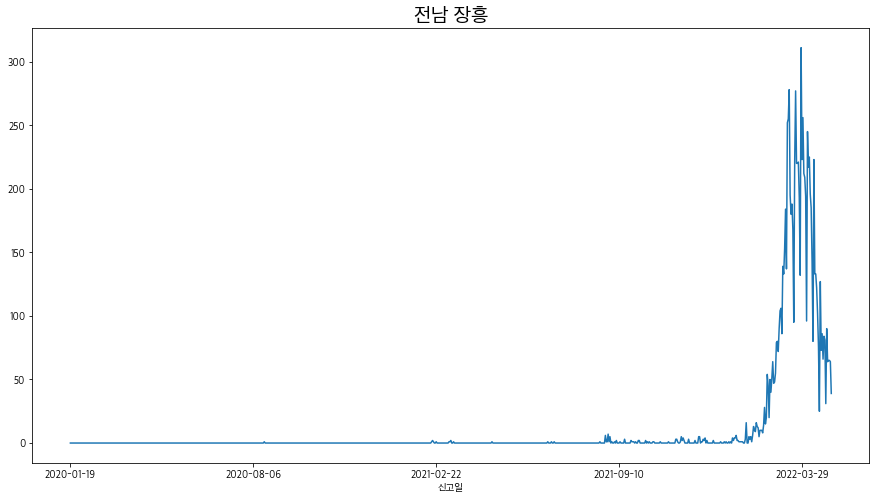

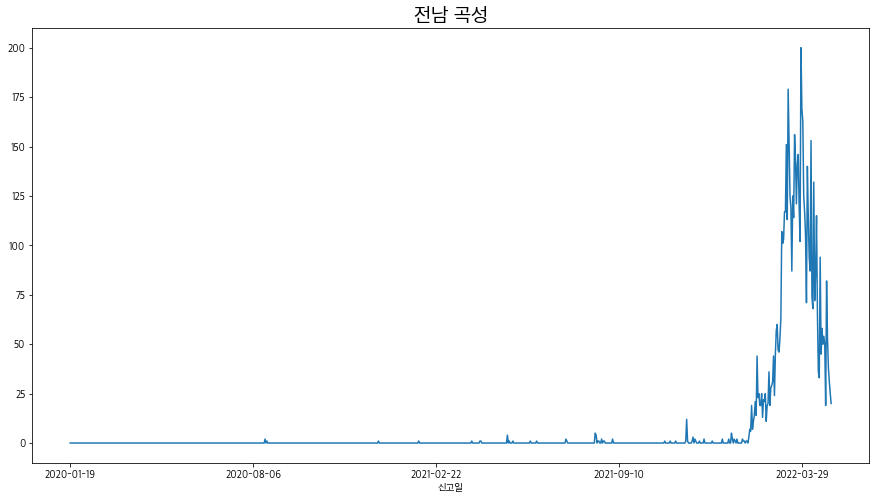

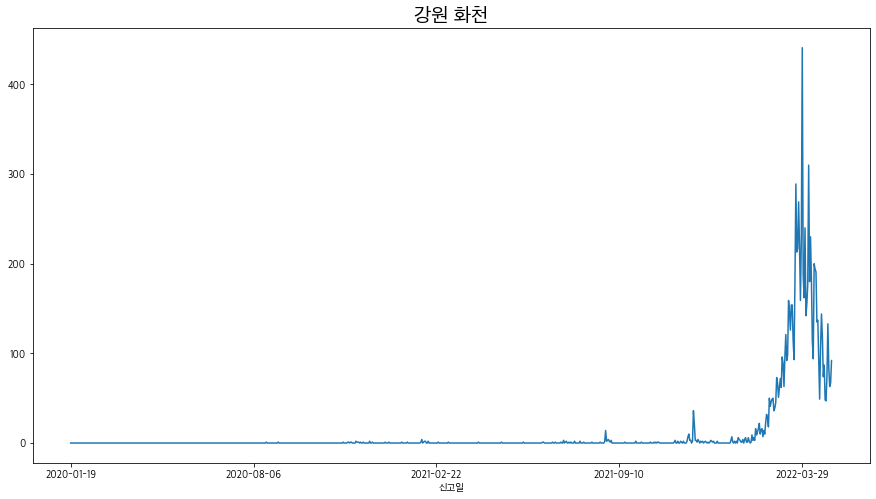

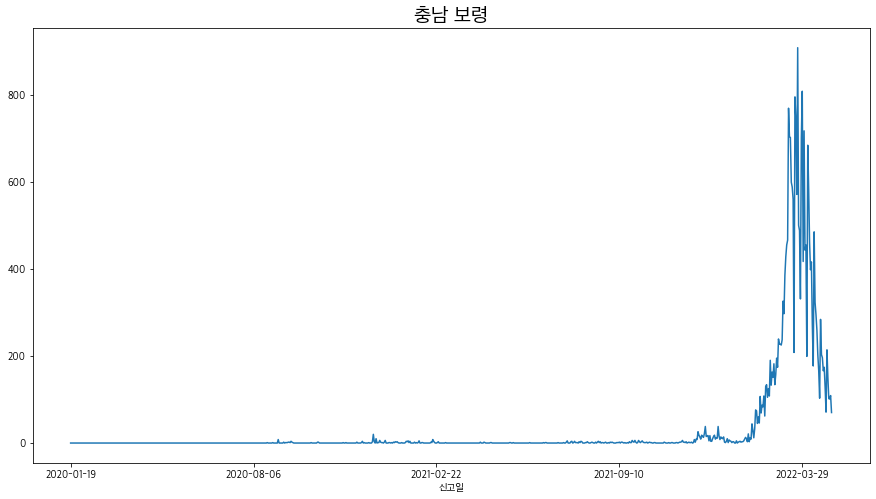

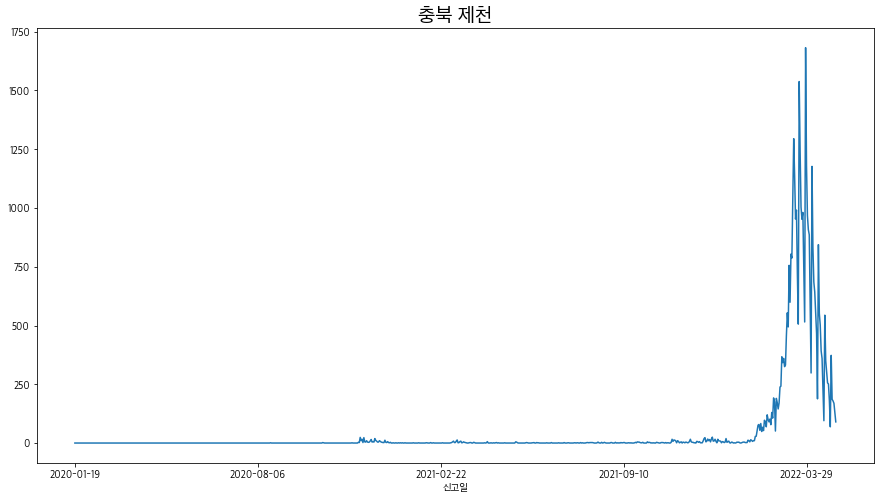

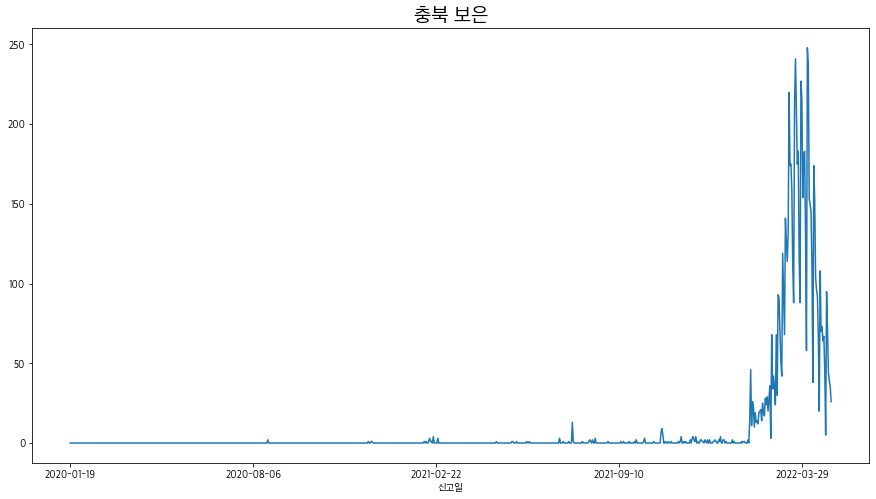

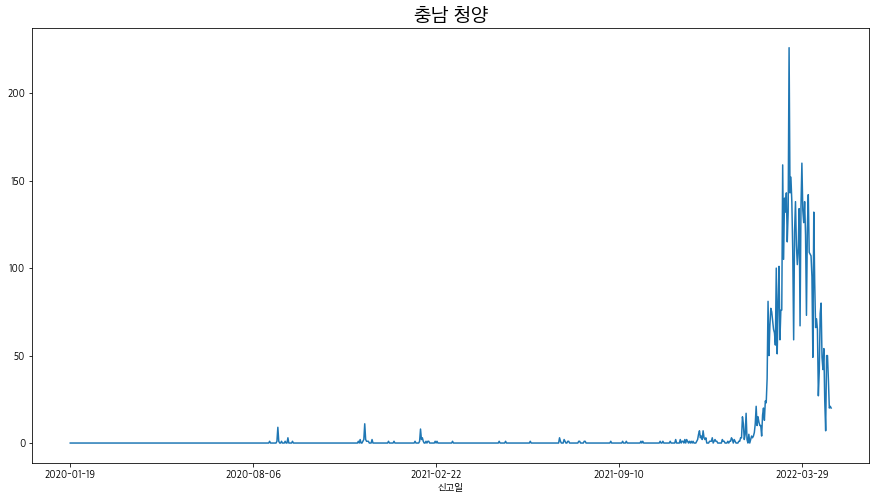

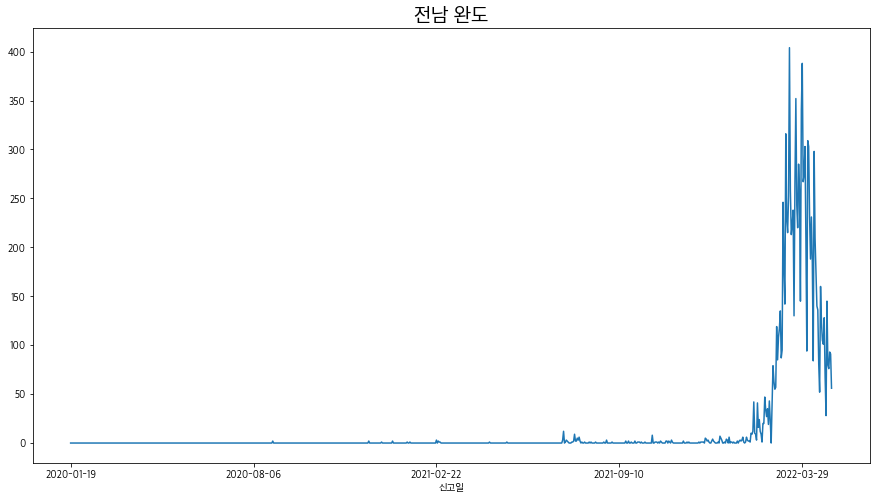

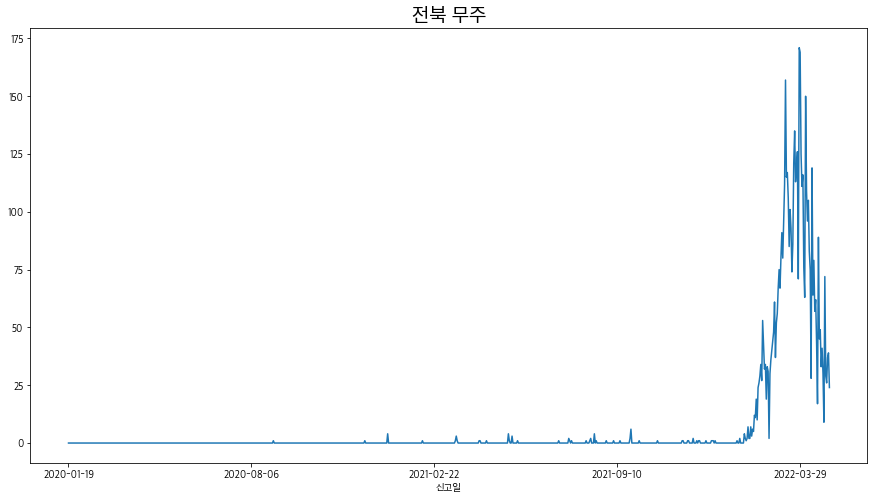

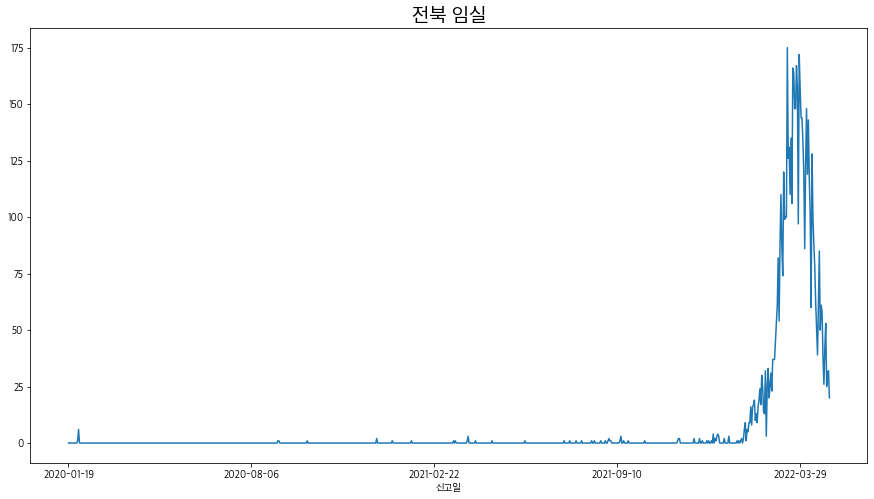

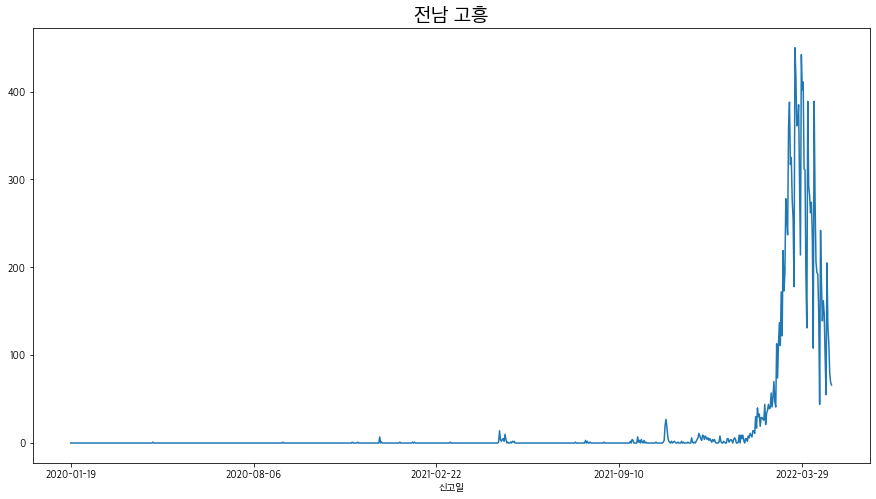

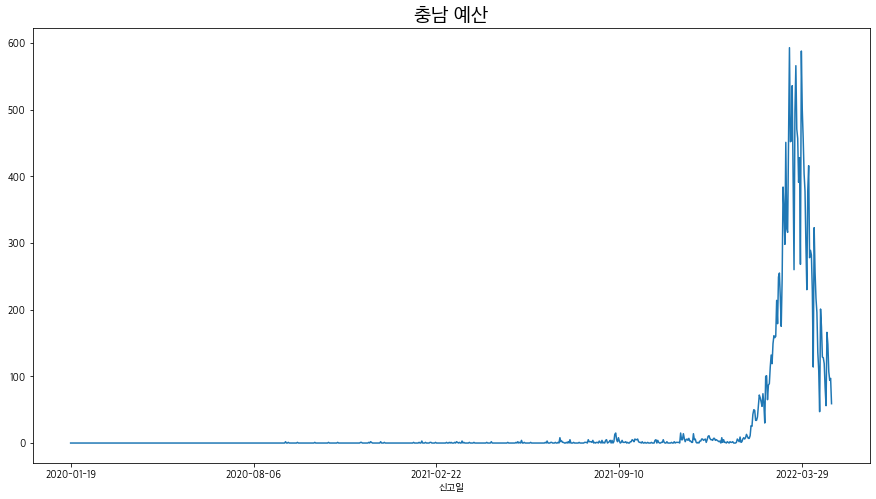

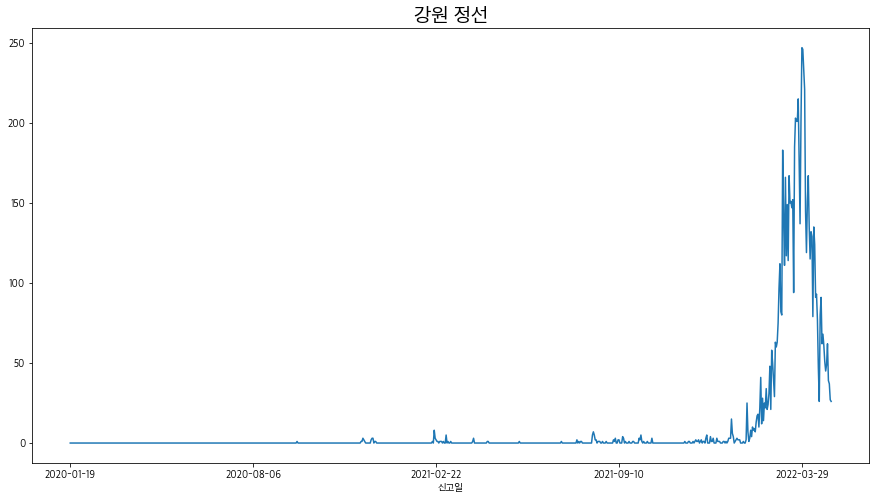

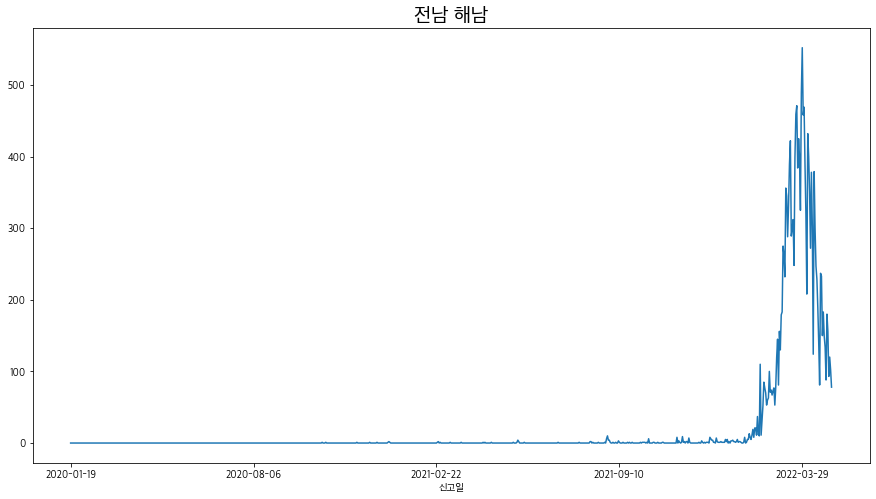

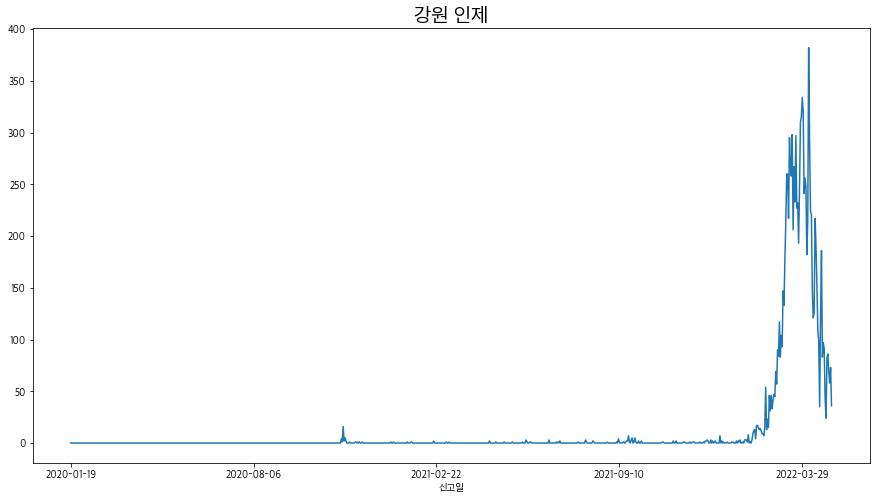

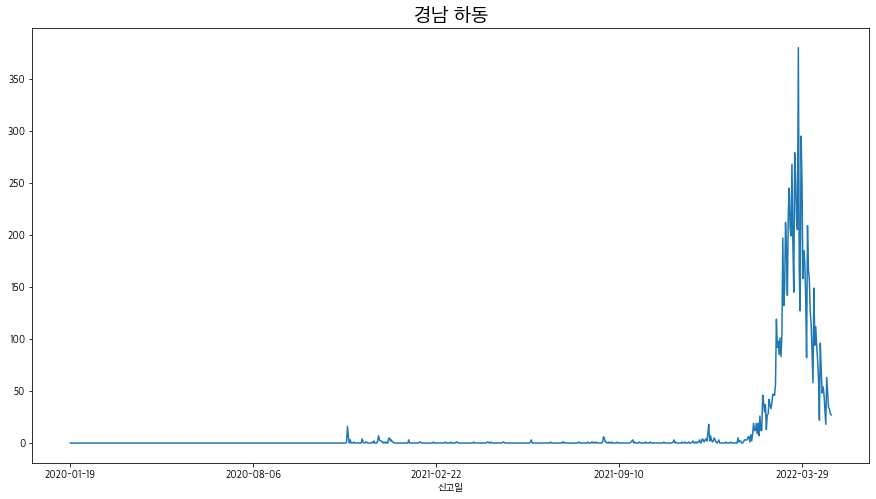

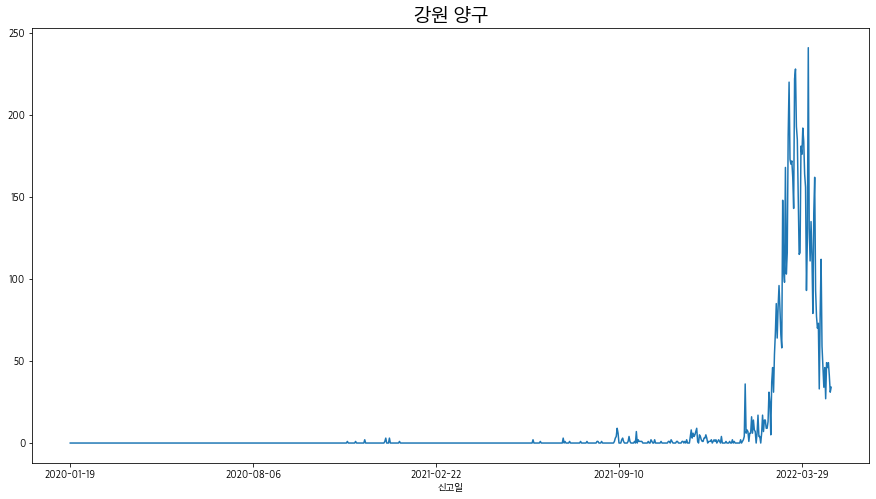

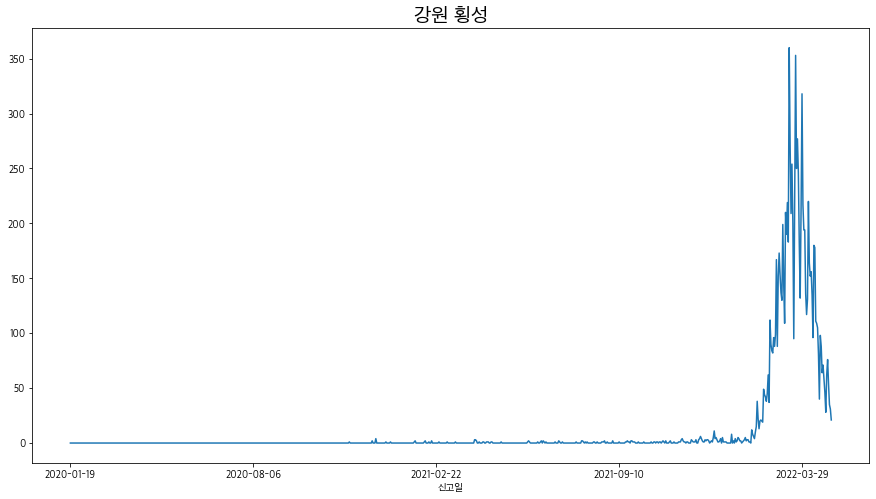

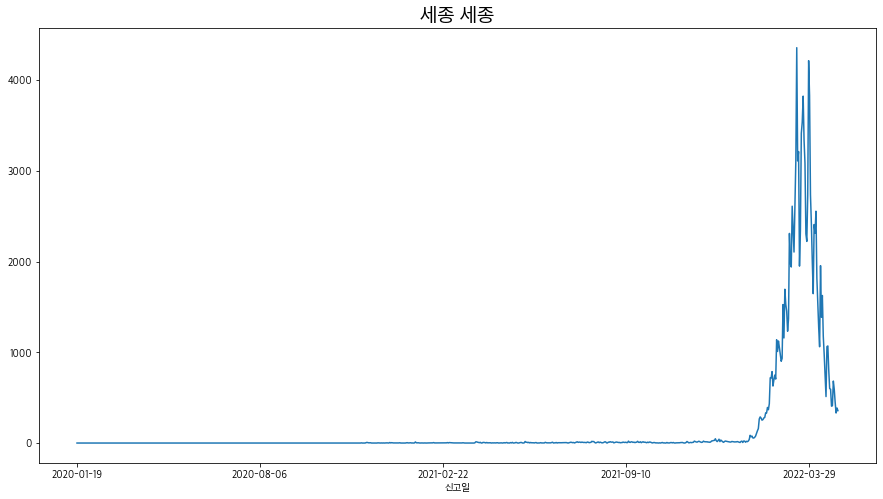

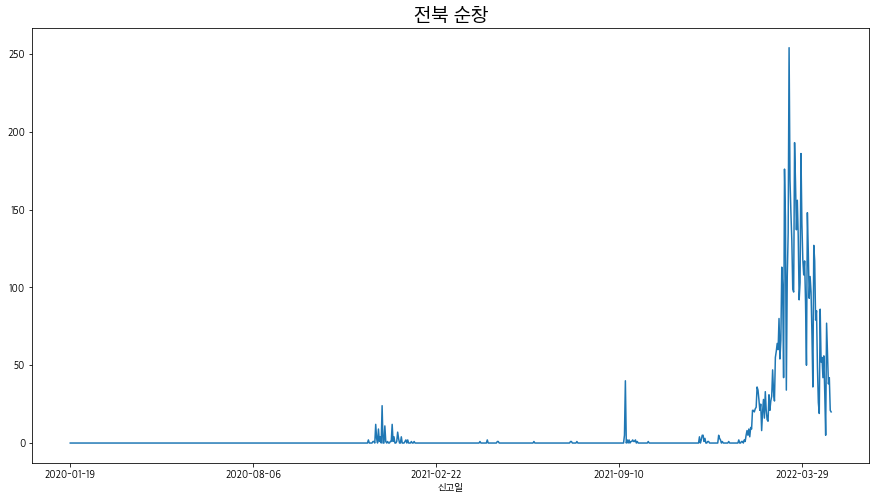

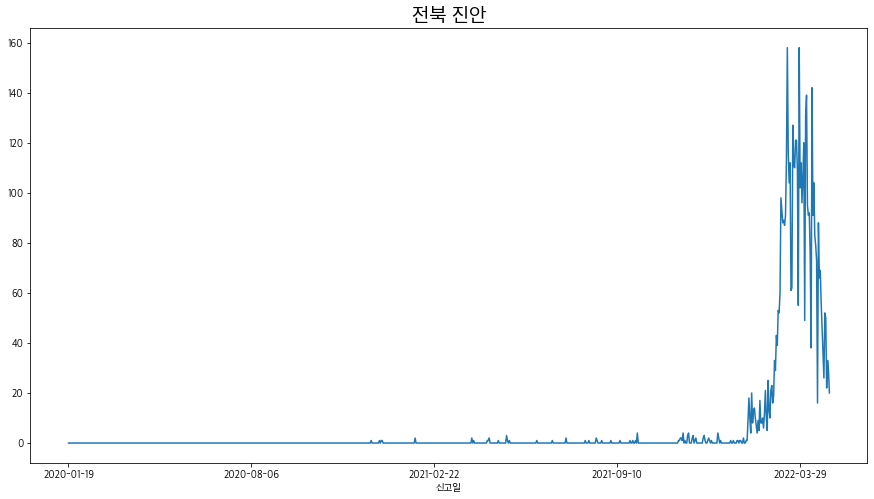

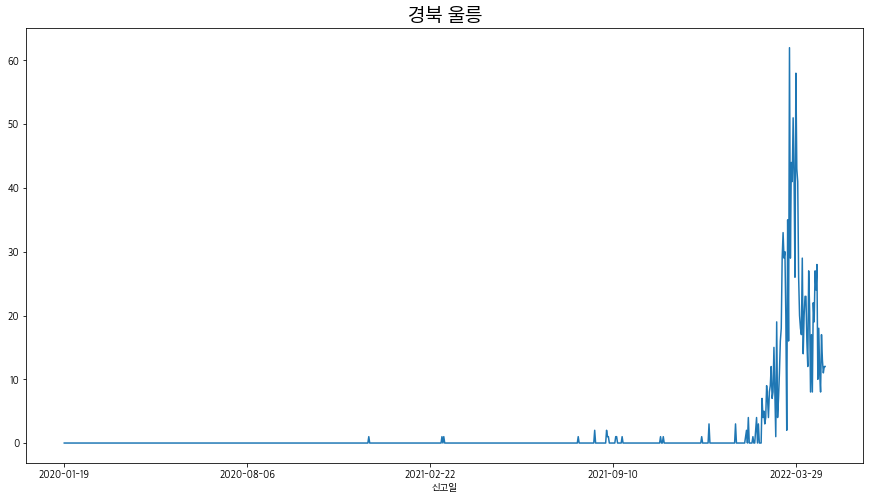

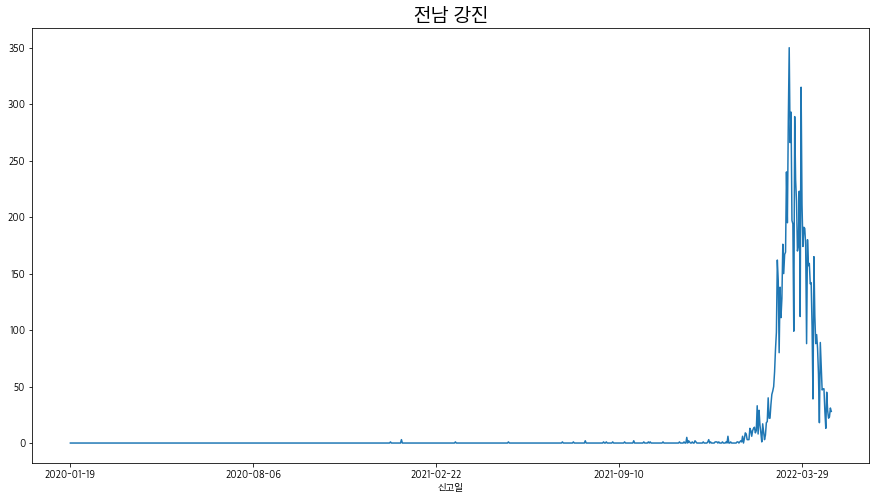

In [21]:

for region in city_df.columns:
    fig, ax = plt.subplots(figsize=(15,8))
    ax = city_df[region].plot()
    plt.title(str(region), fontsize=20)
    plt.show()

In [9]:
a

NameError: name 'a' is not defined